# Loan Default Prediction

**Project Overview**

Build a predictive model that assigns default probabilities to loan applications.
Minimize nancial risk by accurately predicting the likelihood of loan defaults, enabling
more informed and strategic lending decisions.

# Notebook Structure
---
<details>
<summary><b>1. Business Problem and Objectives</b></summary>
   Define the problem being addressed and its relevance to real-world scenarios.
</details>

---

<details>
<summary><b>2. Data Acquisition and Preparation</b></summary>

- ### **2.1 Data Source and Download**  
  Explanation of the dataset source and how it was obtained.  

- ### **2.2 Installing Required Modules**  
  List and install the libraries needed for the project.  

- ### **2.3 Importing Modules and Global Variables**  
  Set up imports and define constants or global variables.  

- ### **2.4 Defining Supplemental Functions**  
  Helper functions to streamline data processing.  

- ### **2.5 Data Loading**  
  Load the dataset into a DataFrame or suitable data structure.  

- ### **2.6 Basic Data Understanding**  
  Perform initial data exploration, including shape, columns, and types.  

</details>

---

<details>
<summary><b>3. Data Preprocessing and Feature Engineering</b></summary>

- ### **3.1 Cleaning**  

- ### **3.2 Preprocessing**  

- ### **3.3 Feature Extraction**  

</details>

---

<details>
<summary><b>4. Predictive Analysis</b></summary>

- ### **4.1 Train-Test Data Split**  
- ### **4.2 Classification with Simple Model**   
  Choose a simple base classification model and train it on the preprocessed data. Assess model performance using metrics like accuracy, precision, and recall.
- ### **4.3 Selecting Best Model for Feature Reduction**
  Deploy several advanced classification models with feature interpretability.
- ### **4.4 Feature Reduction Using Best Advanced Model**
  Reducing dataset to most important features from best performing model.        
- ### **4.5 Tuning Hyperparameters for Logistic Regression Model**
  Use parameter grid search to find the best-performing model.  
- ### **4.6 Improved Model Performance**
  Assess model performance using metrics like accuracy, precision, and recall.
- ### **4.7 Feature Interpretation**
  Visualize results and discuss findings, including strengths and limitations.
</details>

---

<details>
<summary><b>5. Conclusion</b></summary>
Summarize work.
Summarize findings, including strengths and limitations.
Suggest future work.
</details>


## 1.1 Business Problem and Objectives

**Problem Statement:**
**Key Questions:**
**Project Objectives:**


# 2. Data Acquisition and Preparation

## 2.1. Data Understanding

This section outlines the source of the data used in this project,  and provides instructions for downloading it.

**Data Sources**
**Data Relevance**
**Data Limitations**
**Download Instructions**
**Data Storage**
**Data Loading**

## 2.2 Installing Required Modules

This section focuses on installing the necessary Python libraries and packages required

1. **Requirements File**
    - We retrieve the list of required packages from a `requirements.txt` file hosted on GitHub using `wget`. This file contains the names and versions of all the dependencies.
    - This ensures that we install the correct versions of the libraries for compatibility and reproducibility.
2. **Installation using pip**
    - We use Python's `pip` package manager to install the libraries listed in the `requirements.txt` file.
    - The `-r` flag instructs `pip` to read the requirements file and install all the packages listed within.

Obtaining Data from the [Loan Default Prediction Competition](https://www.kaggle.com/competitions/home-credit-default-risk/overview) on **Kaggle:**

Before accessing the loan default prediction data, you must first join the competition and agree to its specific Terms & Conditions. Follow the step:

1. Create/Log In to Your Kaggle Account.
2. Navigate to the Competition Page. This page will have all the relevant details about the competition, including the rules and guidelines.
3. Click the “Join Competition” button. This action will prompt you to review and agree to the competition's Terms & Conditions. You must accept these terms before you can access the data.
4. Downloading the Dataset.
  
  a) **Manual Download**. After joining and agreeing to the terms, use the download button provided on the competition page to download the dataset directly to your computer.

  b) **Using the Kaggle API**. If you prefer using the command line, install the Kaggle API.

  `!pip install kaggle`

  Next, ensure your Kaggle API credentials (found in your account settings) are correctly set up (typically by placing the kaggle.json file in the ~/.kaggle/ directory). Then, run:

  `!kaggle competitions download -c home-credit-default-risk`

In [ ]:
import os
from google.colab import files

# Path where Kaggle API key should be
kaggle_json_path = '/root/.kaggle/kaggle.json'

# If not already present, ask for upload
if not os.path.exists(kaggle_json_path):
    print("kaggle.json not found. Please upload it now.")
    uploaded = files.upload()

    # Ensure directory exists
    os.makedirs('/root/.kaggle', exist_ok=True)

    # Move kaggle.json to the correct location
    if 'kaggle.json' in uploaded:
        with open('/root/.kaggle/kaggle.json', 'wb') as f:
            f.write(uploaded['kaggle.json'])
        os.chmod('/root/.kaggle/kaggle.json', 0o600)
    else:
        raise FileNotFoundError("kaggle.json was not uploaded.")
else:
    print("kaggle.json already exists.")

This block of code will download the dataset into either `/content` if environment is `Colab`, or into local `Downloads` folder.

In [ ]:
# Download the dataset !kaggle competitions download -c home-credit-default-risk
# A fancier way of doing the kaggle download with try-catch block, if notebook is executed locally
import subprocess

try:
    # Run the Kaggle dataset download command
    result = subprocess.run(
        ["kaggle", "competitions", "download", "-c", "home-credit-default-risk"],
        check=True,  # Raise an exception if the command fails
        text=True,   # Capture output as text
        capture_output=True  # Capture stdout and stderr
    )
    print("Dataset downloaded successfully!")
    print(result.stdout)  # Print the command output
except subprocess.CalledProcessError as e:
    print("Error occurred while downloading the dataset.")
    print(f"Return code: {e.returncode}")
    print(f"Error output: {e.stderr}")
except FileNotFoundError:
    print("Kaggle CLI is not installed. Please install it and ensure it's in your PATH.")

This block of code contains supplemental functions that will extra ct and move datasets into defailt `data` directory.  

In [ ]:
# Import modules
import os
import zipfile
import requests

# Function checks if directory exists
def ensure_directory(path):
    """
    Ensure that a directory exists. If not, create it.
    """
    os.makedirs(path, exist_ok=True)
    print(f"Directory ensured: {path}")

# Function downloads files
def download_files(base_url, file_names, destination_dir):
    """
    Download a list of files from a base URL to a specified directory.

    Args:
    - base_url (str): The base URL for the files.
    - file_names (list): List of filenames to download.
    - destination_dir (str): Directory to save the downloaded files.
    """
    for file_name in file_names:
        url = f"{base_url}/{file_name}"
        dest_path = os.path.join(destination_dir, file_name)
        if not os.path.exists(dest_path):
            print(f"Downloading {file_name}...")
            response = requests.get(url)
            response.raise_for_status()
            with open(dest_path, "wb") as f:
                f.write(response.content)
            print(f"Downloaded: {file_name}")
        else:
            print(f"File already exists: {file_name}")

# Function unzips archive into directory
def unzip_dataset(zip_path, destination_dir):
    """
    Unzip a dataset into the specified directory.

    Args:
    - zip_path (str): Path to the zip file.
    - destination_dir (str): Directory to extract the zip contents.
    """
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(destination_dir)
    print(f"Unzipped: {zip_path} to {destination_dir}")

# Function to determine data directory, depending on runtime environment.

def determine_data_dir():
    """
    Determines the data directory based on the execution environment:
    - Local: Uses 'Data' directory in the current working directory.
    - Cloud (e.g., Google Colab): Uses '/content' as the data directory.

    Returns:
        str: Path to the appropriate data directory.
    """
    if 'COLAB_GPU' in os.environ:  # Check if running in Google Colab
        data_dir = "/content/data"
        print(f"Running in Google Colab. Using data directory: {data_dir}")
    else:
        data_dir = os.path.join(os.getcwd(), "data")
        print(f"Running locally. Using data directory: {data_dir}")

        # Ensure the 'data' directory exists locally
        if not os.path.isdir(data_dir):
            print(f"The directory '{data_dir}' does not exist. Please create it and place the data files there.")
            raise FileNotFoundError(f"'{data_dir}' directory is required for local execution.")

    return data_dir

This block of code syncs repository structure with colab or local version.

In [ ]:
# Check data directories
data_dir = determine_data_dir()

# Get the parent directory of data_dir
base_dir = os.path.dirname(data_dir)
models_dir = os.path.join(base_dir, "models")
images_dir = os.path.join(base_dir, "images")

# Ensure directories exist
ensure_directory(data_dir)
ensure_directory(models_dir)
ensure_directory(images_dir)

# Dataset path
zip_file_path_dataset = os.path.join("home-credit-default-risk.zip")

# Check if the file exists
if os.path.exists(zip_file_path_dataset):
    print("File found. Proceeding to unzip...")
    # Unzip dataset
    unzip_dataset("home-credit-default-risk.zip", data_dir)
    # Remove after unzipping
    os.remove(zip_file_path_dataset)
    print(f"Removed ZIP file: {zip_file_path_dataset}")
else:
    print("File not found. Please check the path or download the Dataset from Kaggle.")

# Download supplemental data
github_base_url = "https://raw.githubusercontent.com/leksea/loan-default-prediction/main/data"
supplemental_files = [
]
download_files(github_base_url, supplemental_files, data_dir)

# Download model into models directory
model_base_url = "https://raw.githubusercontent.com/leksea/loan-default-prediction/main/models"
model_files = [
]
download_files(model_base_url, model_files, models_dir)
print("Setup complete.")

# 2.3 Importing Modules and Global Variables

In [ ]:
# All imports go here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.4 Defining Supplemental Functions

In [ ]:
# supplemental functions go here

# 2.5 Data Loading

In [ ]:
## Loading the files
# determine the data directory
data_dir = determine_data_dir()

df_col_desc = pd.read_csv(os.path.join(data_dir, 'HomeCredit_columns_description.csv'), encoding='latin1')
df_application_train = pd.read_csv(os.path.join(data_dir, 'application_train.csv'), encoding='latin1')
df_application_test = pd.read_csv(os.path.join(data_dir, 'application_test.csv'), encoding='latin1')
df_bureau = pd.read_csv(os.path.join(data_dir, 'bureau.csv'), encoding='latin1')
df_bureau_balance = pd.read_csv(os.path.join(data_dir, 'bureau_balance.csv'), encoding='latin1')
df_credit_card_balance = pd.read_csv(os.path.join(data_dir, 'credit_card_balance.csv'), encoding='latin1')
df_installments_payments = pd.read_csv(os.path.join(data_dir, 'installments_payments.csv'), encoding='latin1')
df_POS_CASH_balance = pd.read_csv(os.path.join(data_dir, 'POS_CASH_balance.csv'), encoding='latin1')
df_previous_application = pd.read_csv(os.path.join(data_dir, 'previous_application.csv'), encoding='latin1')
df_application_test = pd.read_csv(os.path.join(data_dir, 'application_test.csv'), encoding='latin1')

# 2.6 Basic Data Understanding

Running built-in functions to gain insights about the data frames.
Start with printing the dataframe with column description, folllowed by calling `pandas` built-in methods `describe` and `info` on all loaded dataframes to get an idea about data distribution.

In [ ]:
# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# print full dataframe
df_col_desc

In [ ]:
# print 10 random rows from all dataframes
df_bureau.sample(10, random_state=42)

In [ ]:
df_bureau.describe()

In [ ]:
df_bureau.info()

In [ ]:
df_bureau_balance.sample(10, random_state=42)

In [ ]:
df_bureau_balance.describe()

In [ ]:
df_bureau_balance.info()

In [ ]:
df_credit_card_balance.sample(10, random_state=42)

In [ ]:
df_credit_card_balance.describe()

In [ ]:
df_credit_card_balance.info()

In [ ]:
df_installments_payments.sample(10, random_state=42)

In [ ]:
df_installments_payments.describe()

In [ ]:
df_installments_payments.info()

In [ ]:
df_POS_CASH_balance.sample(10, random_state=42)

In [ ]:
df_POS_CASH_balance.describe()

In [ ]:
df_POS_CASH_balance.info()

In [ ]:
df_previous_application.sample(10, random_state=42)

In [ ]:
df_previous_application.describe()

In [ ]:
df_previous_application.info()

In [ ]:
df_application_test.sample(10, random_state=42)

In [ ]:
df_application_test.describe()

In [ ]:
df_application_test.info()

In [ ]:
df_application_train.sample(10, random_state=42)

In [ ]:
df_application_train.describe()

In [ ]:
df_application_train.info()

### Home Credit Default Risk Dataset Summary

Below is a brief summary of the primary datasets provided in the Home Credit Default Risk competition, including approximate row and column counts along with a short description for each:

- **application_train.csv**  
  - **Size:** ~307,511 rows × 122 columns  
  - **Description:** Main training dataset containing detailed applicant information (demographics, financial data, etc.) along with the target variable (`TARGET`), which indicates whether a client defaulted on a loan.

- **application_test.csv**  
  - **Size:** ~48,744 rows × 121 columns  
  - **Description:** Test dataset with the same features as the training set (except for the target variable), used for evaluating model performance.

- **bureau.csv**  
  - **Size:** ~1,716,428 rows × 17 columns  
  - **Description:** Contains credit history data from external credit bureaus for previous and current loans. Features include statuses like active or closed credits, duration of credit, etc.

- **bureau_balance.csv**  
  - **Size:** ~27,299,925 rows × 3 columns  
  - **Description:** Provides monthly snapshots of each bureau record’s status, offering additional temporal context to the credit bureau data.

- **previous_application.csv**  
  - **Size:** ~1,670,214 rows × 37 columns  
  - **Description:** Details on past loan applications (both approved and refused), which can help capture historical credit behavior.

- **POS_CASH_balance.csv**  
  - **Size:** ~10,001,358 rows × 8 columns  
  - **Description:** Contains historical records for previous point-of-sale and cash loan applications, including payment statuses and other transactional data.

- **credit_card_balance.csv**  
  - **Size:** ~3,840,312 rows × 23 columns  
  - **Description:** Provides monthly information on credit card loan balances, offering insights into clients’ revolving credit behavior.

- **installments_payments.csv**  
  - **Size:** ~13,605,401 rows × 8 columns  
  - **Description:** Records details of individual installment payments for previous loans, such as payment amounts and delays, which can be useful for understanding repayment behavior.





### Initial Approach

The two main datasets `application_train`, `aplication_test` will be used for ML, they'll need basic cleaning and EDA to establish the outliers.

The remaining datasets can be used for feature engineering.

### Proposed Approach to EDA

Load, run EDA for each dataframe, save the clean version.

Visualizing the relations between the dataframes:

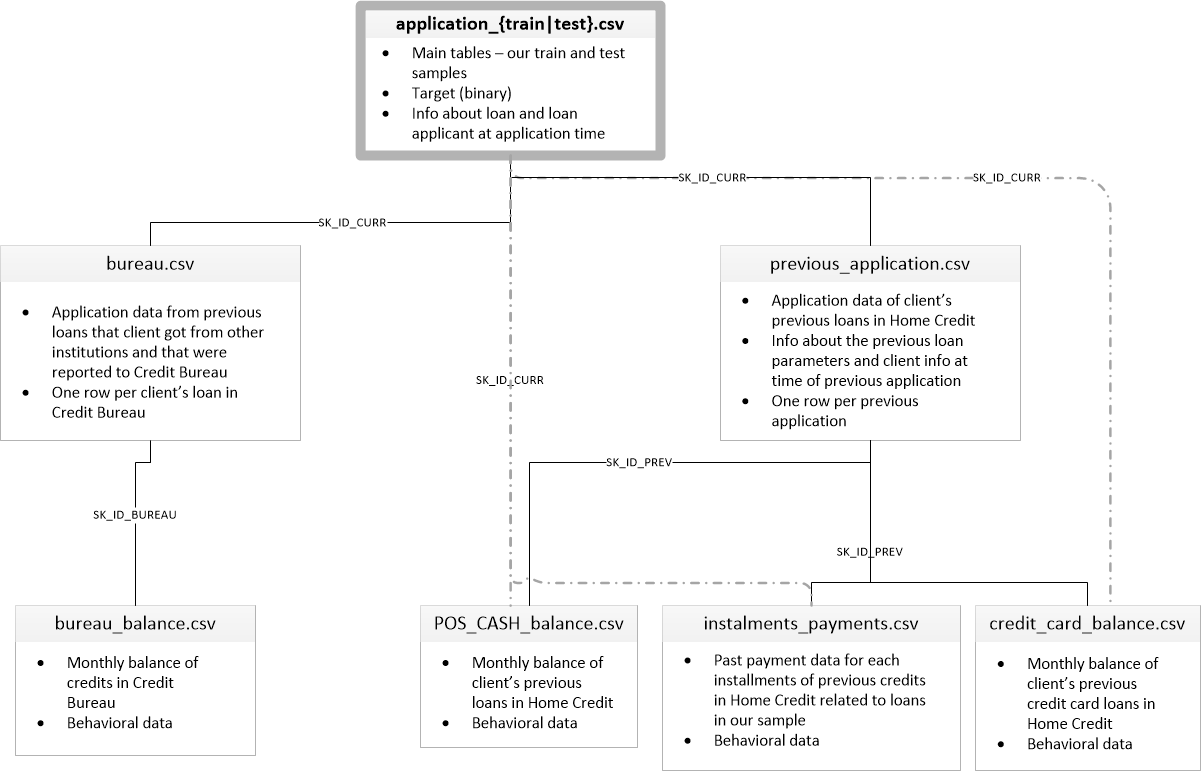

### Dropping all loaded dataframes for memory management

In [ ]:
del df_application_train
del df_application_test
del df_bureau
del df_bureau_balance
del df_credit_card_balance
del df_installments_payments
del df_POS_CASH_balance
del df_previous_application

## 3. Data Preprocessing and Feature Engineering

### Data Preprocessing and Feature Engineering `buerau.csv`, `buerau_balance.csv`

Brief description of dataframes (from Kaggle):

`buerau.csv`
All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

`buerau_balance.csv`
Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

| File                | Column Name           | Description                                                                                                                                              | Notes                                 |
|---------------------|------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------|
| `bureau.csv`        | `SK_ID_CURR`           | ID of loan in our sample – one loan in our sample can have 0, 1, 2 or more related previous credits in credit bureau                                     | hashed                                |
| `bureau.csv`        | `SK_BUREAU_ID`         | Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)                                               | hashed                                |
| `bureau.csv`        | `CREDIT_ACTIVE`        | Status of the Credit Bureau (CB) reported credits                                                                                                        |                                       |
| `bureau.csv`        | `CREDIT_CURRENCY`      | Recoded currency of the Credit Bureau credit                                                                                                             | recoded                               |
| `bureau.csv`        | `DAYS_CREDIT`          | How many days before current application did client apply for Credit Bureau credit                                                                      | time only relative to the application |
| `bureau.csv`        | `CREDIT_DAY_OVERDUE`   | Number of days past due on CB credit at the time of application for related loan in our sample                                                          |                                       |
| `bureau.csv`        | `DAYS_CREDIT_ENDDATE`  | Remaining duration of CB credit (in days) at the time of application in Home Credit                                                                      | time only relative to the application |
| `bureau.csv`        | `DAYS_ENDDATE_FACT`    | Days since CB credit ended at the time of application in Home Credit (only for closed credit)                                                            | time only relative to the application |
| `bureau.csv`        | `AMT_CREDIT_MAX_OVERDUE` | Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)                                                   |                                       |
| `bureau.csv`        | `CNT_CREDIT_PROLONG`   | How many times was the Credit Bureau credit prolonged                                                                                                    |                                       |
| `bureau.csv`        | `AMT_CREDIT_SUM`       | Current credit amount for the Credit Bureau credit                                                                                                       |                                       |
| `bureau.csv`        | `AMT_CREDIT_SUM_DEBT`  | Current debt on Credit Bureau credit                                                                                                                     |                                       |
| `bureau.csv`        | `AMT_CREDIT_SUM_LIMIT` | Current credit limit of credit card reported in Credit Bureau                                                                                            |                                       |
| `bureau.csv`        | `AMT_CREDIT_SUM_OVERDUE` | Current amount overdue on Credit Bureau credit                                                                                                           |                                       |
| `bureau.csv`        | `CREDIT_TYPE`          | Type of Credit Bureau credit (Car, cash,...)                                                                                                             |                                       |
| `bureau.csv`        | `DAYS_CREDIT_UPDATE`   | How many days before loan application did last information about the Credit Bureau credit come                                                           | time only relative to the application |
| `bureau.csv`        | `AMT_ANNUITY`          | Annuity of the Credit Bureau credit                                                                                                                      |                                       |
| `bureau_balance.csv` | `SK_BUREAU_ID`        | Recoded ID of Credit Bureau credit (unique coding for each application) – use this to join to CREDIT_BUREAU table                                       | hashed                                |
| `bureau_balance.csv` | `MONTHS_BALANCE`      | Month of balance relative to application date (-1 means the freshest balance date)                                                                      | time only relative to the application |
| `bureau_balance.csv` | `STATUS`              | Status of Credit Bureau loan during the month (`C` = closed, `X` = unknown, `0` = no DPD, `1-5` = days past due ranges)                                 |                                       |


In [ ]:
# load dataframes
df_bureau = pd.read_csv(os.path.join(data_dir, 'bureau.csv'), encoding='latin1')
df_bureau_balance = pd.read_csv(os.path.join(data_dir, 'bureau_balance.csv'), encoding='latin1')

In [ ]:
# ===========================
# EDA for `bureau.csv`
# ===========================
# Missing values
missing_bureau = df_bureau.isnull().mean().sort_values(ascending=False)
print("Missing Values in bureau.csv:")
print(missing_bureau)

# Numerical distributions
numerical_cols_bureau = df_bureau.select_dtypes(include='number').columns
df_bureau[numerical_cols_bureau].hist(bins=40, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Categorical columns
categorical_cols_bureau = df_bureau.columns.difference(numerical_cols_bureau)
print("Unique values in categorical columns:")
for col in categorical_cols_bureau:
    print(f"\nValue counts for {col}:")
    print(df_bureau[col].value_counts())
    df_bureau[col].value_counts().plot(kind='bar', title=col)
    plt.show()


# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_bureau[numerical_cols_bureau].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix - bureau.csv")
plt.show()

### Data Cleaning in `bureau.csv`

**Missing values**

`AMT_ANNUITY` (71% missing): Many credit records may not have fixed annuities.

`AMT_CREDIT_MAX_OVERDUE` (66% missing): Only available if there was ever an overdue event.

`DAYS_ENDDATE_FACT` (37% missing): Applies only to closed loans.

`AMT_CREDIT_SUM_LIMIT` (34% missing): Applies only to credit card accounts.

`AMT_CREDIT_SUM_DEBT` (15% missing): Available when there's an active debt.

`DAYS_CREDIT_ENDDATE` (6% missing): Open-ended credit or unknown date.

**Solution**

Add binary flag columns and impute with zeros or median values.

**Additional cleaning**
Consolidate various types of loans.

In [ ]:
# Add active credit flag
df_bureau['HAS_ACTIVE_CREDIT'] = (df_bureau['CREDIT_ACTIVE'] != 'Closed').astype(int)

# Missing values
# Replace missing  annuity with median, add flag
df_bureau['HAS_AMT_ANNUITY'] = df_bureau['AMT_ANNUITY'].notna().astype(int)
df_bureau['AMT_ANNUITY'] = df_bureau['AMT_ANNUITY'].fillna(df_bureau['AMT_ANNUITY'].median())

# Replace missing max overdue with 0, add flag
df_bureau['HAS_MAX_OVERDUE'] = df_bureau['AMT_CREDIT_MAX_OVERDUE'].notna().astype(int)
df_bureau['AMT_CREDIT_MAX_OVERDUE'] = df_bureau['AMT_CREDIT_MAX_OVERDUE'].fillna(0)

# Replace missing enddate with min (loan was closed in the past), add flag
df_bureau['HAS_ENDDATE_FACT'] = df_bureau['DAYS_ENDDATE_FACT'].notna().astype(int)
df_bureau['DAYS_ENDDATE_FACT'] = df_bureau['DAYS_ENDDATE_FACT'].fillna(df_bureau['DAYS_ENDDATE_FACT'].min())

# Replace missing credit sum limit with 0, addd flag
df_bureau['HAS_CREDIT_LIMIT'] = df_bureau['AMT_CREDIT_SUM_LIMIT'].notna().astype(int)
df_bureau['AMT_CREDIT_SUM_LIMIT'] = df_bureau['AMT_CREDIT_SUM_LIMIT'].fillna(0)

# Replace missing debt with 0
df_bureau['AMT_CREDIT_SUM_DEBT'] = df_bureau['AMT_CREDIT_SUM_DEBT'].fillna(0)

# Replace missing end date with min/max
# Compute conditional values
max_val = df_bureau['DAYS_CREDIT_ENDDATE'].max()
min_val = df_bureau['DAYS_CREDIT_ENDDATE'].min()

# Create a mask for missing values
missing_mask = df_bureau['DAYS_CREDIT_ENDDATE'].isna()

# Fill based on HAS_ACTIVE_CREDIT
df_bureau.loc[missing_mask & (df_bureau['HAS_ACTIVE_CREDIT'] == 1), 'DAYS_CREDIT_ENDDATE'] = max_val
df_bureau.loc[missing_mask & (df_bureau['HAS_ACTIVE_CREDIT'] != 1), 'DAYS_CREDIT_ENDDATE'] = np.abs(min_val)

In [ ]:
# Consolidate similar types of loans

credit_type_mapping = {
    'Consumer credit': 'Consumer',
    'Credit card': 'Credit card',
    'Car loan': 'Vehicle',
    'Mortgage': 'Mortgage',
    'Microloan': 'Small loan',
    'Loan for business development': 'Business',
    'Loan for working capital replenishment': 'Business',
    'Loan for the purchase of equipment': 'Business',
    'Loan for purchase of shares (margin lending)': 'Investment',
    'Cash loan (non-earmarked)': 'Consumer',
    'Another type of loan': 'Other',
    'Unknown type of loan': 'Other',
    'Real estate loan': 'Mortgage',
    'Mobile operator loan': 'Other',
    'Interbank credit': 'Other',
}

df_bureau['CREDIT_TYPE_GROUPED'] = df_bureau['CREDIT_TYPE'].map(credit_type_mapping).fillna('Other')

In [ ]:
df_bureau.head()

In [ ]:
# ===========================
# EDA for `bureau_balance.csv`
# ===========================

# Missing values
missing_bureau_balance = df_bureau_balance.isnull().mean().sort_values(ascending=False)
print("Missing Values in bureau_balance.csv:")
print(missing_bureau_balance)

# Unique counts
print("Unique SK_ID_BUREAU in bureau_balance:", df_bureau_balance['SK_ID_BUREAU'].nunique())
print("Value counts for STATUS:")
print(df_bureau_balance['STATUS'].value_counts())
df_bureau_balance['STATUS'].value_counts().plot(kind='bar', title='STATUS')
plt.show()

# Monthly history lengths
history_lengths = df_bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].count()
history_lengths.hist(bins=50)
plt.title("Distribution of Monthly Records per Bureau ID")
plt.xlabel("Number of Months")
plt.ylabel("Count")
plt.show()

### Data cleaning `bureau_balance.csv`

No missing values.
`MONTHS_BALANCE`  = 99 inducates earliest record available.


### Merging `bureau.csv` with `bureau_balance.csv`

Using inner merge: individual `SK_ID_BUREAU` buerau balance data won't enhance dataset if there's no matching `SK_ID_CURR`.


In [ ]:
df_bureau_full = df_bureau.merge(df_bureau_balance, on='SK_ID_BUREAU', how='inner')

In [ ]:
# delete old dataframes
del df_bureau
del df_bureau_balance

In [ ]:
df_bureau_full.head()

### Feature Engineering: Bureau-level for `df_bureau_full`

Adding columns:

`BUREAU_MONTHS_ACTIVE` -- Age of credit account for bureau.

`BUREAU_LATEST_STATUS` -- Most recent account status with the bureau.

`BUREAU_NUM_LATE_MONTHS` -- Count of late payments per bureau.

`BUREAU_LAST_LATE_MONTH` -- Last month of delinquency per bureau.

`BUREAU_STATUS_RATIO` -- Status distribution ratios per bureau.

In [ ]:
# ======================================
# Feature Engineering for df_bureau_full
# ======================================

# Number of months in credit history per client per bureau
bureau_months_active = (
    df_bureau_full
    .groupby(['SK_ID_CURR', 'SK_ID_BUREAU'])['MONTHS_BALANCE']
    .nunique()
    .rename('BUREAU_MONTHS_ACTIVE')
    .reset_index()
)

# Most recent status (month 0)
bureau_latest_status = (
    df_bureau_full[df_bureau_full['MONTHS_BALANCE'] == 0]
    .set_index(['SK_ID_CURR', 'SK_ID_BUREAU'])['STATUS']
    .rename('BUREAU_LATEST_STATUS')
)

# Count of late payments (STATUS in '1'-'5')
late_mask = df_bureau_full['STATUS'].isin(['1', '2', '3', '4', '5'])
bureau_num_late_months = (
    df_bureau_full[late_mask]
    .groupby(['SK_ID_CURR', 'SK_ID_BUREAU'])['STATUS']
    .count()
    .rename('BUREAU_NUM_LATE_MONTHS')
)
# Last month with late payment
bureau_last_late_month = (
    df_bureau_full[late_mask]
    .groupby(['SK_ID_CURR', 'SK_ID_BUREAU'])['MONTHS_BALANCE']
    .max()
    .rename('BUREAU_LAST_LATE_MONTH')
)
# Status distribution ratios
status_counts = (
    df_bureau_full
    .pivot_table(index=['SK_ID_CURR', 'SK_ID_BUREAU'],
                  columns='STATUS',
                  aggfunc='size',
                  fill_value=0)
)
status_counts['TOTAL'] = status_counts.sum(axis=1)
bureau_status_ratio = (
    status_counts
    .div(status_counts['TOTAL'], axis=0)
    .add_prefix('BUREAU_STATUS_RATIO_')
)
# Combine all features
# Start with months_active as the base
bureau_features = bureau_months_active.copy()
bureau_features = bureau_features.set_index(['SK_ID_CURR', 'SK_ID_BUREAU'])

# Join the other features
bureau_features = bureau_features.join(bureau_latest_status, how='left')
bureau_features = bureau_features.join(bureau_num_late_months, how='left')
bureau_features = bureau_features.join(bureau_last_late_month, how='left')
bureau_features = bureau_features.join(bureau_status_ratio, how='left')

# Fill missing late counts with 0
bureau_features['BUREAU_NUM_LATE_MONTHS'] = bureau_features['BUREAU_NUM_LATE_MONTHS'].fillna(0)
bureau_features['BUREAU_LAST_LATE_MONTH'] = bureau_features['BUREAU_LAST_LATE_MONTH'].fillna(0)

# Reset index to have SK_ID_CURR and SK_ID_BUREAU as columns
bureau_features = bureau_features.reset_index()

# If a bureau account has only on-time or closed months, delinquent_counts will not include that and left-joint will
# fill corresponding SK_ID_BUREAU values with NaN. It's safe to impute them with 0.

bureau_features['BUREAU_NUM_LATE_MONTHS'] = bureau_features['BUREAU_NUM_LATE_MONTHS'].fillna(0)
bureau_features['BUREAU_LAST_LATE_MONTH'] = bureau_features['BUREAU_LAST_LATE_MONTH'].fillna(0)

In [ ]:
bureau_features.head()

### Merge with the main dataframe and clear

In [ ]:
df_bureau_full = df_bureau_full.merge(bureau_features, on='SK_ID_BUREAU', how='left')

In [ ]:
del bureau_features

In [ ]:
df_bureau_full.head()

In [ ]:
# Rename SK_ID_CURR_x to SK_ID_CURR
df_bureau_full.rename(columns={'SK_ID_CURR_x': 'SK_ID_CURR'}, inplace=True)

### Feature Engineering: Client-Level Features with Aggregation

Each row in bureau.csv represents a past credit report tied to a customer (SK_ID_CURR). A customer may have multiple past credits and we need to aggregate the past credit history to summarize each client's risk profile with a fixed set of features.

In [49]:
# =======================================
# Feature Engineering for `df_bureau_full`
# =======================================

# Define the aggregations
agg_specs = {
    'AMT_ANNUITY': ['mean', 'min', 'max', 'sum', 'var'],
    'AMT_CREDIT_SUM': ['mean', 'min', 'max', 'sum', 'var'],
    'AMT_CREDIT_SUM_DEBT': ['mean', 'min', 'max', 'sum', 'var'],
    'AMT_CREDIT_SUM_LIMIT': ['mean', 'min', 'max', 'sum', 'var'],
    'AMT_CREDIT_SUM_OVERDUE': ['mean', 'min', 'max', 'sum', 'var'],
    'AMT_CREDIT_MAX_OVERDUE': ['mean', 'min', 'max', 'sum', 'var'],
    'CNT_CREDIT_PROLONG': ['mean', 'min', 'max', 'sum', 'var'],
    'CREDIT_DAY_OVERDUE': ['mean', 'min', 'max', 'sum', 'var'],
    'DAYS_CREDIT': ['mean', 'min', 'max', 'sum', 'var'],
    'DAYS_CREDIT_ENDDATE': ['mean', 'min', 'max', 'sum', 'var'],
    'DAYS_CREDIT_UPDATE': ['mean', 'min', 'max', 'sum', 'var'],
}

# Perform the aggregation
df_agg = df_bureau_full.groupby('SK_ID_CURR').agg(agg_specs)

# Flatten MultiIndex columns
df_agg.columns = [
    f"SK_ID_CURR_{col[0].upper()}_{col[1].upper()}" for col in df_agg.columns
]

# Reset index to merge back to df_bureau if needed
df_agg = df_agg.reset_index()

# Merge the aggregated features back to df_bureau_full
df_bureau_full = df_bureau_full.merge(df_agg, on='SK_ID_CURR', how='left')

In [50]:
# delete df_agg
del df_agg

### Engineering Features: Summary per Client

Separate active and closed loans, for each closed/active loan create aggregated columns, where * in column name is `ACTIVE` or `CLOSED`.

| Feature Name                            | Meaning                           |
| --------------------------------------- | --------------------------------- |
| `*_AMT_PAST_LOANS`           | Total past loans from bureau data |
| `*_AMT_LOAN_TYPES`           | Number of distinct loan types     |
| `*_AVG_LOANS_PER_TYPE` | Loan count / type count ratio     |
| `*_RAT_DEBT_CREDIT`              | Total debt / total credit         |
| `*_RAT_OVERDUE_DEBT`             | Overdue / debt                    |
| `*_PCT_CREDIT_ENDDATE`      | Fraction of active (future) loans |
| `*_LOANS_LAST_6_MONTHS`      |  Number of loans in last 6 Months |
| `*_LOANS_LAST_YEAR`      | Number od loans in the last 12 months |
| `*_LOANS_LAST_5_YEARS`      |  Number of loans in the last 5 years |

In [51]:
# Separate active and closed loans
active_loans = df_bureau_full[df_bureau_full['CREDIT_ACTIVE'] == 'Active']
closed_loans = df_bureau_full[df_bureau_full['CREDIT_ACTIVE'] == 'Closed']

In [52]:
# Clear df_bureau_full
del df_bureau_full

In [53]:
# ==================================================
# Feature Engineering Closed Loans or df_bureau_full
# ==================================================

# Total past loans for closed loans
closed_amt_past_loans = closed_loans.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum().rename('CLOSED_AMT_PAST_LOANS')

# Number of distinct loan types
closed_loan_types = closed_loans.groupby('SK_ID_CURR')['CREDIT_TYPE'].nunique().rename('CLOSED_AMT_LOAN_TYPES')

# Loan count / type count ratio
closed_loan_count = closed_loans.groupby('SK_ID_CURR')['SK_ID_BUREAU'].count().rename('CLOSED_LOAN_COUNT')
closed_avg_loans_per_type = (closed_loan_count / closed_loan_types).rename('CLOSED_AVG_LOANS_PER_TYPE')

# Debt / credit ratio
closed_total_debt = closed_loans.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum()
closed_total_credit = closed_loans.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum()
closed_rat_debt_credit = (closed_total_debt / closed_total_credit).replace([np.inf, -np.inf], np.nan).fillna(0).rename('CLOSED_RAT_DEBT_CREDIT')

# Overdue / debt ratio
closed_total_overdue = closed_loans.groupby('SK_ID_CURR')['AMT_CREDIT_MAX_OVERDUE'].sum()
closed_rat_overdue_debt = (closed_total_overdue / closed_total_debt).replace([np.inf, -np.inf], np.nan).fillna(0).rename('CLOSED_RAT_OVERDUE_DEBT')

# Fraction of active (future) loans (should be 0 for closed loans)
closed_pct_credit_enddate = closed_loans.groupby('SK_ID_CURR')['DAYS_CREDIT_ENDDATE'].apply(lambda x: (x > 0).mean()).rename('CLOSED_PCT_CREDIT_ENDDATE')

# Closed loans in last 6 months, year, 5 years
closed_loans_last_year = closed_loans[closed_loans['DAYS_CREDIT'] >= -365].groupby('SK_ID_CURR')['SK_ID_BUREAU'].nunique().rename('CLOSED_LOANS_LAST_YEAR')
closed_loans_last_6_months = closed_loans[closed_loans['DAYS_CREDIT'] >= -180].groupby('SK_ID_CURR')['SK_ID_BUREAU'].nunique().rename('CLOSED_LOANS_LAST_6_MONTHS')
closed_loans_last_5_years = closed_loans[closed_loans['DAYS_CREDIT'] >= -1825].groupby('SK_ID_CURR')['SK_ID_BUREAU'].nunique().rename('CLOSED_LOANS_LAST_5_YEARS')

In [54]:
# ==================================================
# Feature Engineering Active Loans or df_bureau_full
# ==================================================

# Total past loans for active loans
active_amt_past_loans = active_loans.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum().rename('ACTIVE_AMT_PAST_LOANS')

# Number of distinct loan types
active_loan_types = active_loans.groupby('SK_ID_CURR')['CREDIT_TYPE'].nunique().rename('ACTIVE_AMT_LOAN_TYPES')

# Loan count / type count ratio
active_loan_count = active_loans.groupby('SK_ID_CURR')['SK_ID_BUREAU'].count().rename('ACTIVE_LOAN_COUNT')
active_avg_loans_per_type = (active_loan_count / active_loan_types).rename('ACTIVE_AVG_LOANS_PER_TYPE')

# Debt / credit ratio
active_total_debt = active_loans.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum()
active_total_credit = active_loans.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum()
active_rat_debt_credit = (active_total_debt / active_total_credit).replace([np.inf, -np.inf], np.nan).fillna(0).rename('ACTIVE_RAT_DEBT_CREDIT')

# Overdue / debt ratio
active_total_overdue = active_loans.groupby('SK_ID_CURR')['AMT_CREDIT_MAX_OVERDUE'].sum()
active_rat_overdue_debt = (active_total_overdue / active_total_debt).replace([np.inf, -np.inf], np.nan).fillna(0).rename('ACTIVE_RAT_OVERDUE_DEBT')

# Fraction of active loans (should be 1 for active loans only)
active_pct_credit_enddate = active_loans.groupby('SK_ID_CURR')['DAYS_CREDIT_ENDDATE'].apply(lambda x: (x > 0).mean()).rename('ACTIVE_PCT_CREDIT_ENDDATE')

# Active loans during last 6 months, 12 months, 5 years:

active_loans_last_year = active_loans[active_loans['DAYS_CREDIT'] >= -365].groupby('SK_ID_CURR')['SK_ID_BUREAU'].nunique().rename('ACTIVE_LOANS_LAST_YEAR')
active_loans_last_6_months = active_loans[active_loans['DAYS_CREDIT'] >= -180].groupby('SK_ID_CURR')['SK_ID_BUREAU'].nunique().rename('ACTIVE_LOANS_LAST_6_MONTHS')
active_loans_last_5_years = active_loans[active_loans['DAYS_CREDIT'] >= -1825].groupby('SK_ID_CURR')['SK_ID_BUREAU'].nunique().rename('ACTIVE_LOANS_LAST_5_YEARS')

In [55]:
closed_features = pd.concat([
    closed_amt_past_loans,
    closed_loan_types,
    closed_avg_loans_per_type,
    closed_rat_debt_credit,
    closed_rat_overdue_debt,
    closed_pct_credit_enddate,
    closed_loans_last_year,
    closed_loans_last_6_months,
    closed_loans_last_5_years
], axis=1).reset_index()  # reset_index to have SK_ID_CURR as a column

In [56]:
active_features = pd.concat([
    active_amt_past_loans,
    active_loan_types,
    active_avg_loans_per_type,
    active_rat_debt_credit,
    active_rat_overdue_debt,
    active_pct_credit_enddate,
    active_loans_last_year,
    active_loans_last_6_months,
    active_loans_last_5_years
], axis=1).reset_index()  # reset_index to have SK_ID_CURR as a column

In [57]:
# Cear closed loans
del closed_loans

In [58]:
# Merge active_loans with active_features
active_loans_with_features = active_loans.merge(active_features, on='SK_ID_CURR', how='inner')

# Merge active_loans with closed_features
active_loans_with_features = active_loans_with_features.merge(closed_features, on='SK_ID_CURR', how='inner')

In [59]:
# Clear dataframes
del active_features
del closed_features

In [60]:
active_loans_with_features.head(20)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0       380361       5715448        Active      currency 1         -820   
1       380361       5715448        Active      currency 1         -820   
2       380361       5715448        Active      currency 1         -820   
3       380361       5715448        Active      currency 1         -820   
4       380361       5715448        Active      currency 1         -820   
5       380361       5715448        Active      currency 1         -820   
6       380361       5715448        Active      currency 1         -820   
7       380361       5715448        Active      currency 1         -820   
8       380361       5715448        Active      currency 1         -820   
9       380361       5715448        Active      currency 1         -820   
10      380361       5715448        Active      currency 1         -820   
11      380361       5715448        Active      currency 1         -820   
12      380361       5715448        Active      currency 1         -820   
13      380361       5715448        Active      currency 1         -820   
14      380361       5715448        Active      currency 1         -820   
15      380361       5715448        Active      currency 1         -820   
16      380361       5715448        Active      currency 1         -820   
17      380361       5715448        Active      currency 1         -820   
18      380361       5715448        Active      currency 1         -820   
19      380361       5715448        Active      currency 1         -820   

    CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                    0              31069.0           -42023.0   
1                    0              31069.0           -42023.0   
2                    0              31069.0           -42023.0   
3                    0              31069.0           -42023.0   
4                    0              31069.0           -42023.0   
5                    0              31069.0           -42023.0   
6                    0              31069.0           -42023.0   
7                    0              31069.0           -42023.0   
8                    0              31069.0           -42023.0   
9                    0              31069.0           -42023.0   
10                   0              31069.0           -42023.0   
11                   0              31069.0           -42023.0   
12                   0              31069.0           -42023.0   
13                   0              31069.0           -42023.0   
14                   0              31069.0           -42023.0   
15                   0              31069.0           -42023.0   
16                   0              31069.0           -42023.0   
17                   0              31069.0           -42023.0   
18                   0              31069.0           -42023.0   
19                   0              31069.0           -42023.0   

    AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                      0.0                   0         67500.0   
1                      0.0                   0         67500.0   
2                      0.0                   0         67500.0   
3                      0.0                   0         67500.0   
4                      0.0                   0         67500.0   
5                      0.0                   0         67500.0   
6                      0.0                   0         67500.0   
7                      0.0                   0         67500.0   
8                      0.0                   0         67500.0   
9                      0.0                   0         67500.0   
10                     0.0                   0         67500.0   
11                     0.0                   0         67500.0   
12                     0.0                   0         67500.0   
13                     0.0                   0         67500.0   
14                     0.0                   0     

### Active Loans with Features EDA

In [61]:
print("Basic Info:")
print(active_loans_with_features.info())

print("\nBasic Statistics:")
print(active_loans_with_features.describe(include='all'))

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5080156 entries, 0 to 5080155
Columns: 112 entries, SK_ID_CURR to CLOSED_LOANS_LAST_5_YEARS
dtypes: float64(78), int64(28), object(6)
memory usage: 4.2+ GB
None

Basic Statistics:
          SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  \
count   5.080156e+06  5.080156e+06       5080156         5080156   
unique           NaN           NaN             1               3   
top              NaN           NaN        Active      currency 1   
freq             NaN           NaN       5080156         5077981   
mean    2.778226e+05  6.030774e+06           NaN             NaN   
std     1.029626e+05  4.962603e+05           NaN             NaN   
min     1.000010e+05  5.001711e+06           NaN             NaN   
25%     1.883690e+05  5.718660e+06           NaN             NaN   
50%     2.775540e+05  6.063522e+06           NaN             NaN   
75%     3.670660e+05  6.432773e+06           NaN             NaN   
max     4.

In [62]:
print("\nMissing values:")
print(active_loans_with_features.isnull().sum())


Missing values:
SK_ID_CURR                                      0
SK_ID_BUREAU                                    0
CREDIT_ACTIVE                                   0
CREDIT_CURRENCY                                 0
DAYS_CREDIT                                     0
CREDIT_DAY_OVERDUE                              0
DAYS_CREDIT_ENDDATE                             0
DAYS_ENDDATE_FACT                               0
AMT_CREDIT_MAX_OVERDUE                          0
CNT_CREDIT_PROLONG                              0
AMT_CREDIT_SUM                                  0
AMT_CREDIT_SUM_DEBT                             0
AMT_CREDIT_SUM_LIMIT                            0
AMT_CREDIT_SUM_OVERDUE                          0
CREDIT_TYPE                                     0
DAYS_CREDIT_UPDATE                              0
AMT_ANNUITY                                     0
HAS_ACTIVE_CREDIT                               0
HAS_AMT_ANNUITY                                 0
HAS_MAX_OVERDUE                  

In [63]:
# Imputing NaNs
# Replace Unknown BUREAU_LATEST_STATUS with 'C' (Closed)
active_loans_with_features['BUREAU_LATEST_STATUS'] = active_loans_with_features['BUREAU_LATEST_STATUS'].fillna('C')

In [64]:
# Imputing NaNs
# Replace missing loans with 0
loan_count_cols = [
    'ACTIVE_LOANS_LAST_YEAR', 'ACTIVE_LOANS_LAST_6_MONTHS', 'ACTIVE_LOANS_LAST_5_YEARS',
    'CLOSED_LOANS_LAST_YEAR', 'CLOSED_LOANS_LAST_6_MONTHS', 'CLOSED_LOANS_LAST_5_YEARS'
]
active_loans_with_features[loan_count_cols] = active_loans_with_features[loan_count_cols].fillna(0).astype(int)

In [65]:
# Imputing NaNs
# Check
print("\nMissing values after imputing:")
print(active_loans_with_features.isnull().sum())


Missing values after imputing:
SK_ID_CURR                                0
SK_ID_BUREAU                              0
CREDIT_ACTIVE                             0
CREDIT_CURRENCY                           0
DAYS_CREDIT                               0
CREDIT_DAY_OVERDUE                        0
DAYS_CREDIT_ENDDATE                       0
DAYS_ENDDATE_FACT                         0
AMT_CREDIT_MAX_OVERDUE                    0
CNT_CREDIT_PROLONG                        0
AMT_CREDIT_SUM                            0
AMT_CREDIT_SUM_DEBT                       0
AMT_CREDIT_SUM_LIMIT                      0
AMT_CREDIT_SUM_OVERDUE                    0
CREDIT_TYPE                               0
DAYS_CREDIT_UPDATE                        0
AMT_ANNUITY                               0
HAS_ACTIVE_CREDIT                         0
HAS_AMT_ANNUITY                           0
HAS_MAX_OVERDUE                           0
HAS_ENDDATE_FACT                          0
HAS_CREDIT_LIMIT                          0


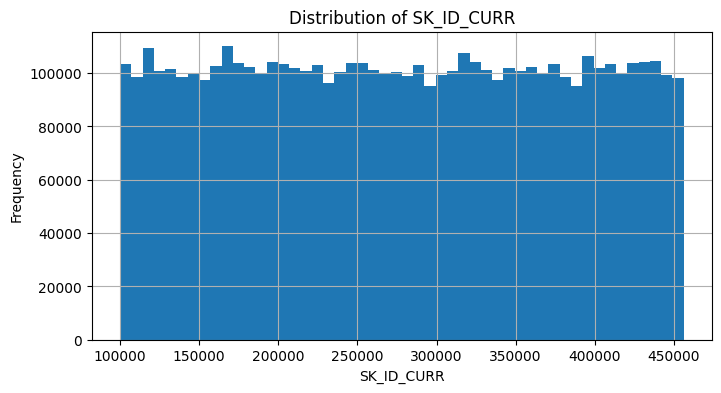

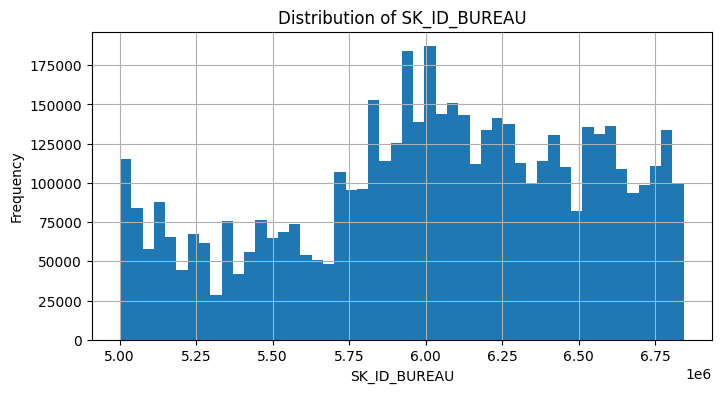

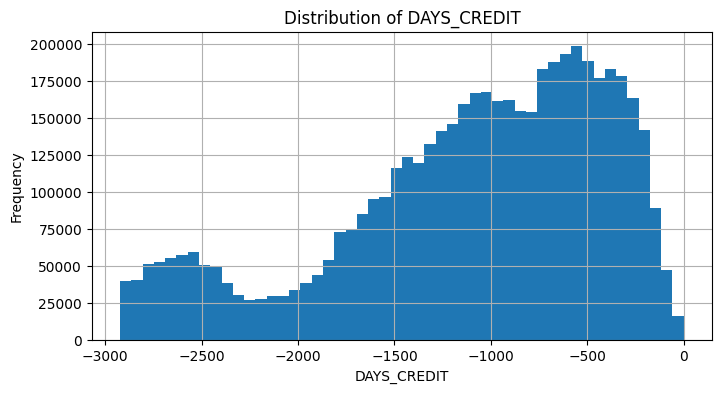

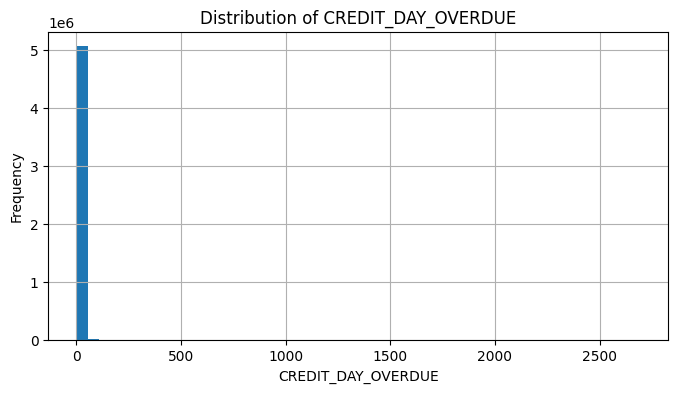

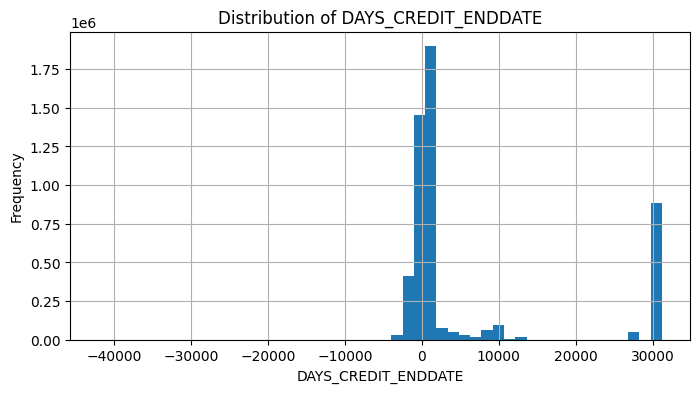

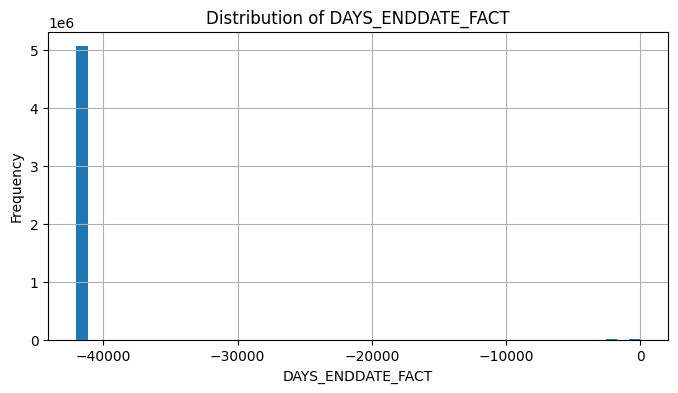

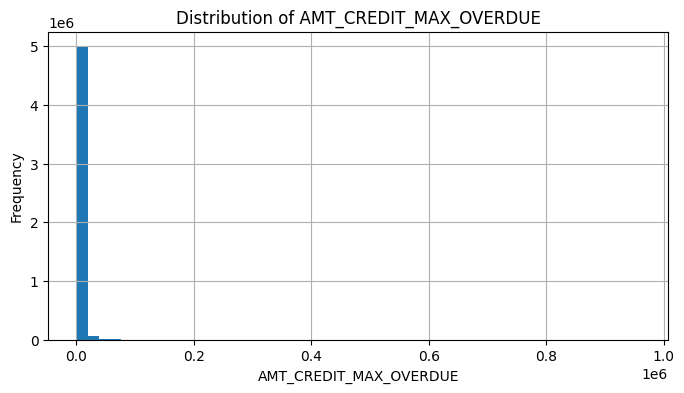

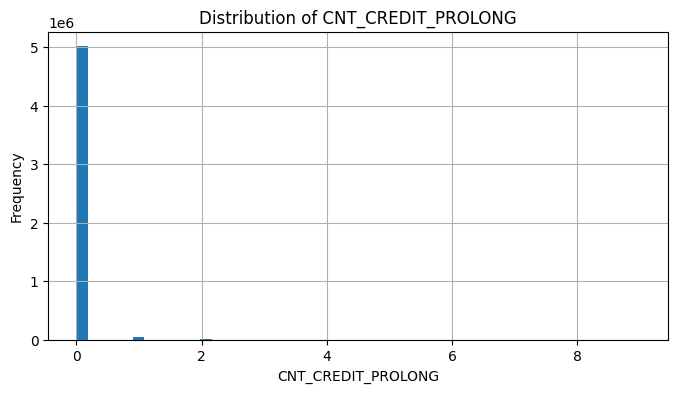

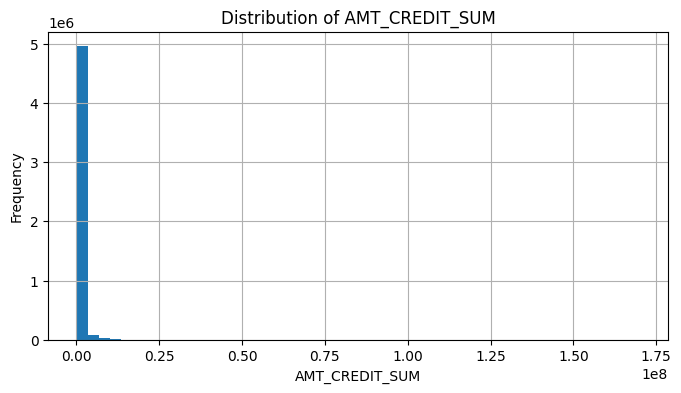

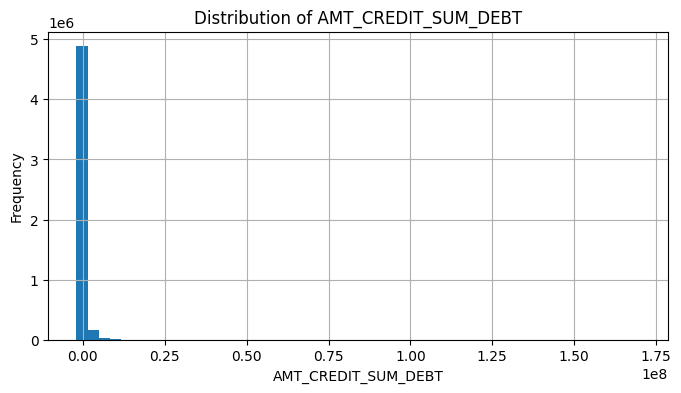

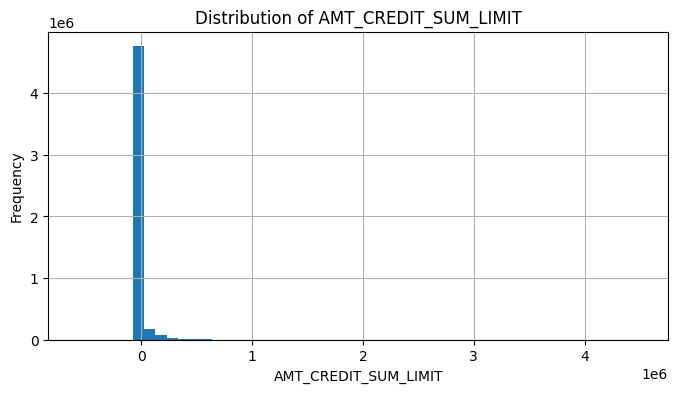

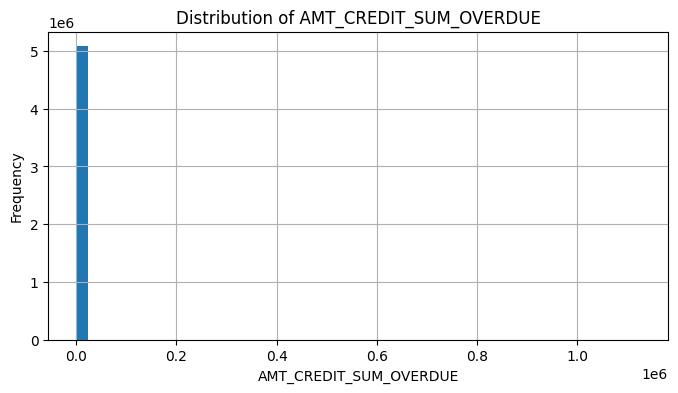

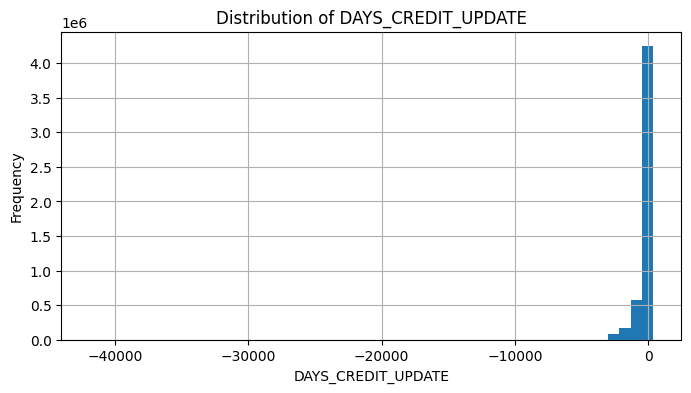

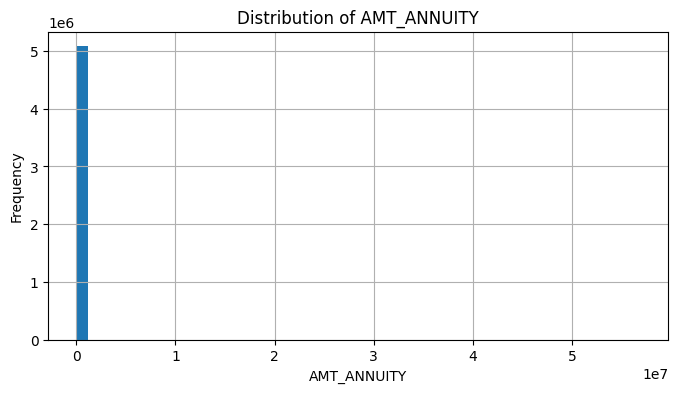

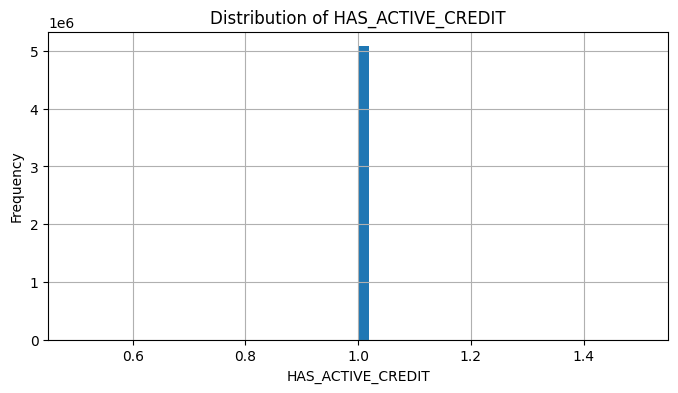

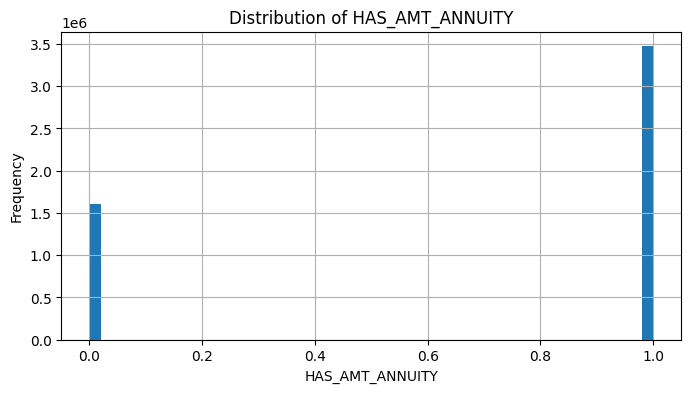

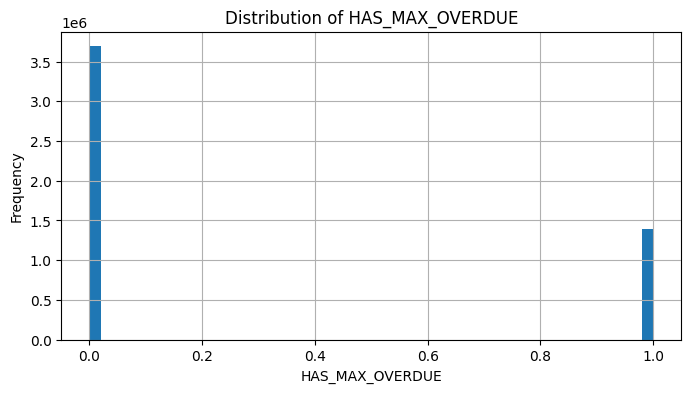

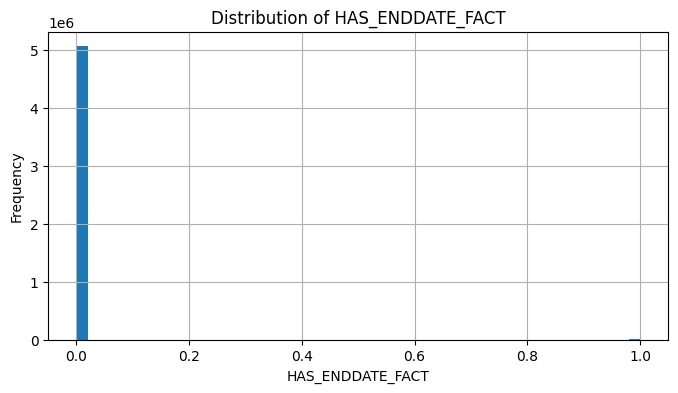

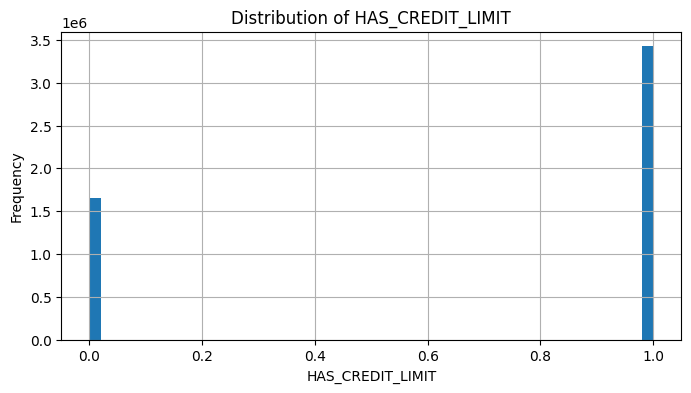

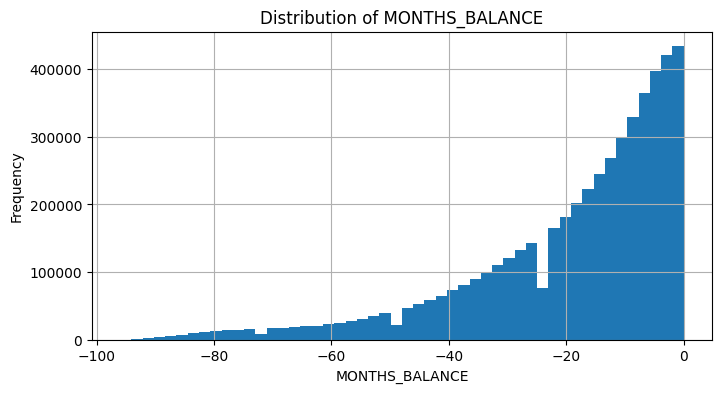

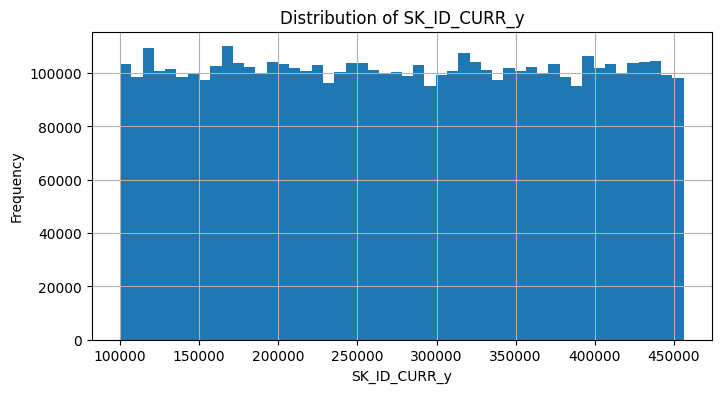

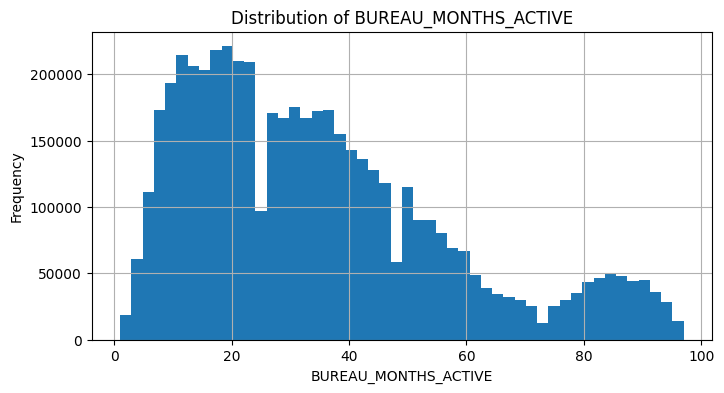

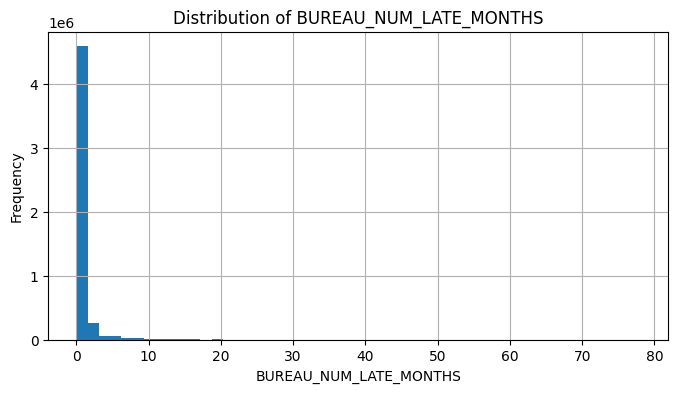

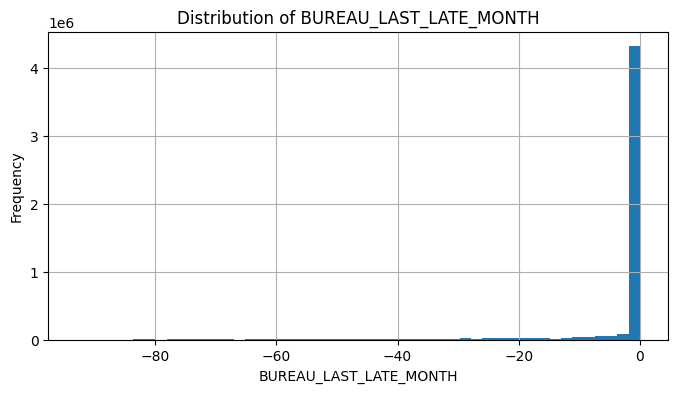

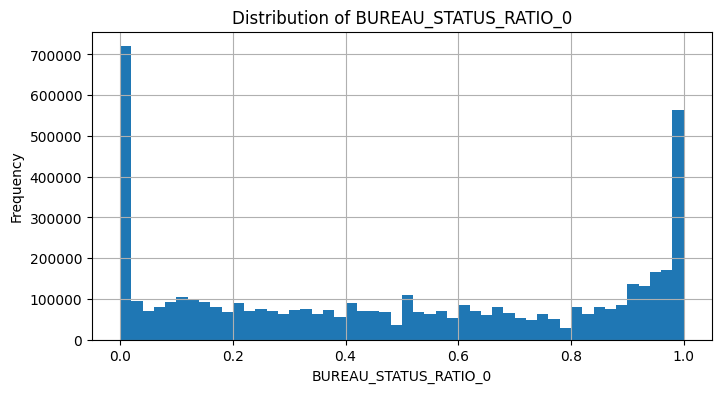

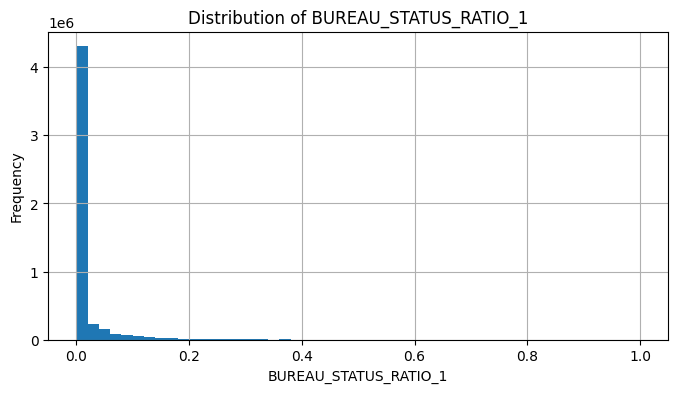

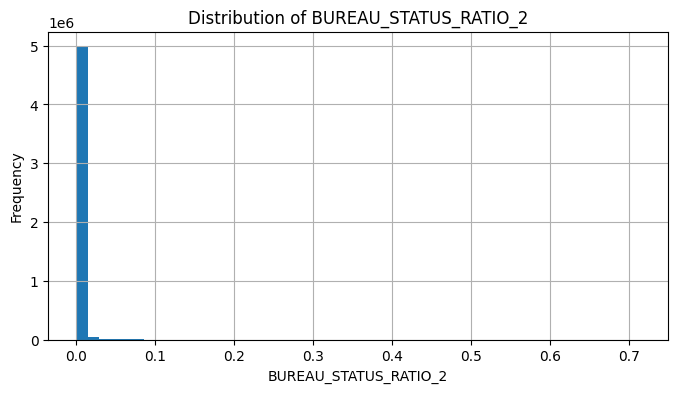

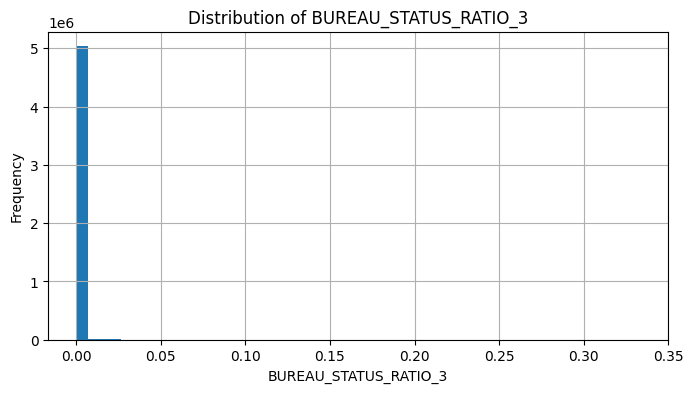

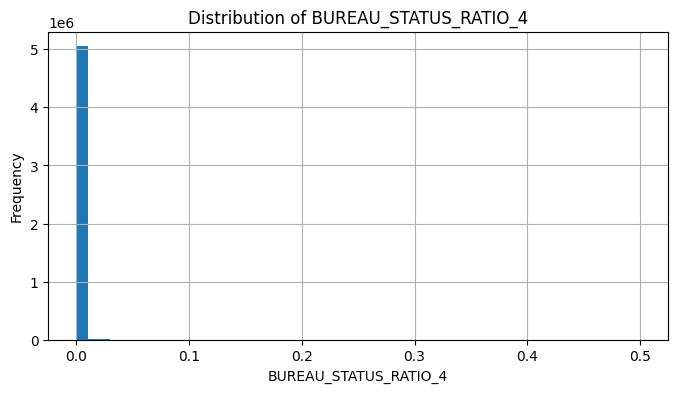

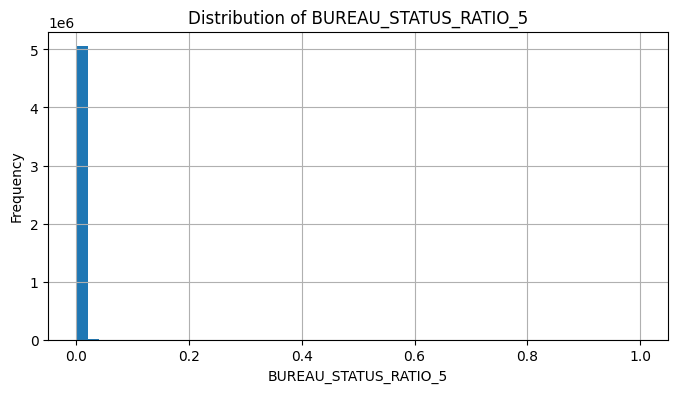

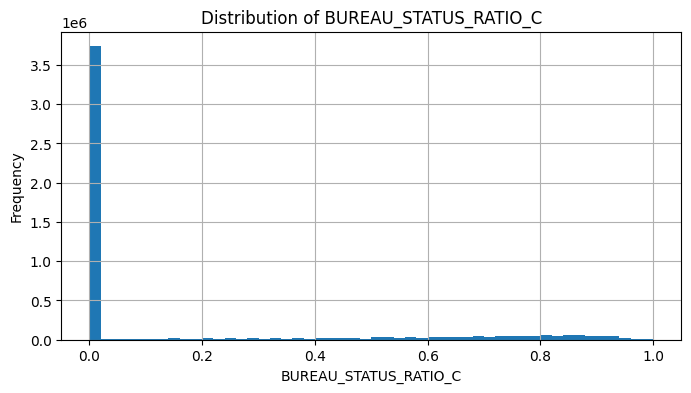

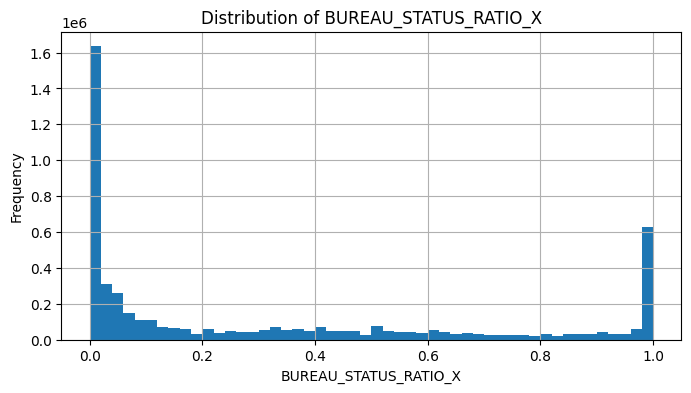

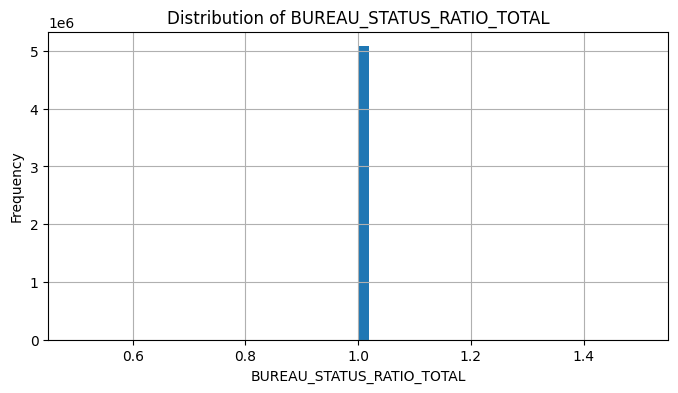

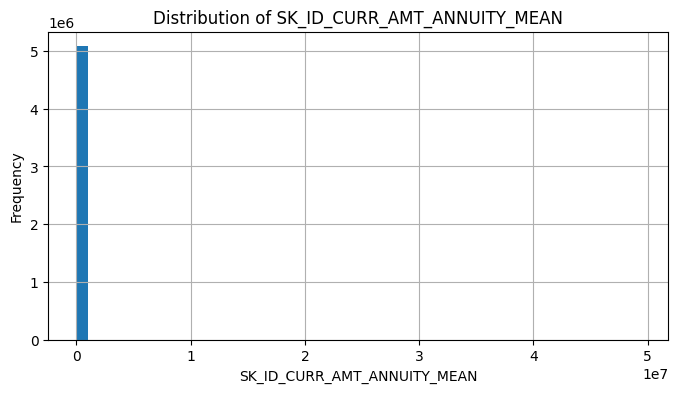

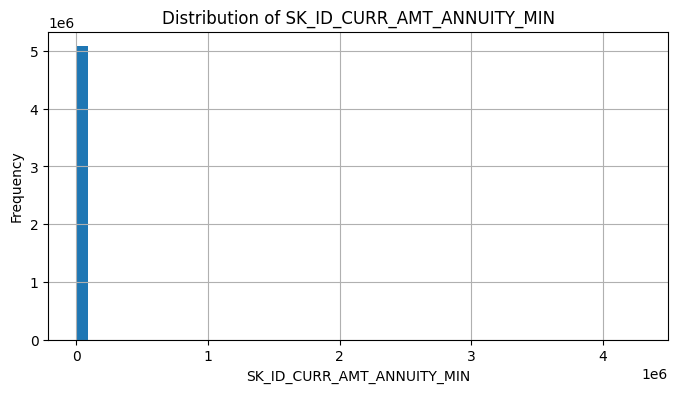

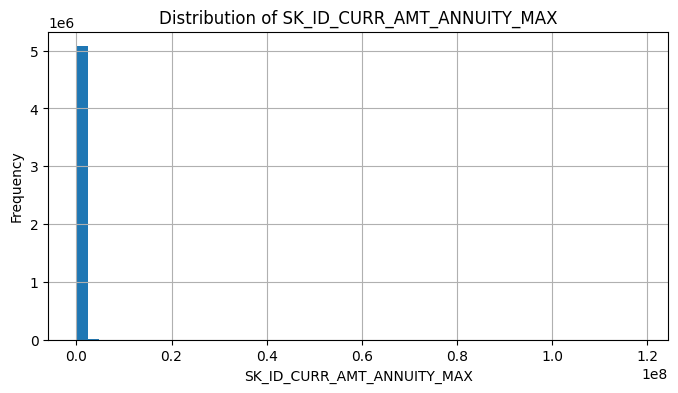

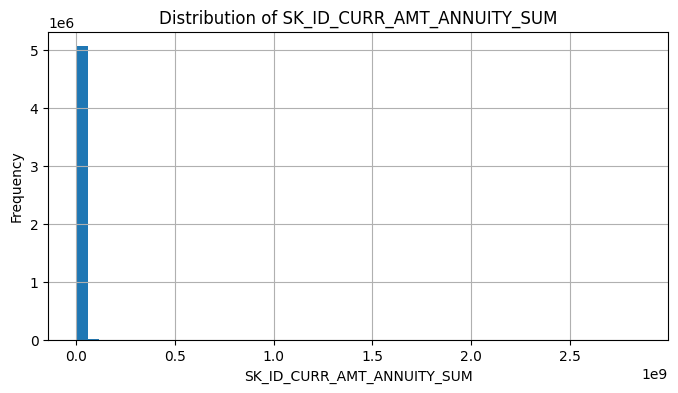

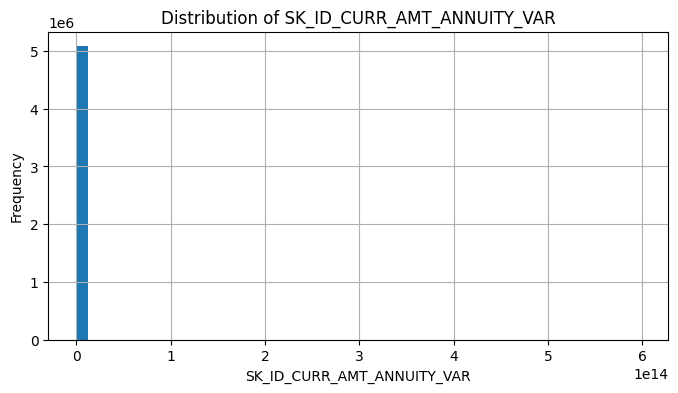

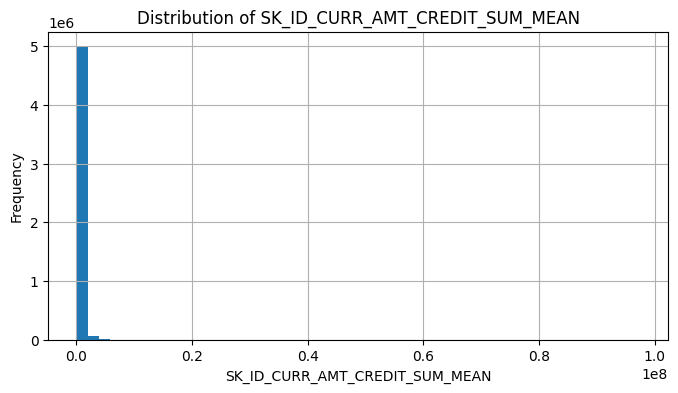

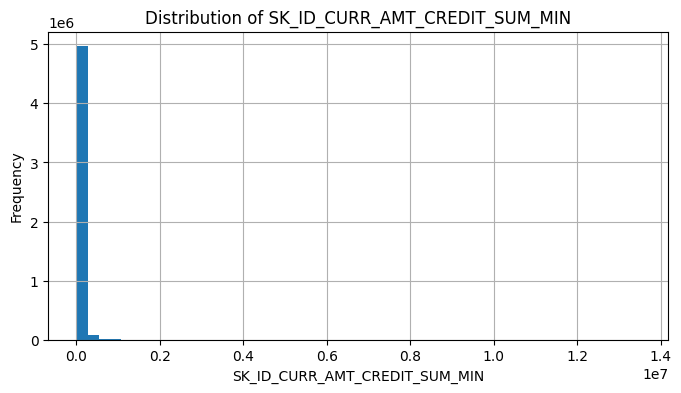

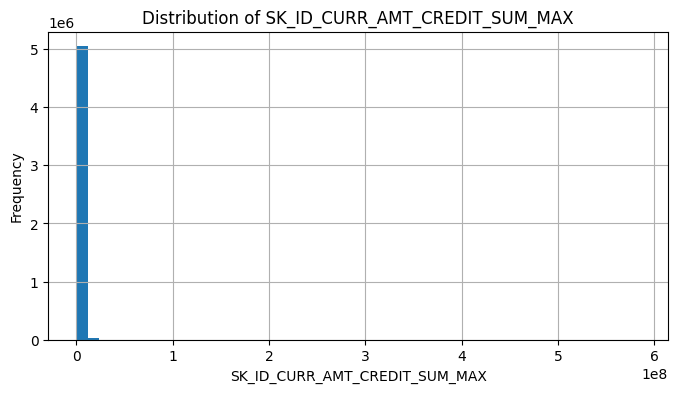

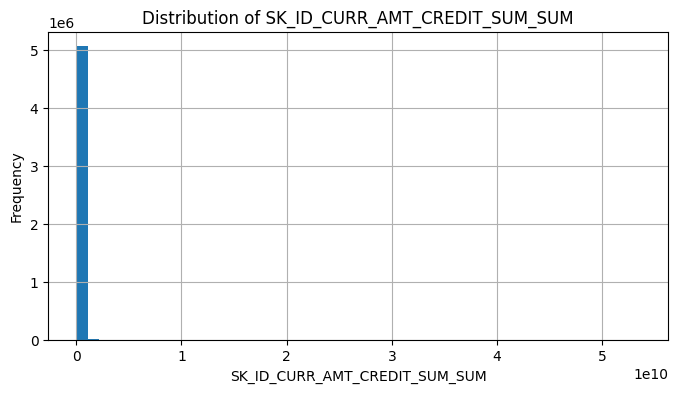

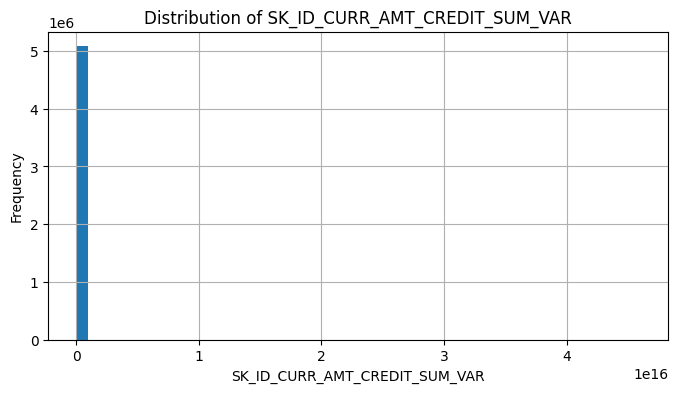

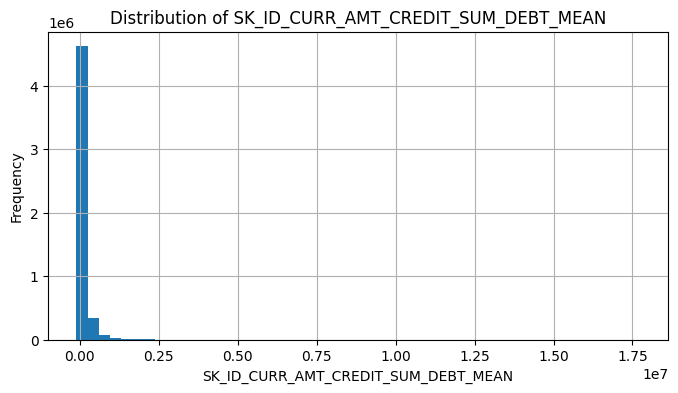

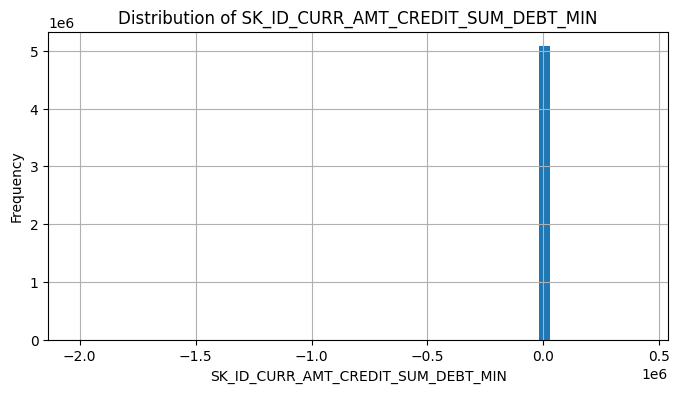

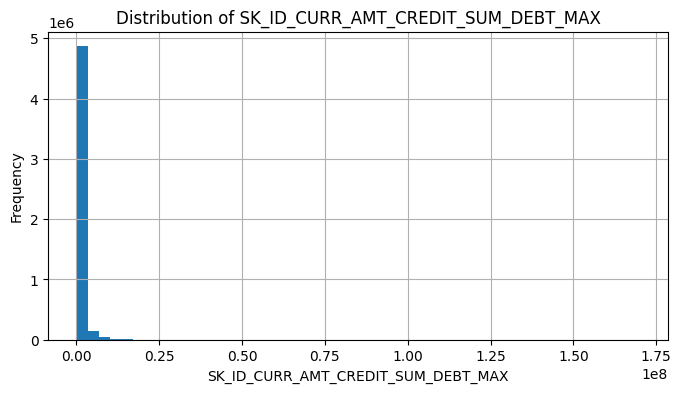

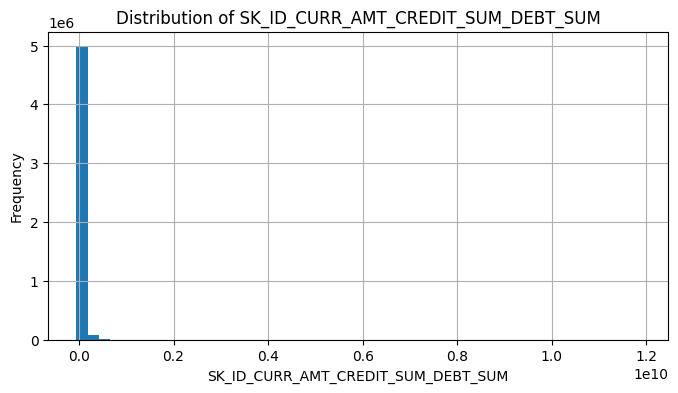

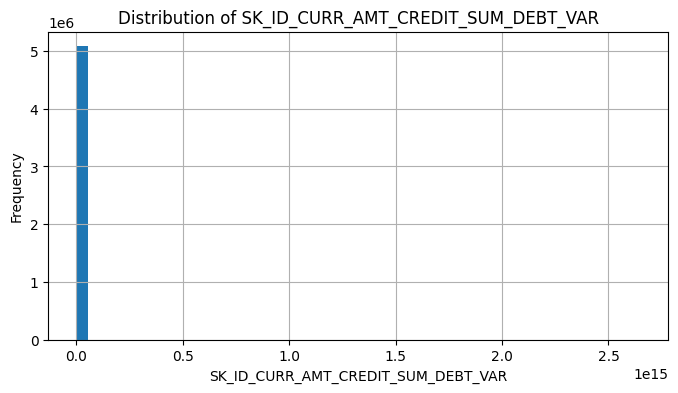

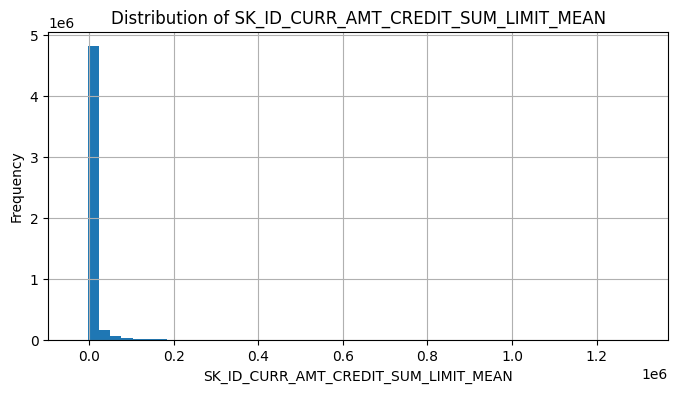

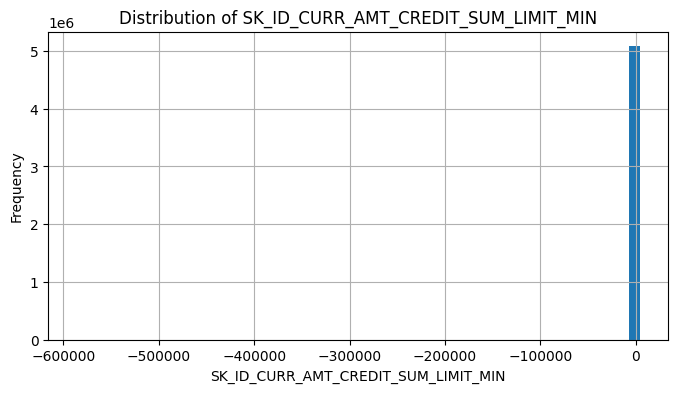

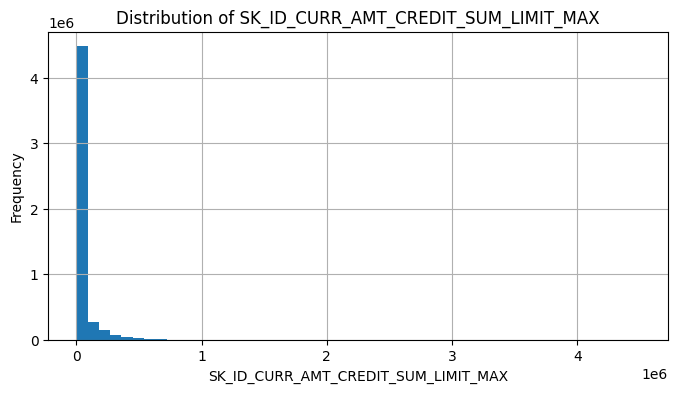

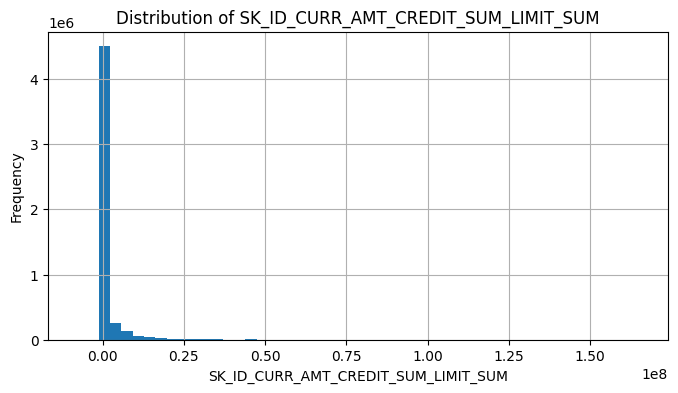

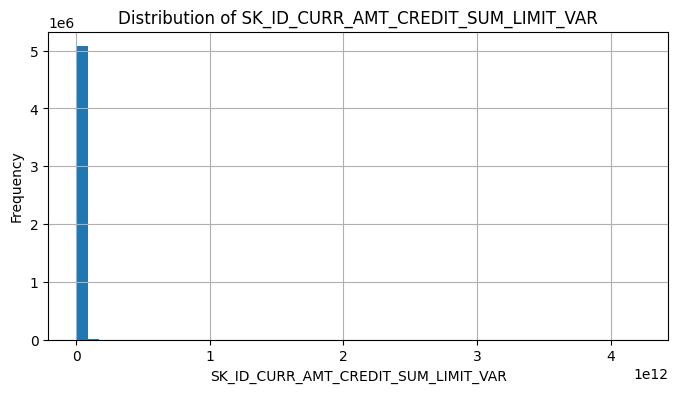

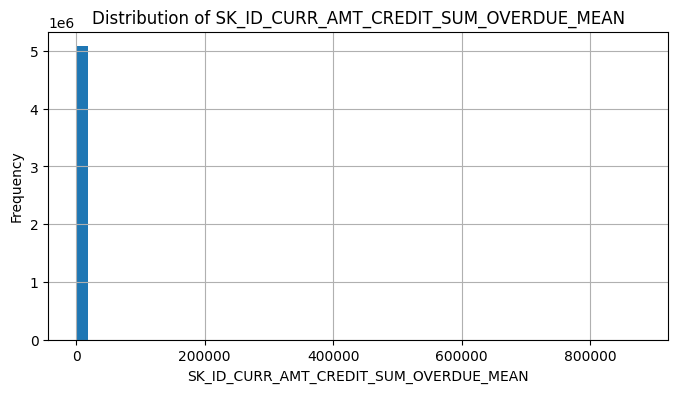

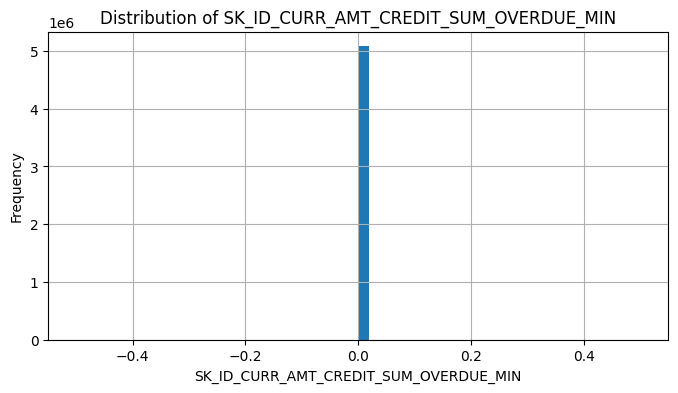

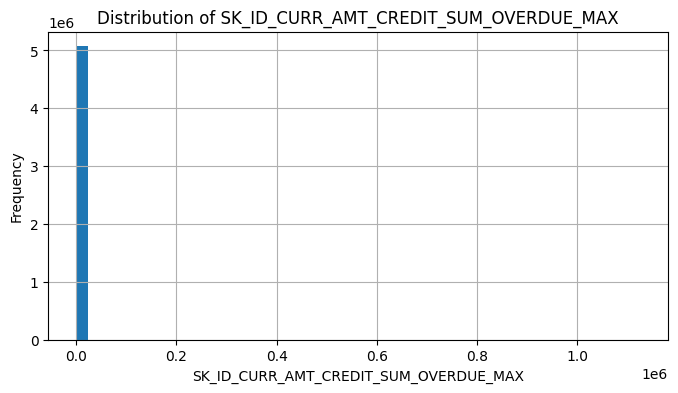

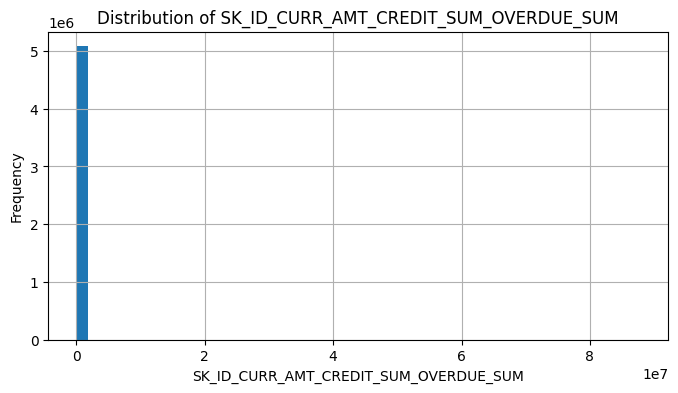

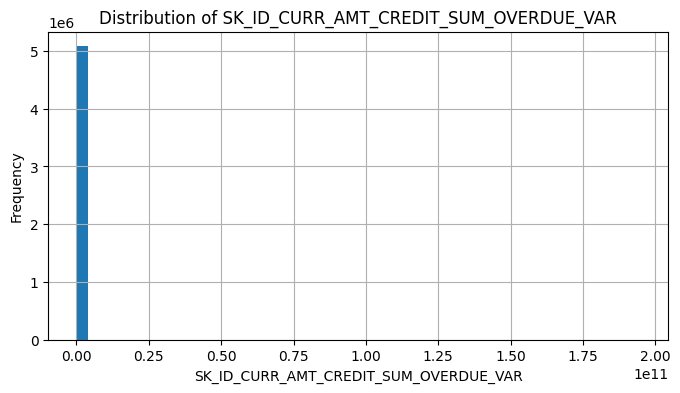

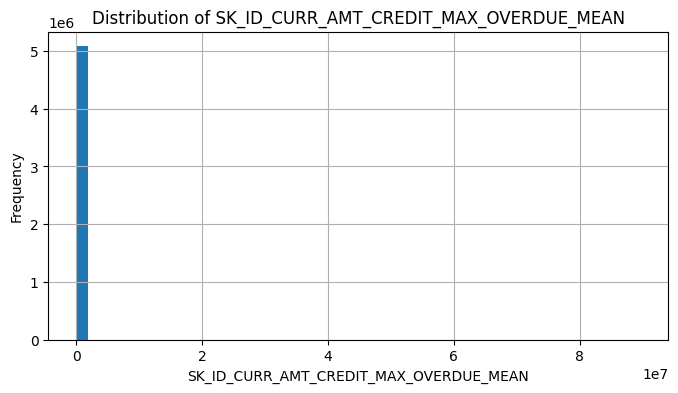

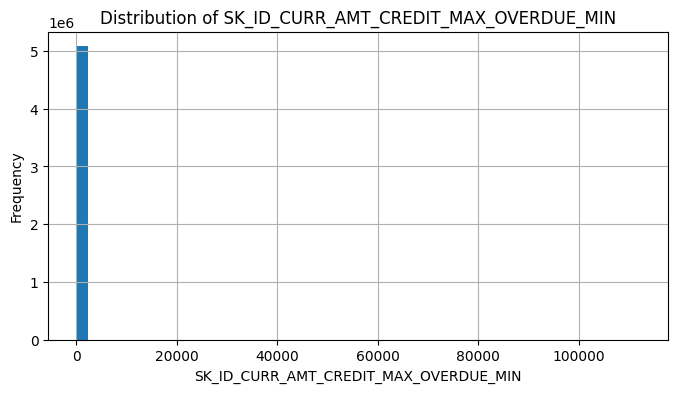

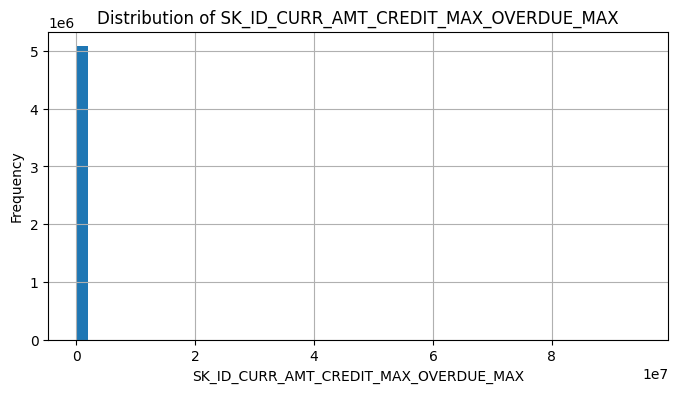

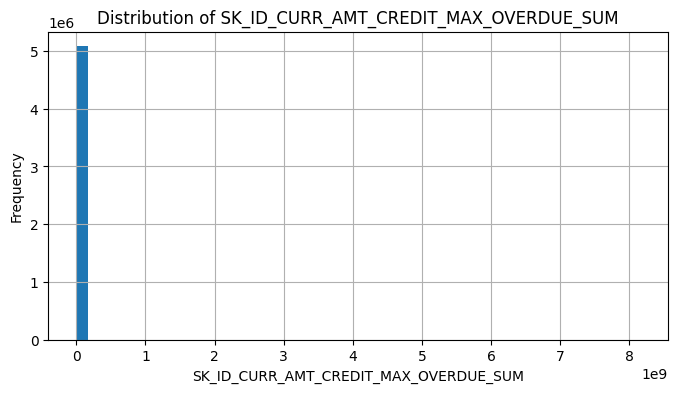

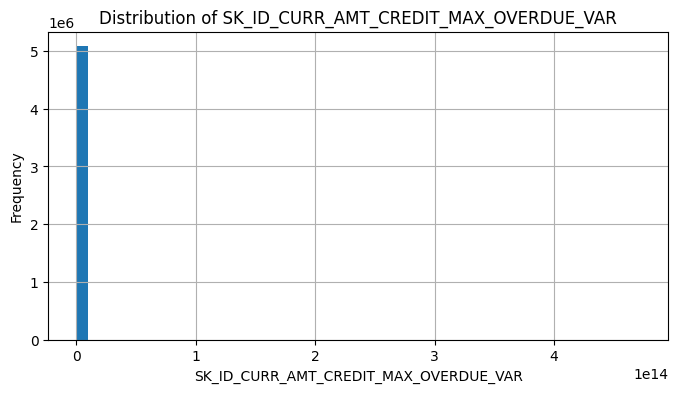

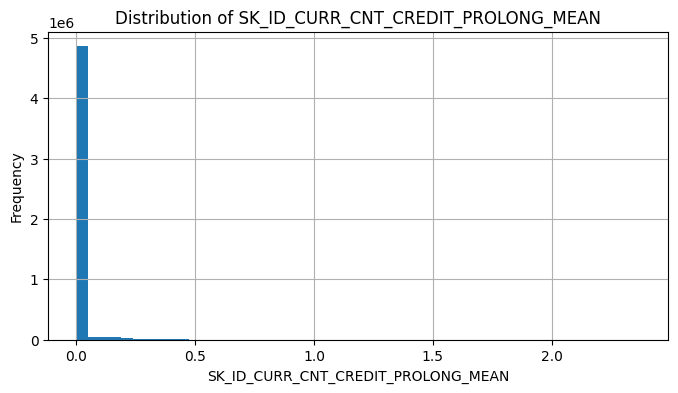

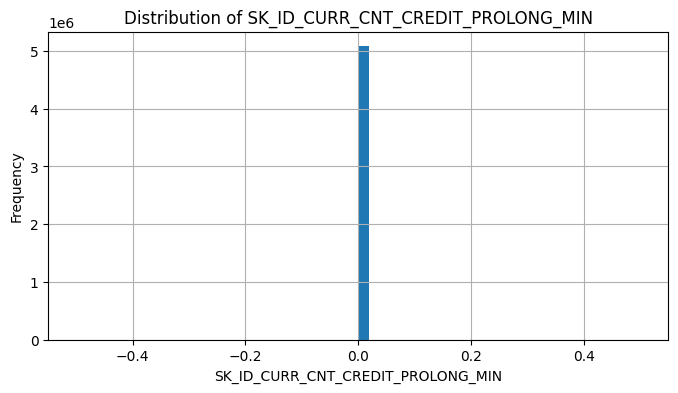

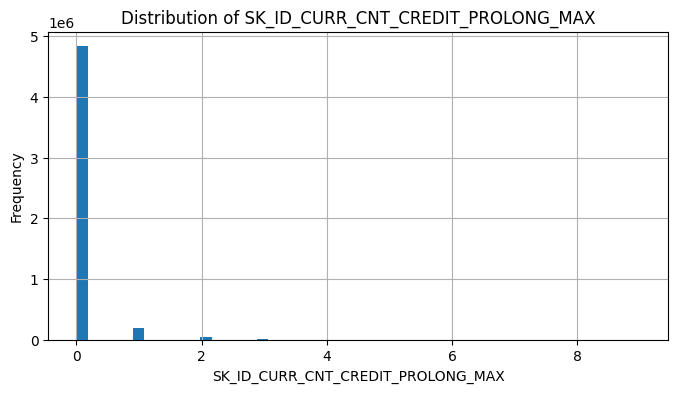

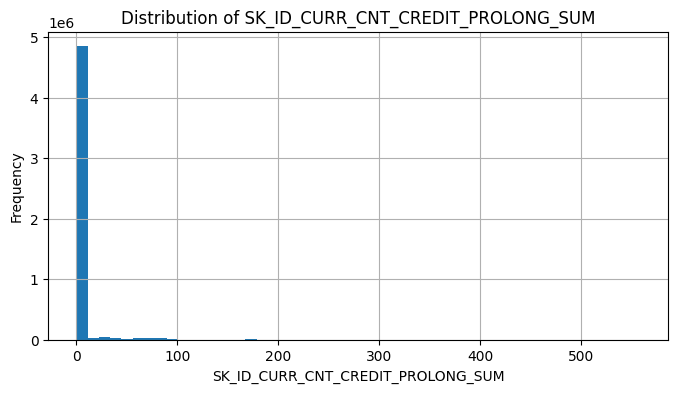

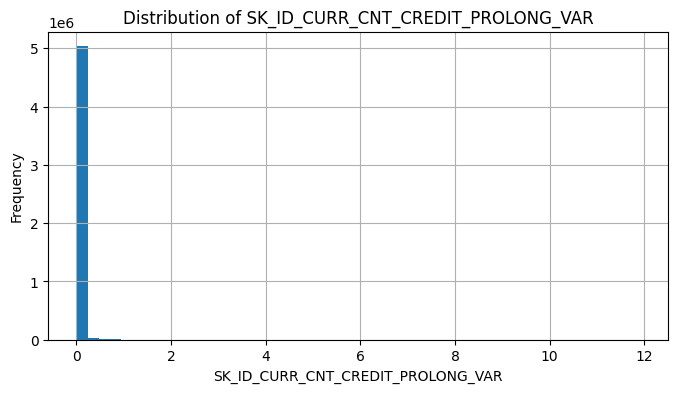

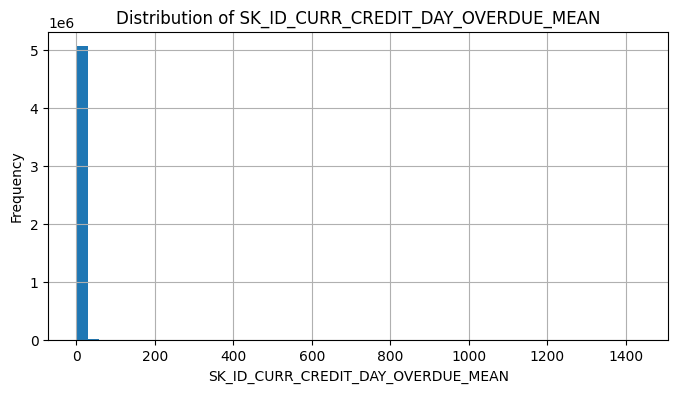

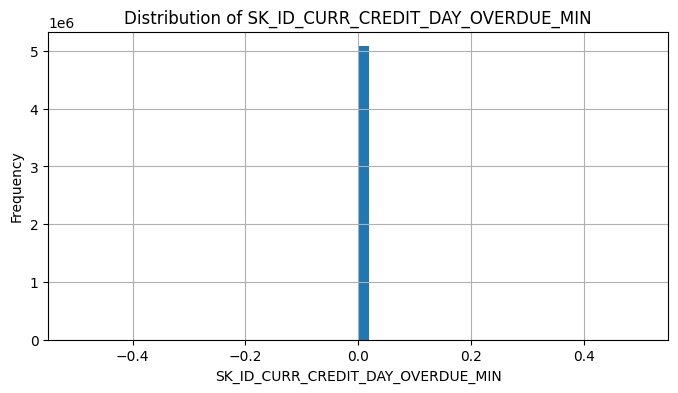

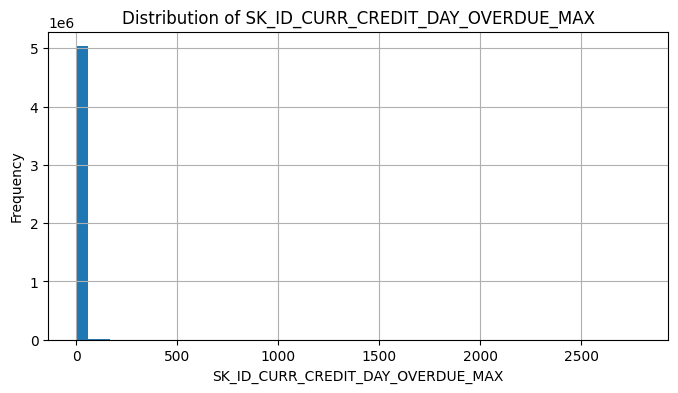

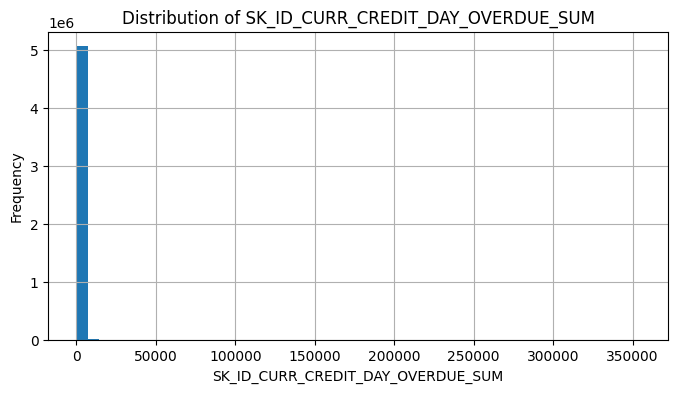

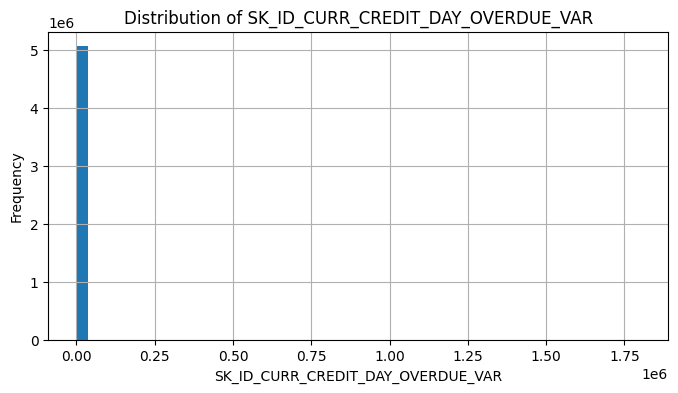

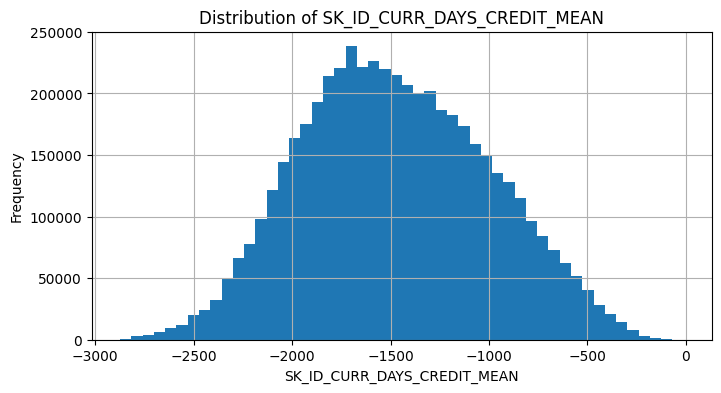

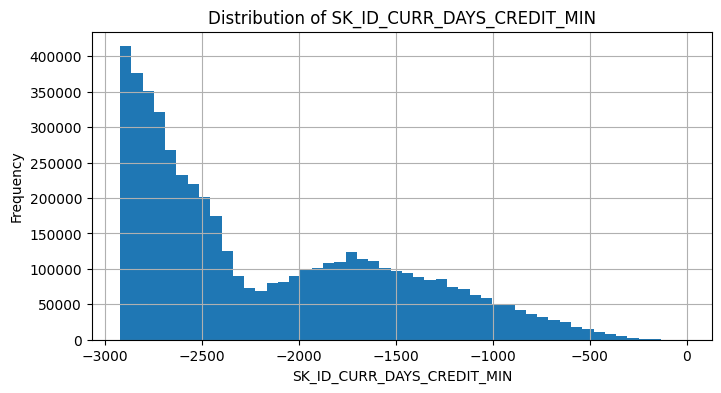

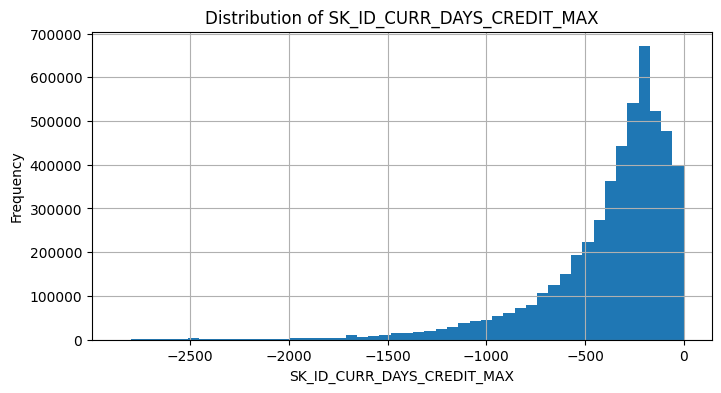

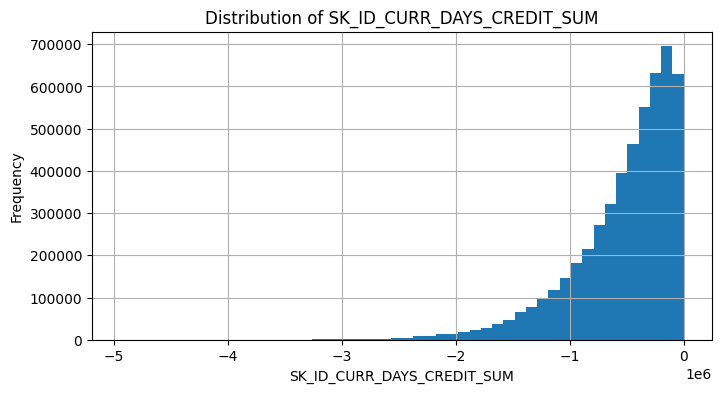

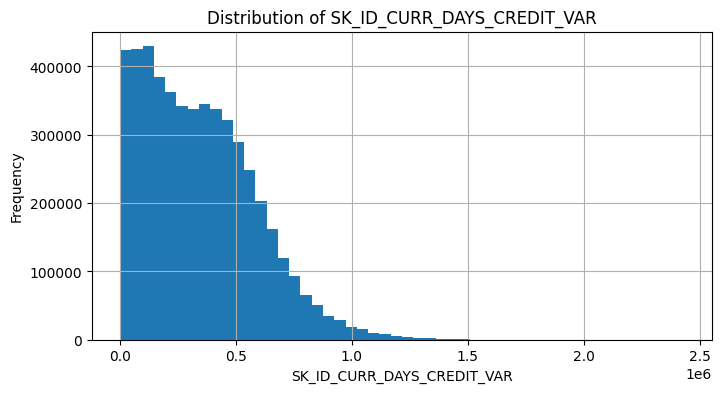

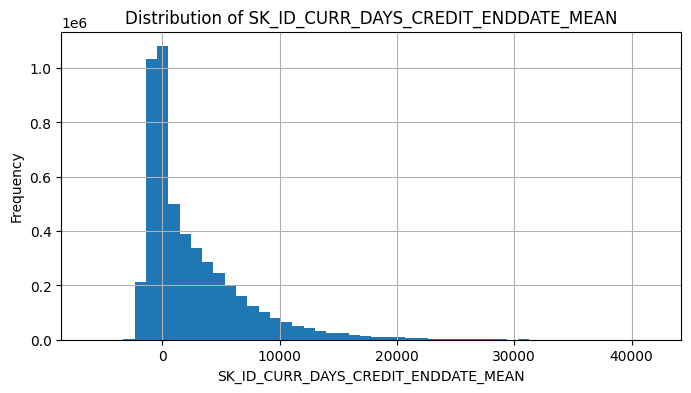

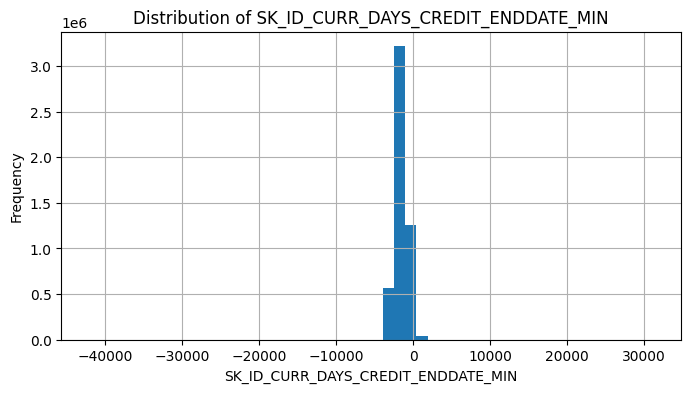

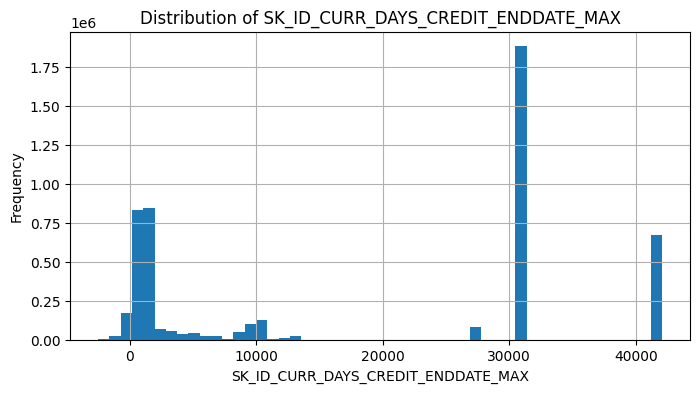

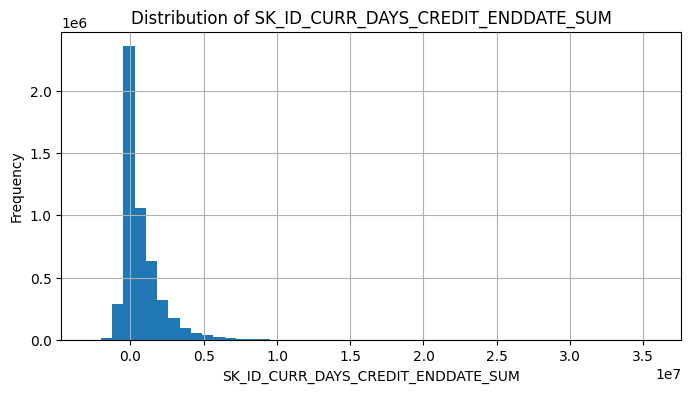

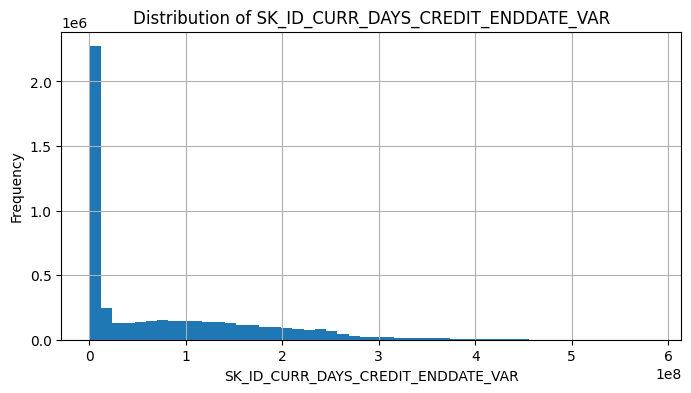

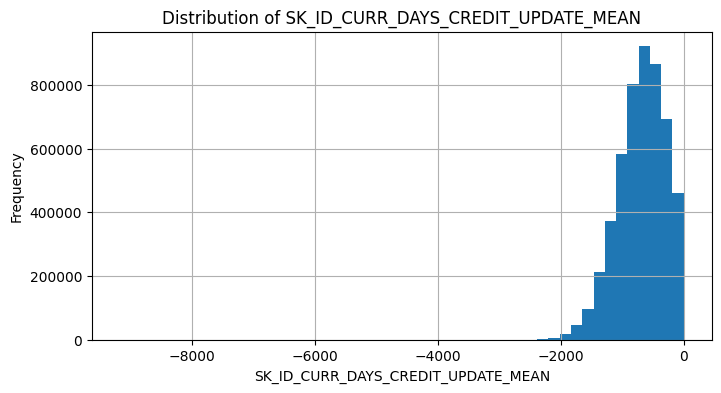

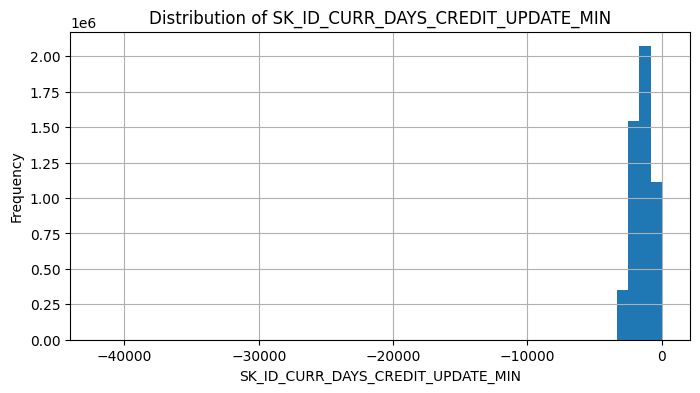

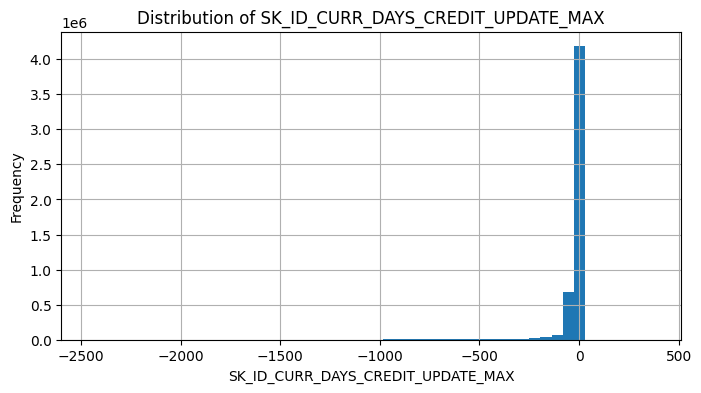

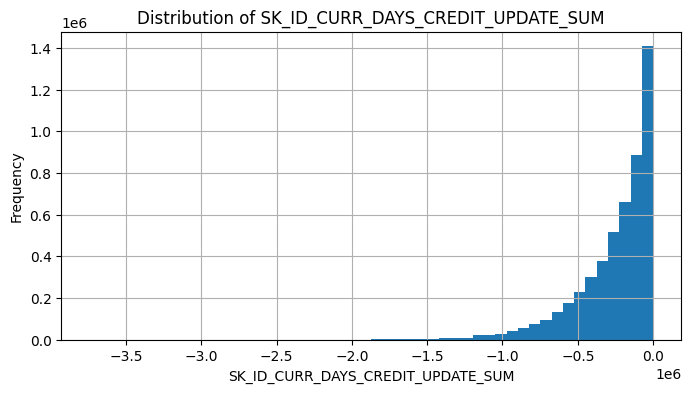

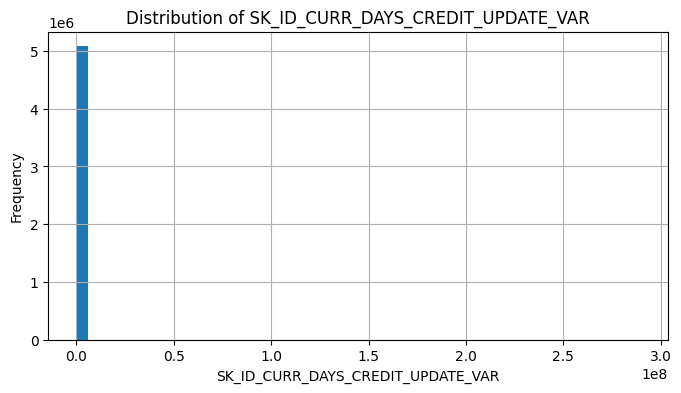

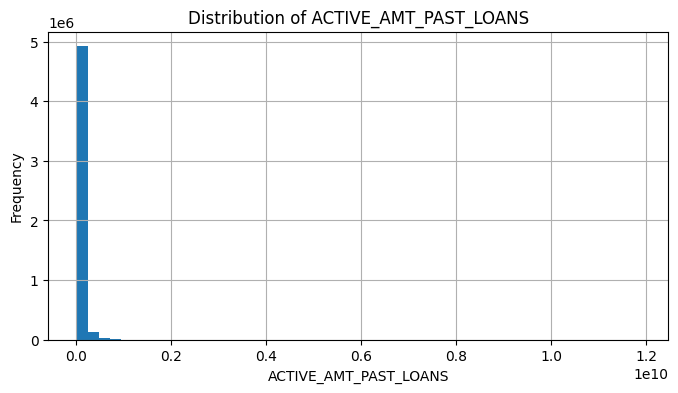

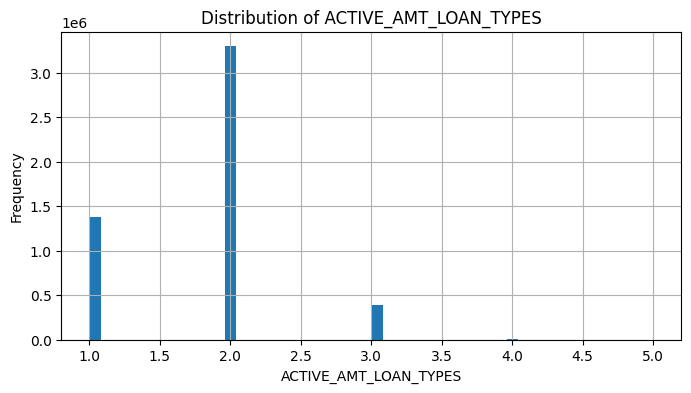

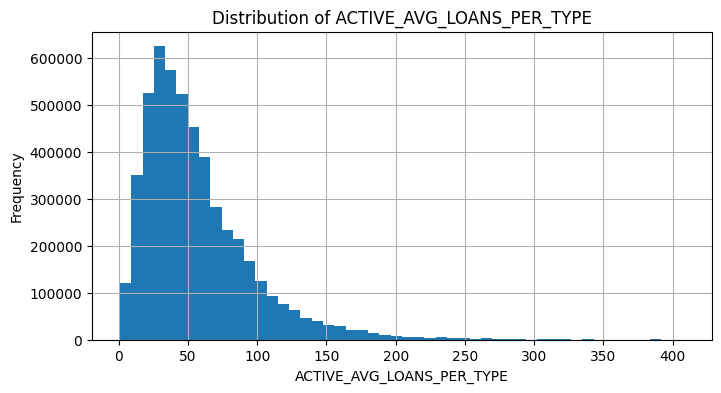

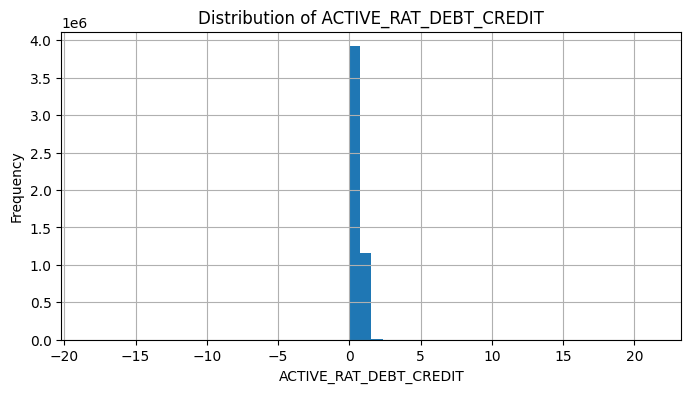

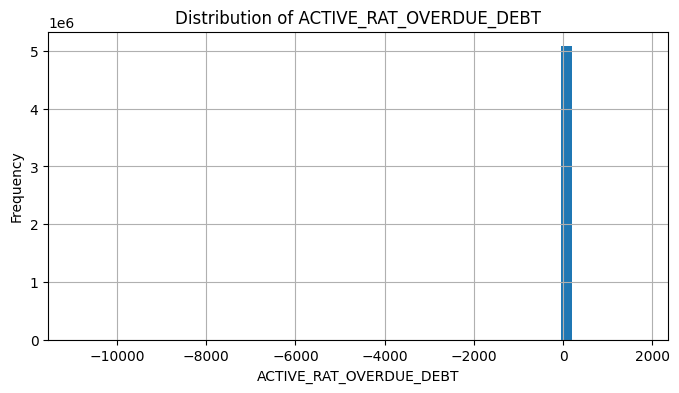

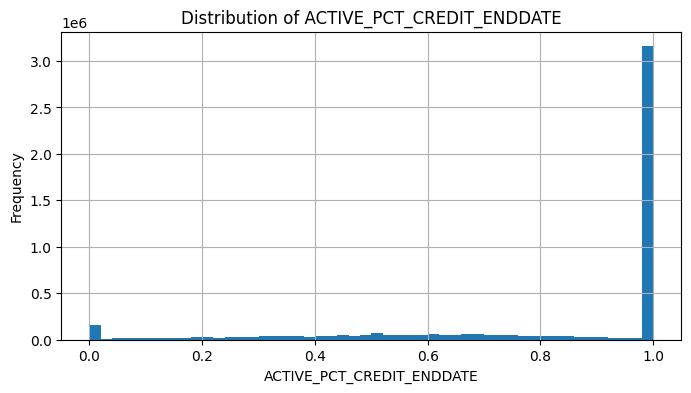

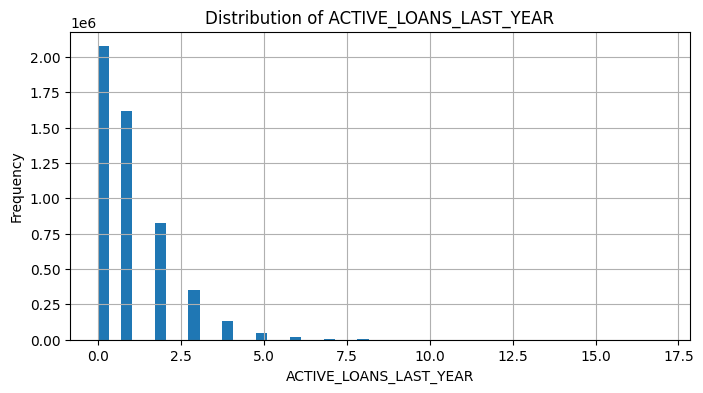

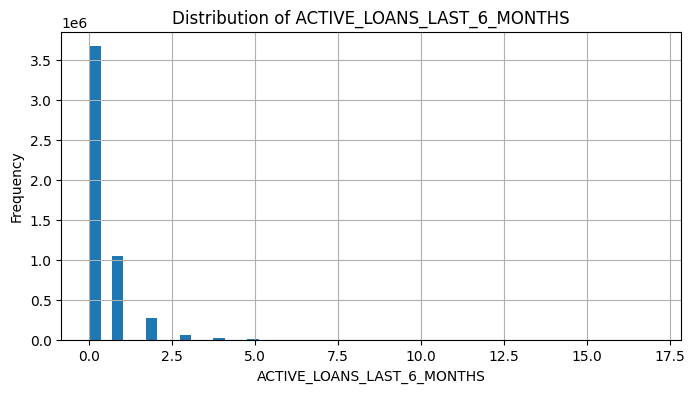

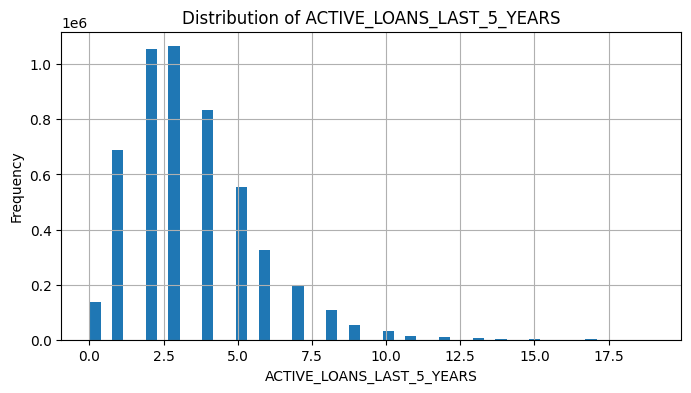

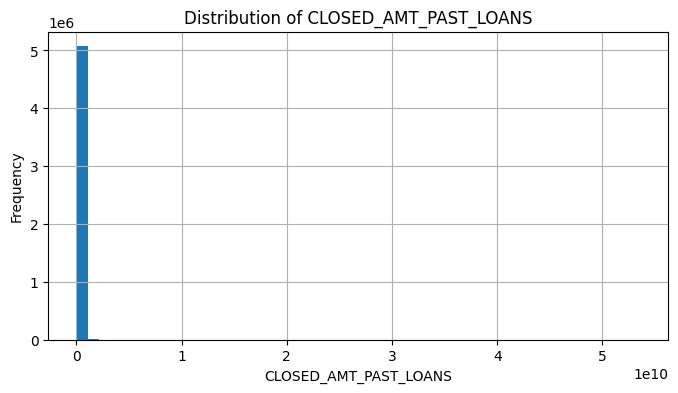

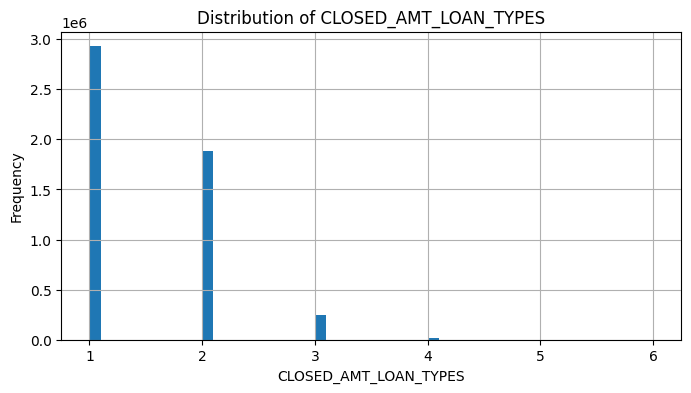

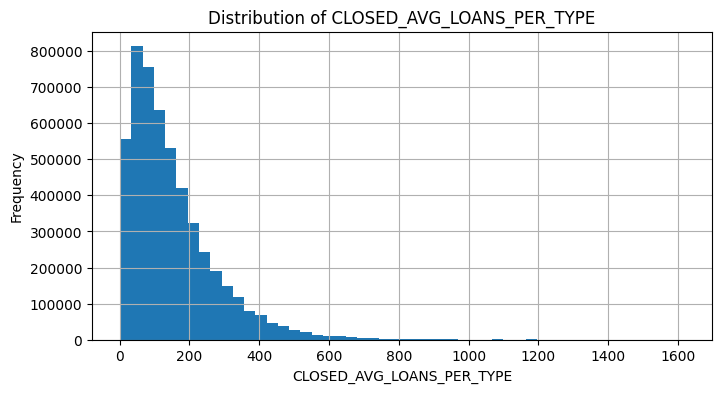

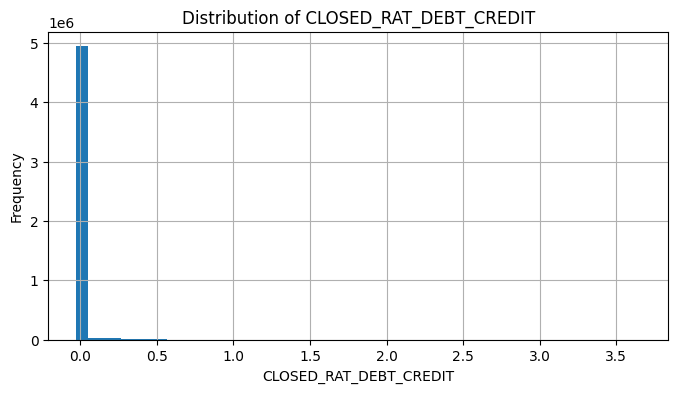

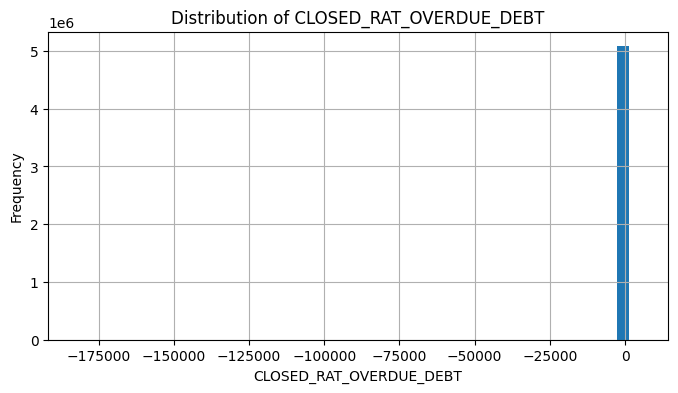

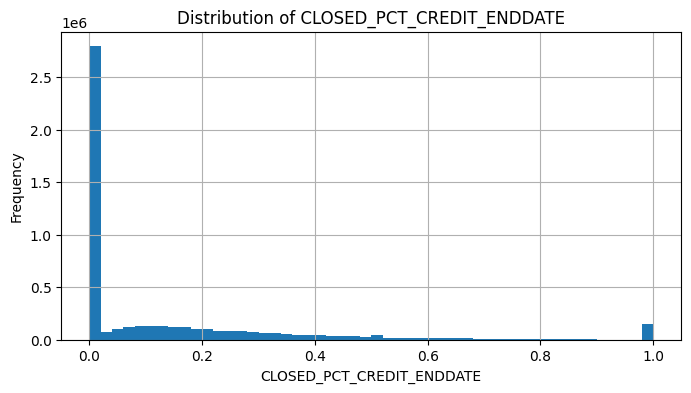

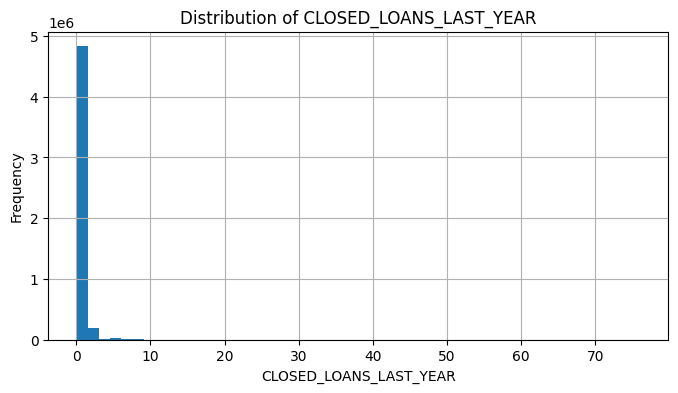

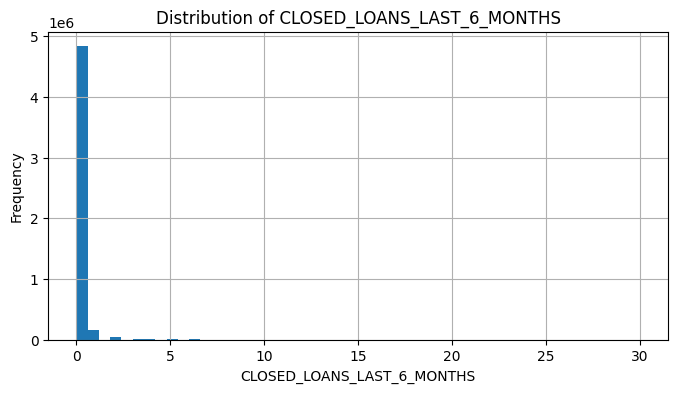

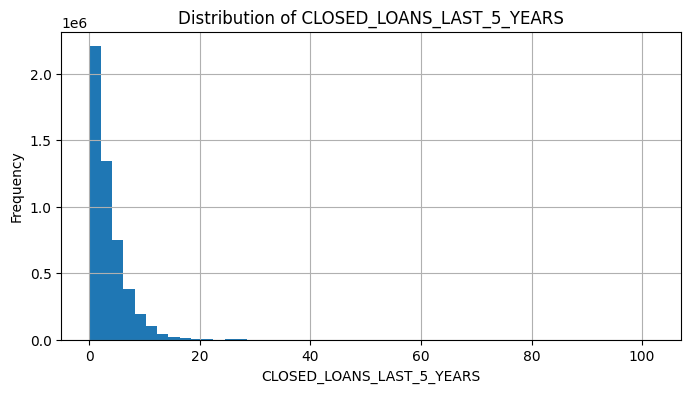

In [66]:
# Distribution of numerical features
numeric_cols = active_loans_with_features.select_dtypes(include=['int', 'float']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    active_loans_with_features[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

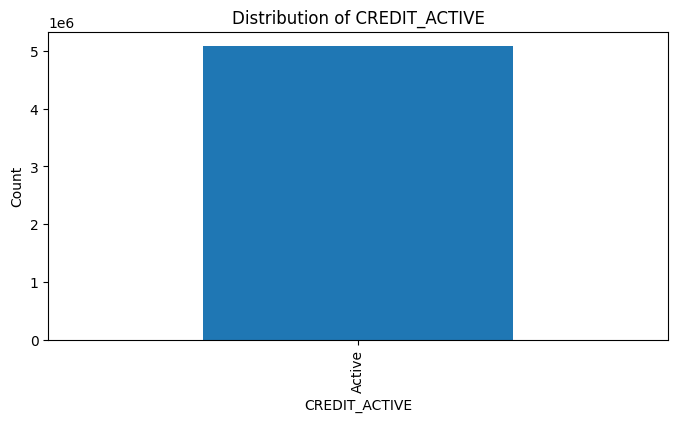

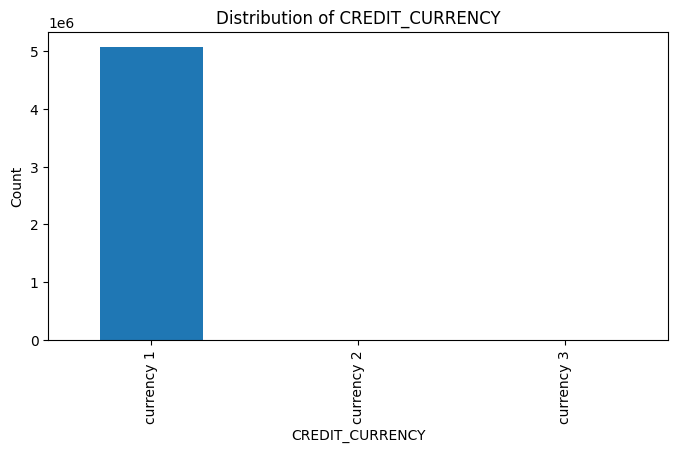

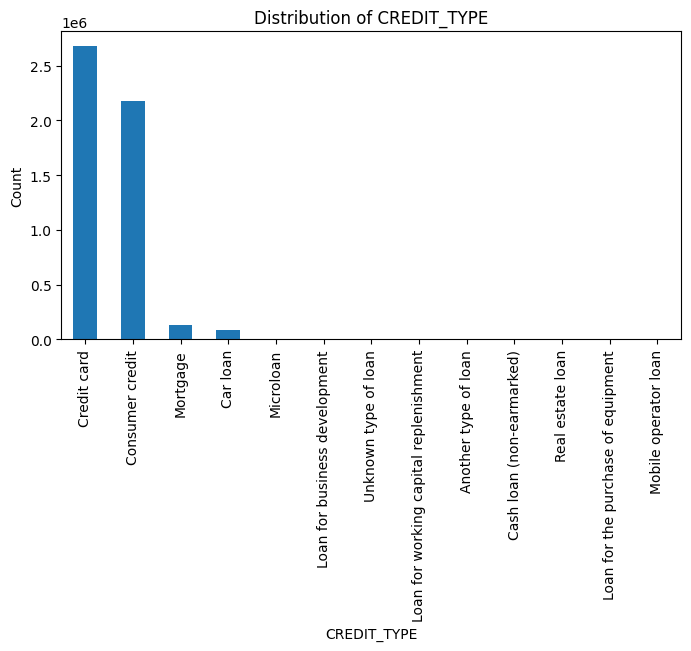

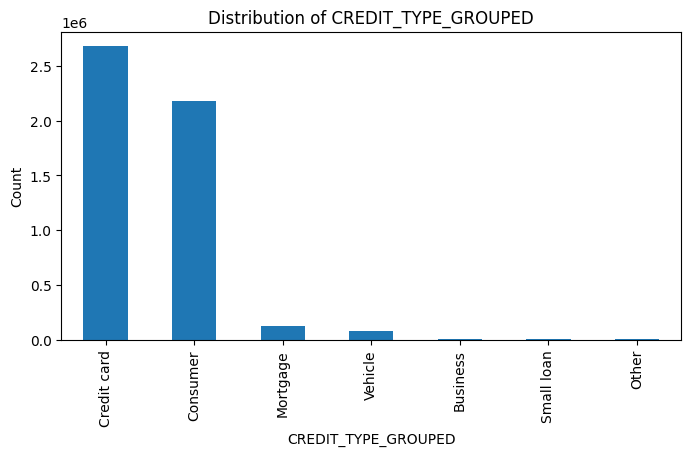

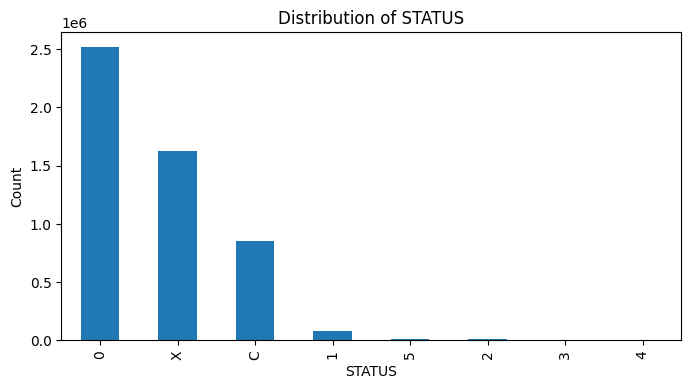

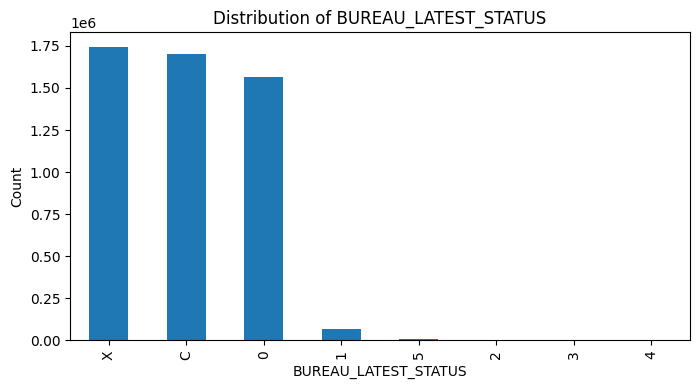

In [67]:
# Distribution of categorical features

categorical_cols = active_loans_with_features.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    active_loans_with_features[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [68]:
# Drop the CREDIT_TYPE column
active_loans_with_features.drop(columns=['CREDIT_TYPE'], inplace=True)

In [69]:
# Drop the CREDIT_ACTIVE column
active_loans_with_features.drop(columns=['CREDIT_ACTIVE'], inplace=True)

In [70]:
# Drop SK_ID_CURR_y
active_loans_with_features.drop(columns=['SK_ID_CURR_y'], inplace=True)

In [71]:
# Save dataframe
active_loans_with_features.to_csv(os.path.join(data_dir, 'active_loans_with_features.csv'), index=False)

In [72]:
# Clear dataframe from memory
del active_loans_with_features

### Data Preprocessing and Feature Engineering `installments_payments.csv`, `credit_card_balance.csv`, `POS_CASH_balance.csv`

Column descriptions:

**`installments_payments.csv`**

| Column Name              | Description                                                                                      |
| ------------------------ | ------------------------------------------------------------------------------------------------ |
| SK\_ID\_PREV             | ID of previous credit in Home credit related to loan in our sample. (One loan can have multiple) |
| SK\_ID\_CURR             | ID of loan in our sample                                                                         |
| NUM\_INSTALMENT\_VERSION | Version of installment calendar (0 is for credit card) of previous credit                        |
| NUM\_INSTALMENT\_NUMBER  | On which installment we observe payment                                                          |
| DAYS\_INSTALMENT         | When the installment was supposed to be paid (relative to application date of current loan)      |
| DAYS\_ENTRY\_PAYMENT     | When the installment was actually paid (relative to application date of current loan)            |
| AMT\_INSTALMENT          | Prescribed installment amount of previous credit                                                 |
| AMT\_PAYMENT             | What the client actually paid on previous credit on this installment                             |

**`credit_card_balance.csv`**

| Column Name                   | Description                                                                                    |
| ----------------------------- | ---------------------------------------------------------------------------------------------- |
| SK\_ID\_PREV                  | ID of previous credit in Home credit related to loan in our sample (can have multiple credits) |
| SK\_ID\_CURR                  | ID of loan in our sample                                                                       |
| MONTHS\_BALANCE               | Month of balance relative to application date (-1 is freshest balance)                         |
| AMT\_BALANCE                  | Balance during the month of previous credit                                                    |
| AMT\_CREDIT\_LIMIT\_ACTUAL    | Credit card limit during the month of the previous credit                                      |
| AMT\_DRAWINGS\_ATM\_CURRENT   | Amount drawing at ATM during the month of the previous credit                                  |
| AMT\_DRAWINGS\_CURRENT        | Amount drawing during the month of the previous credit                                         |
| AMT\_DRAWINGS\_OTHER\_CURRENT | Amount of other drawings during the month of the previous credit                               |
| AMT\_DRAWINGS\_POS\_CURRENT   | Amount drawing or buying goods during the month of the previous credit                         |
| AMT\_INST\_MIN\_REGULARITY    | Minimal installment for this month of the previous credit                                      |
| AMT\_PAYMENT\_CURRENT         | How much did the client pay during the month on the previous credit                            |
| AMT\_PAYMENT\_TOTAL\_CURRENT  | How much did the client pay during the month in total on the previous credit                   |
| AMT\_RECEIVABLE\_PRINCIPAL    | Amount receivable for principal on the previous credit                                         |
| AMT\_RECIVABLE                | Amount receivable on the previous credit                                                       |
| AMT\_TOTAL\_RECEIVABLE        | Total amount receivable on the previous credit                                                 |
| CNT\_DRAWINGS\_ATM\_CURRENT   | Number of drawings at ATM during this month on the previous credit                             |
| CNT\_DRAWINGS\_CURRENT        | Number of drawings during this month on the previous credit                                    |
| CNT\_DRAWINGS\_OTHER\_CURRENT | Number of other drawings during this month on the previous credit                              |
| CNT\_DRAWINGS\_POS\_CURRENT   | Number of drawings for goods during this month on the previous credit                          |
| CNT\_INSTALMENT\_MATURE\_CUM  | Number of paid installments on the previous credit                                             |
| NAME\_CONTRACT\_STATUS        | Contract status (active signed,...) on the previous credit                                     |
| SK\_DPD                       | DPD (Days past due) during the month on the previous credit                                    |
| SK\_DPD\_DEF                  | DPD (Days past due) during the month with tolerance of the previous credit                     |


**`POS_CASH_balance.csv`**

| File Name            | Column Name            | Description |
|----------------------|------------------------|-------------|
| POS_CASH_balance.csv | SK_ID_PREV             | "ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)" |
| POS_CASH_balance.csv | SK_ID_CURR             | ID of loan in our sample |
| POS_CASH_balance.csv | MONTHS_BALANCE         | "Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )", time only relative to the application |
| POS_CASH_balance.csv | CNT_INSTALMENT         | Term of previous credit (can change over time) |
| POS_CASH_balance.csv | CNT_INSTALMENT_FUTURE  | Installments left to pay on the previous credit |
| POS_CASH_balance.csv | NAME_CONTRACT_STATUS   | Contract status during the month |
| POS_CASH_balance.csv | SK_DPD                 | DPD (days past due) during the month of previous credit |
| POS_CASH_balance.csv | SK_DPD_DEF             | DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit |

### EDA for `installments_payments.csv`

=== installments_payments EDA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None
         SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07            1.360540e+07   
mean   1.903365e+06  2.784449e+05            8.566373e-01   
std    5.362029e+05  1.027183e+05            1.035216e+00   
min    1.000001e+06  1.000010e+05            0.000000e+00   
25%    1.434191e+06  1.896390e+05            0.000000e+00   
50%    1.896520e+06  2.786850e+05            1.000000e+00  

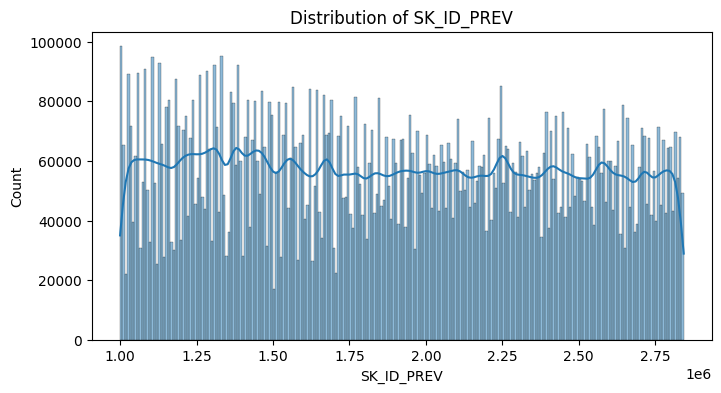

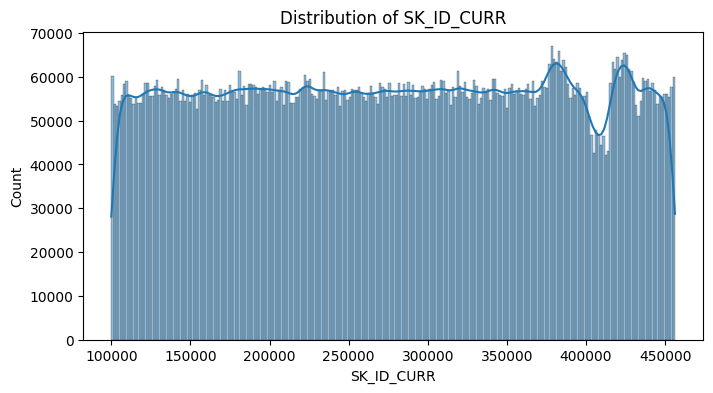

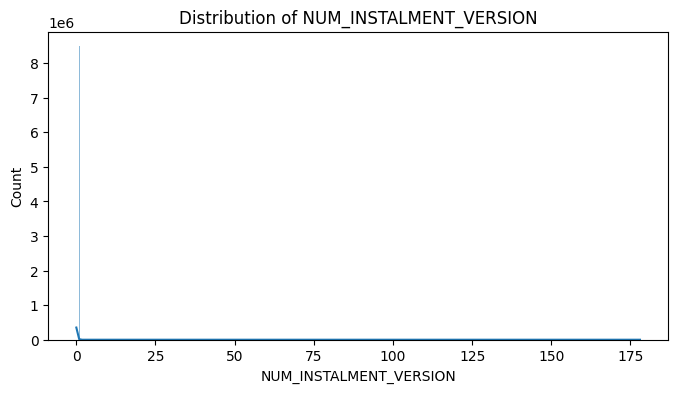

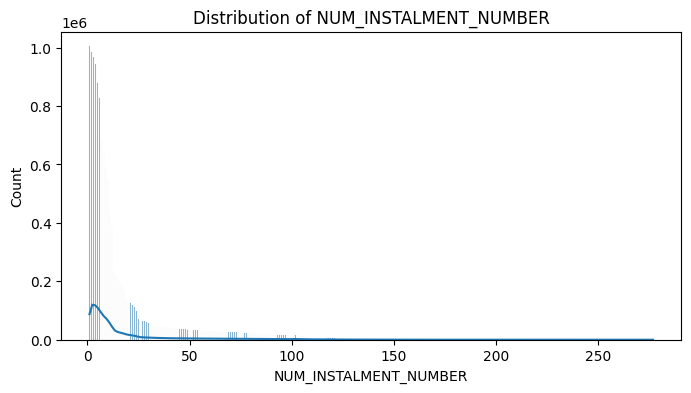

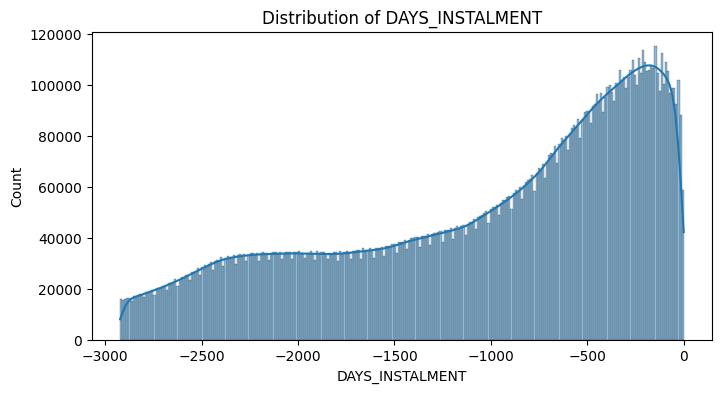

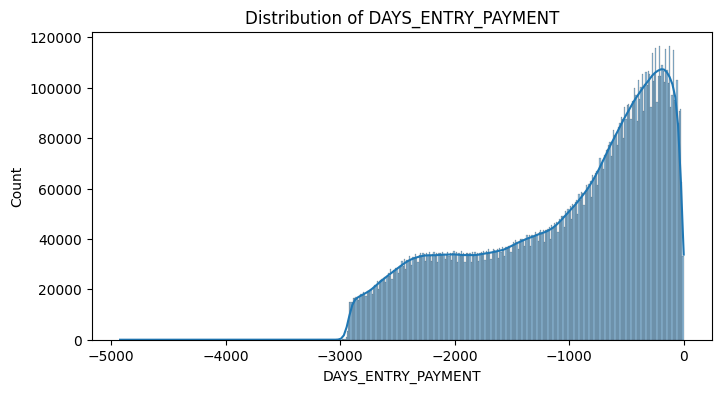

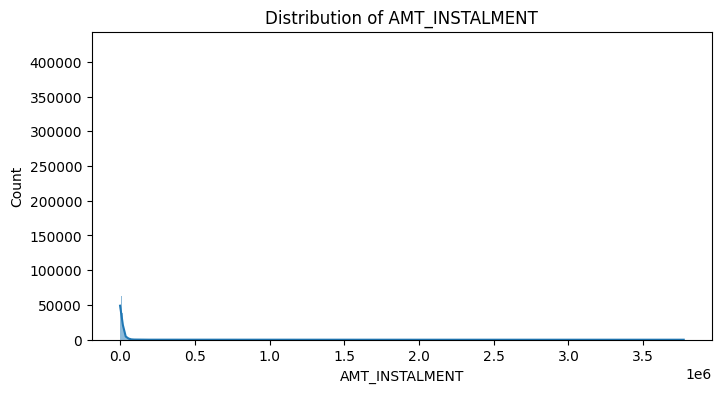

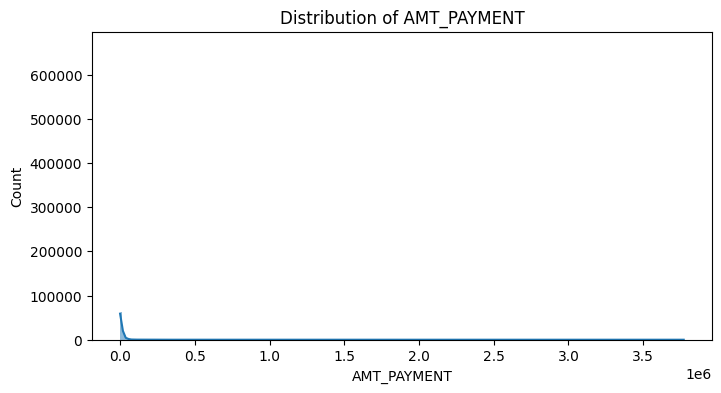

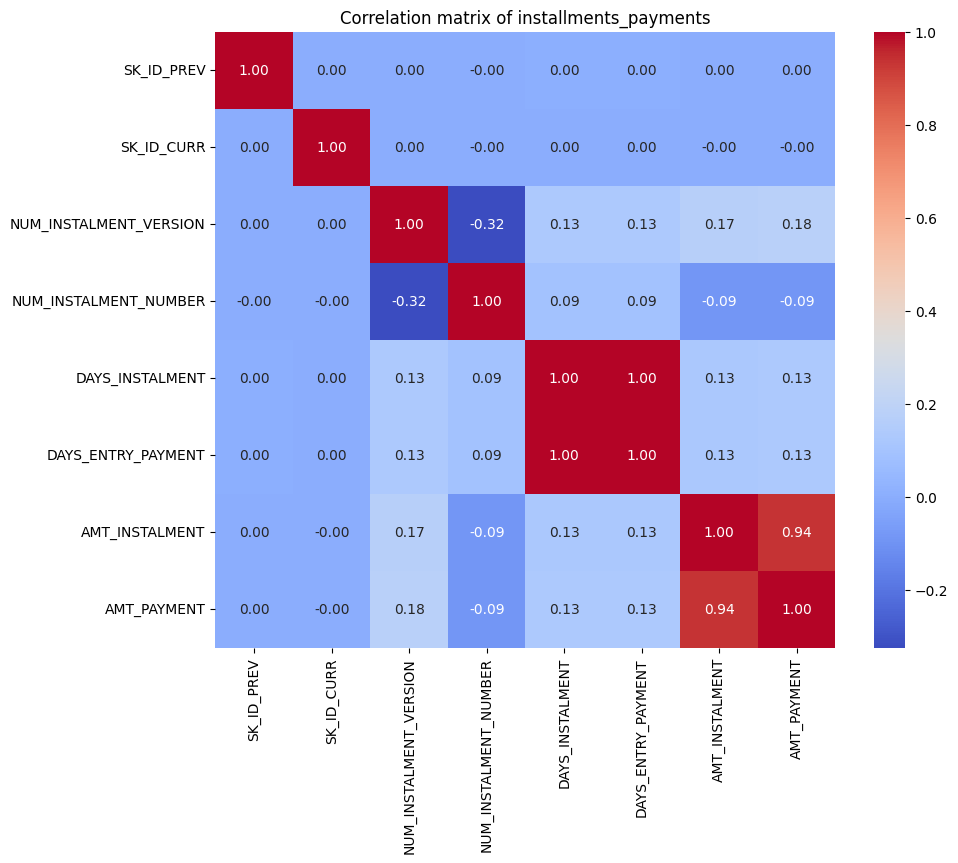

In [73]:
installments_payments = pd.read_csv(os.path.join(data_dir, 'installments_payments.csv'))

print("=== installments_payments EDA ===")

# Basic info
print(installments_payments.info())
print(installments_payments.describe())

# Missing values
print("\nMissing Values:")
print(installments_payments.isnull().sum())

# Distribution of numeric features
numeric_cols = installments_payments.select_dtypes(include=['int', 'float']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(installments_payments[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Distribution of categorical features
categorical_cols = installments_payments.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    installments_payments[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(installments_payments[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix of installments_payments')
plt.show()

### EDA for `credit_card_balance.csv`

=== credit_card_balance EDA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    fl

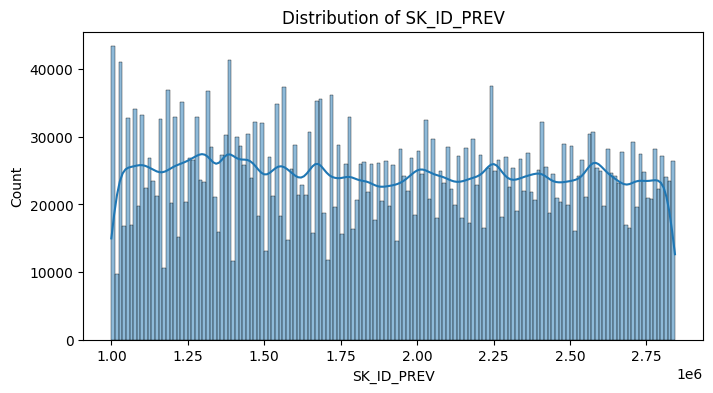

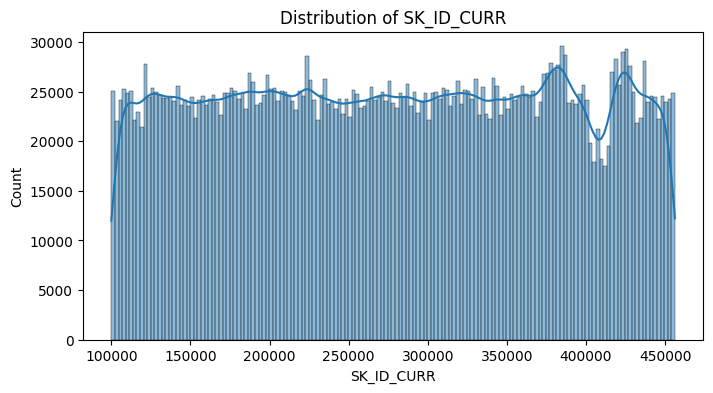

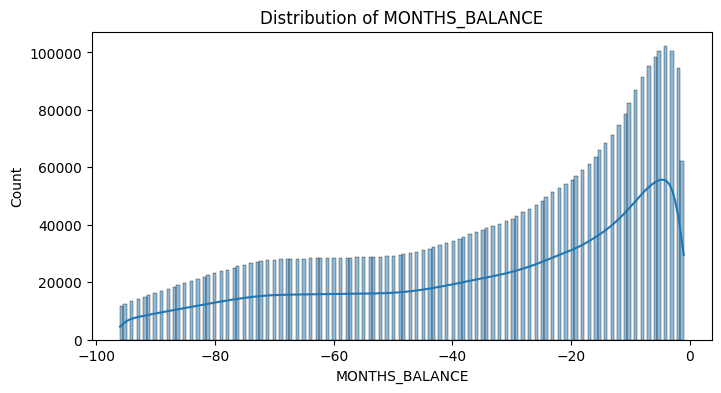

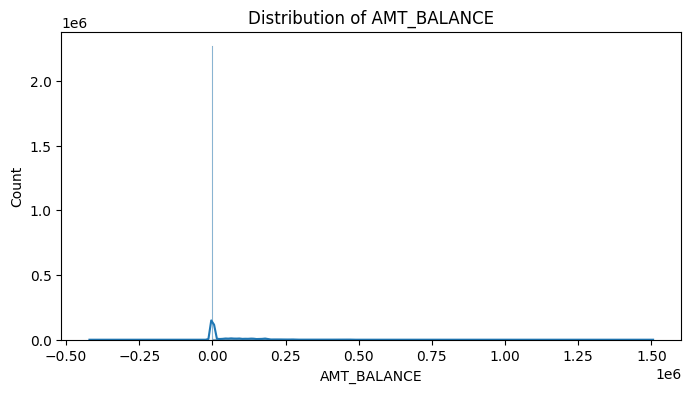

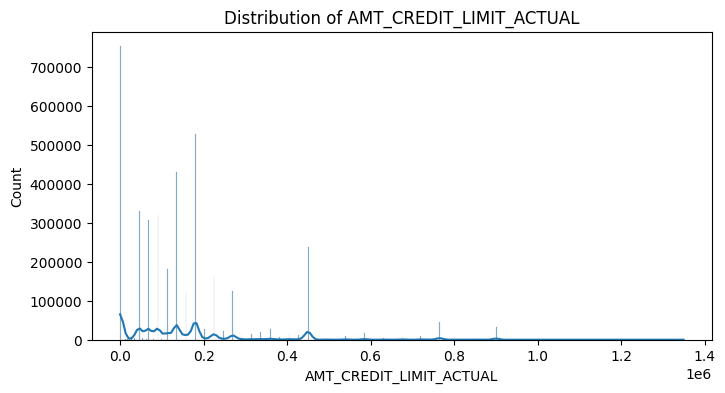

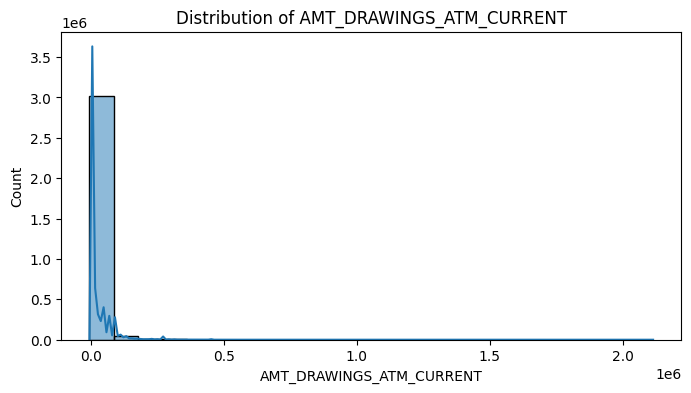

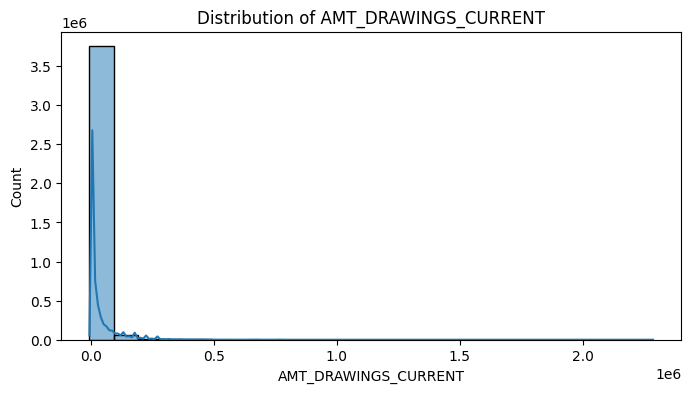

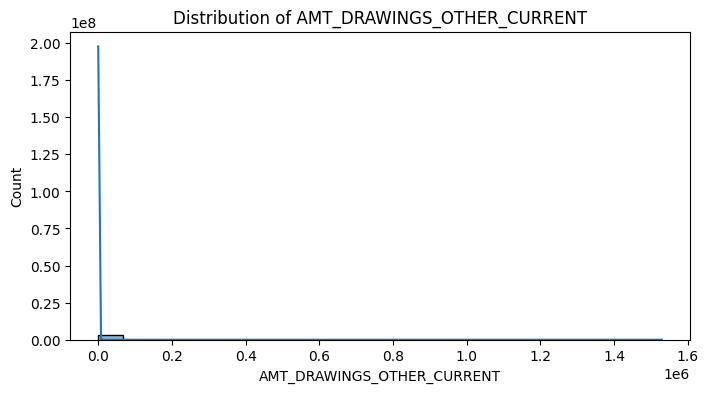

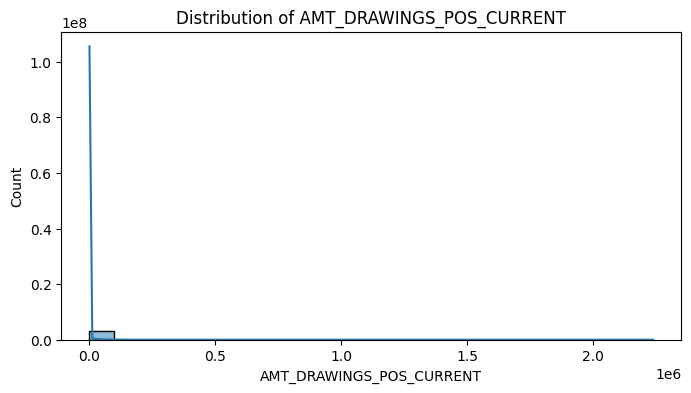

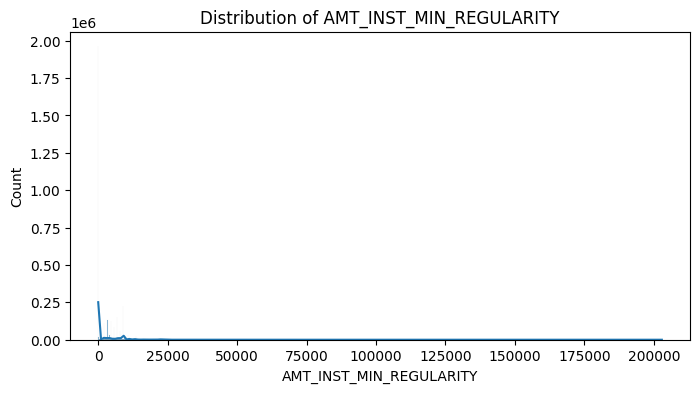

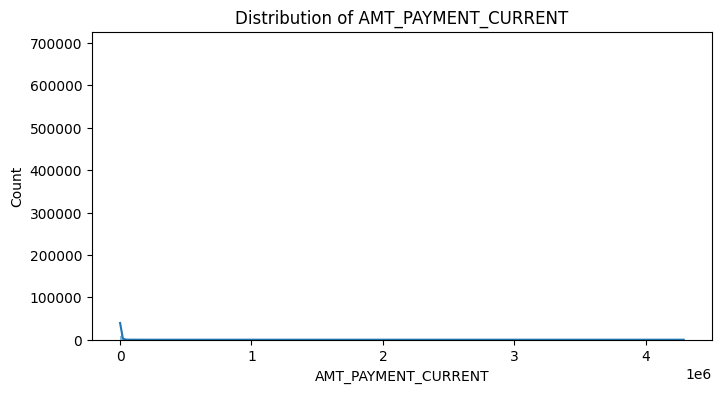

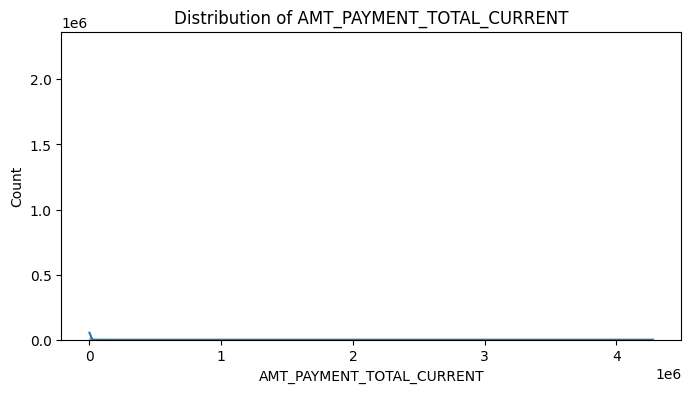

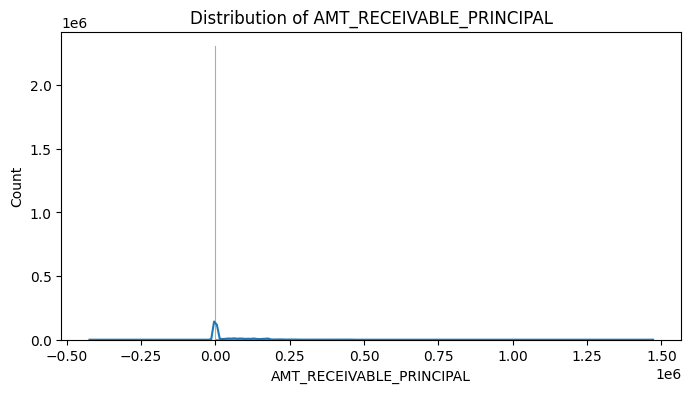

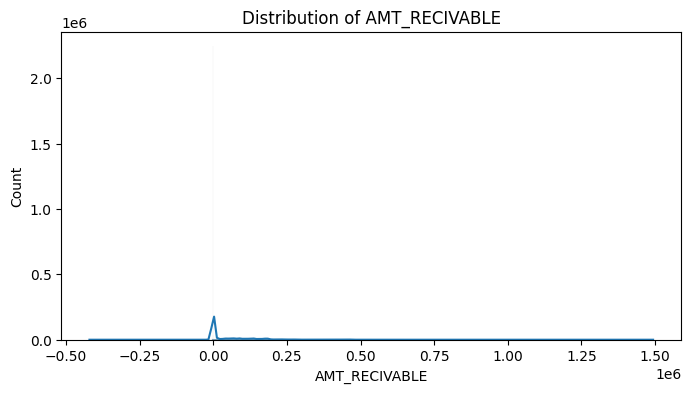

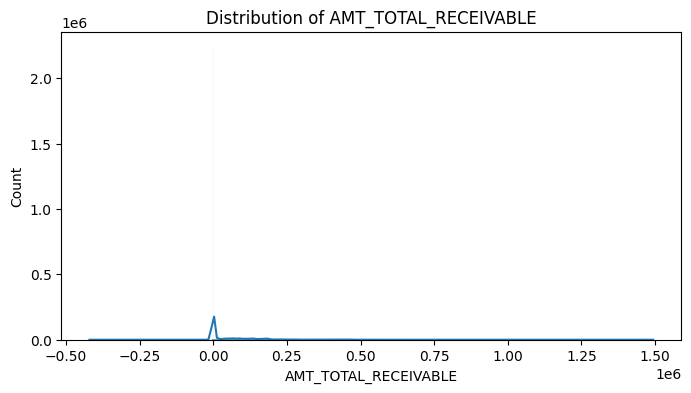

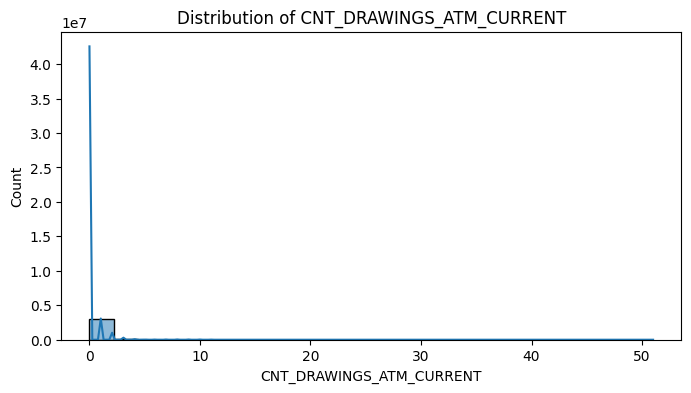

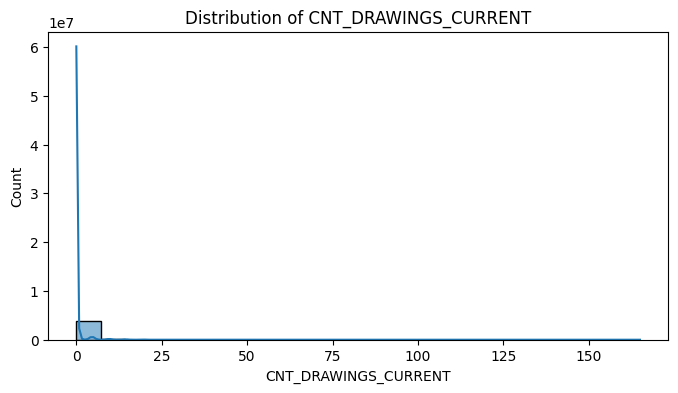

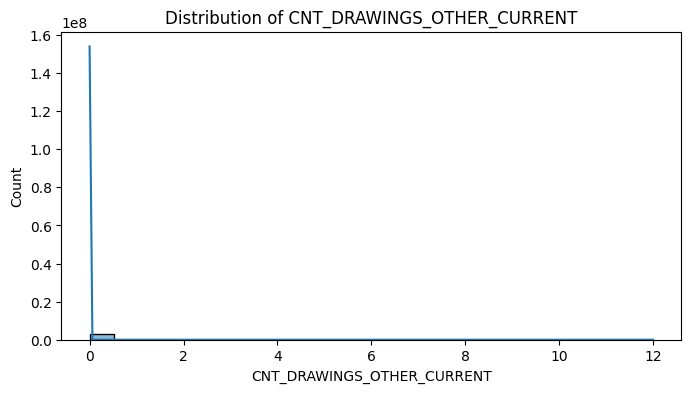

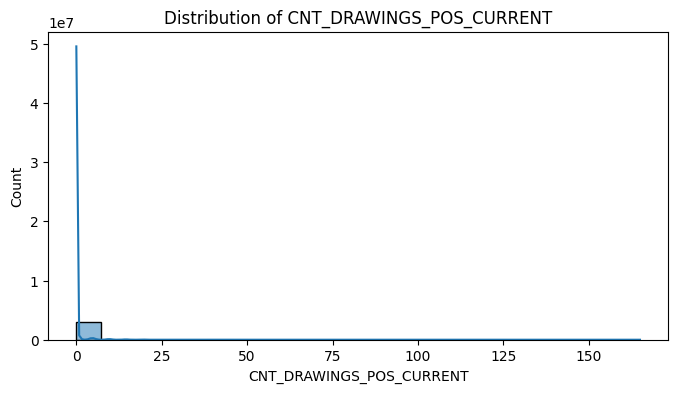

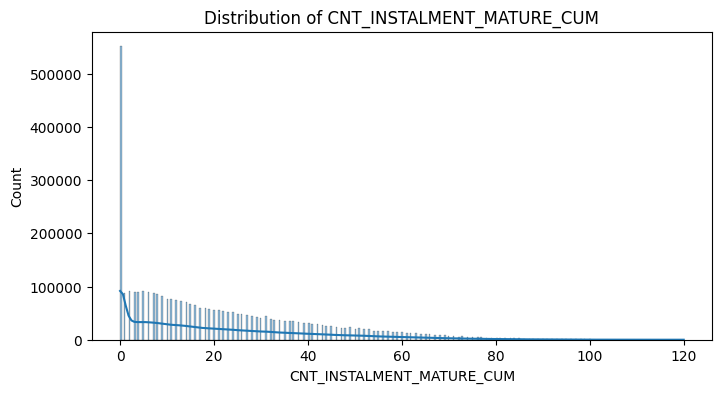

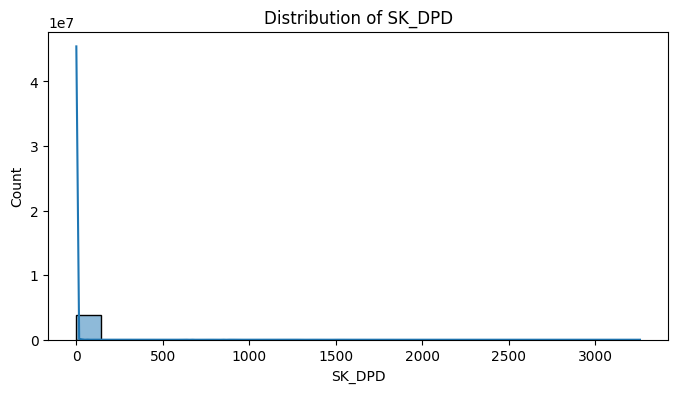

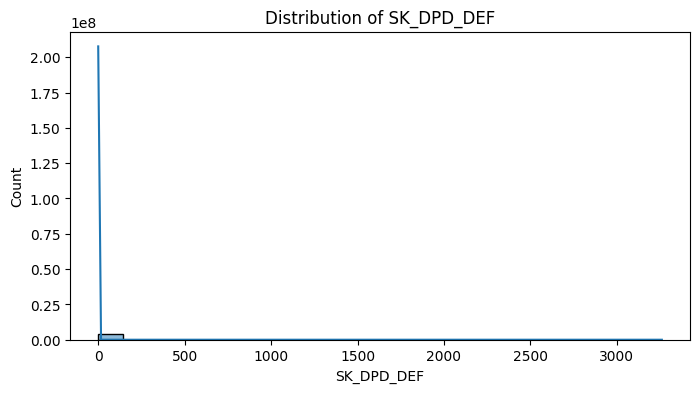

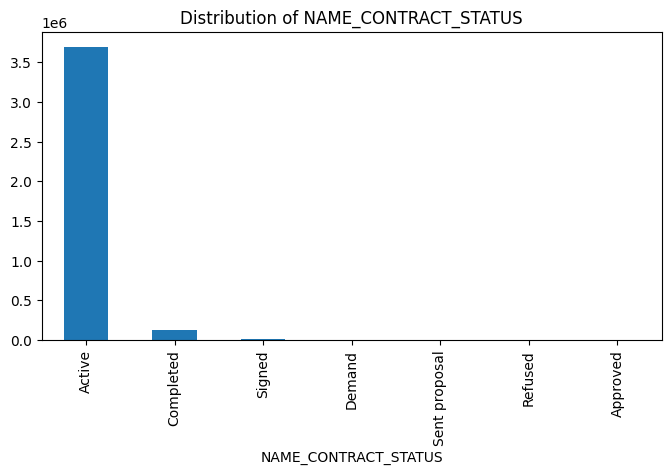

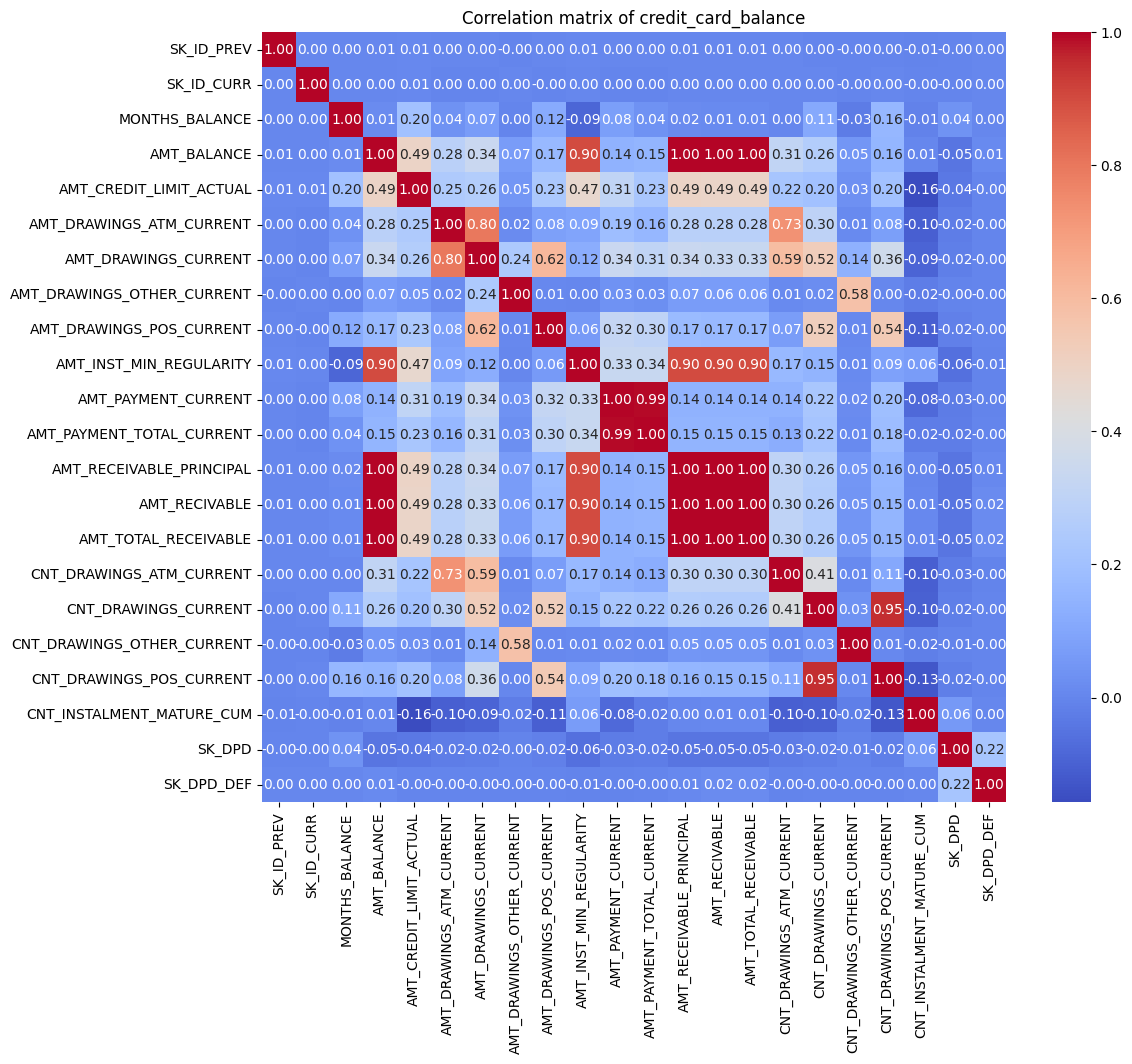

In [74]:
credit_card_balance = pd.read_csv(os.path.join(data_dir, 'credit_card_balance.csv'))

print("=== credit_card_balance EDA ===")

# Basic info
print(credit_card_balance.info())
print(credit_card_balance.describe())

# Missing values
print("\nMissing Values:")
print(credit_card_balance.isnull().sum())

# Distribution of numeric features
numeric_cols = credit_card_balance.select_dtypes(include=['int', 'float']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(credit_card_balance[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Distribution of categorical features
categorical_cols = credit_card_balance.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    credit_card_balance[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlations
plt.figure(figsize=(12, 10))
sns.heatmap(credit_card_balance[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix of credit_card_balance')
plt.show()

### EDA for `POS_CASH_balance.csv`



Shape of the data: (10001358, 8)

Column names: ['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF']

Data types:
 SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                     int64
SK_DPD_DEF                 int64
dtype: object

Missing values (%):
 CNT_INSTALMENT_FUTURE    0.260835
CNT_INSTALMENT           0.260675
dtype: float64

Unique values per column:
 SK_ID_PREV               936325
SK_ID_CURR               337252
MONTHS_BALANCE               96
CNT_INSTALMENT               73
CNT_INSTALMENT_FUTURE        79
NAME_CONTRACT_STATUS          9
SK_DPD                     3400
SK_DPD_DEF                 2307
dtype: int64

Contract Status Counts:
 NAME_CONTRACT_STATUS
Active                   9151119
Completed                 744883
Signed 

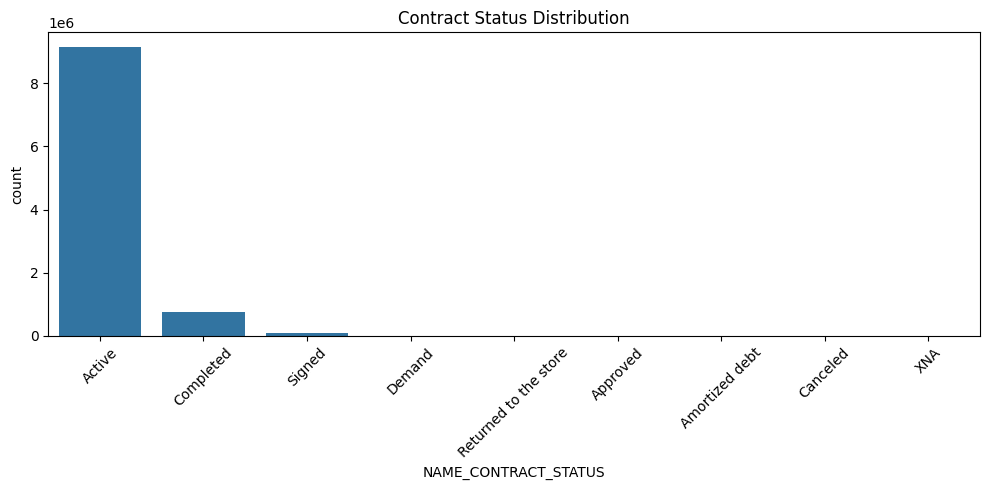

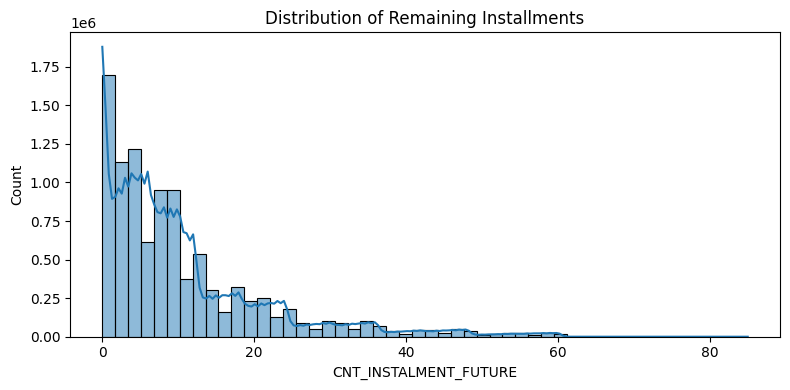

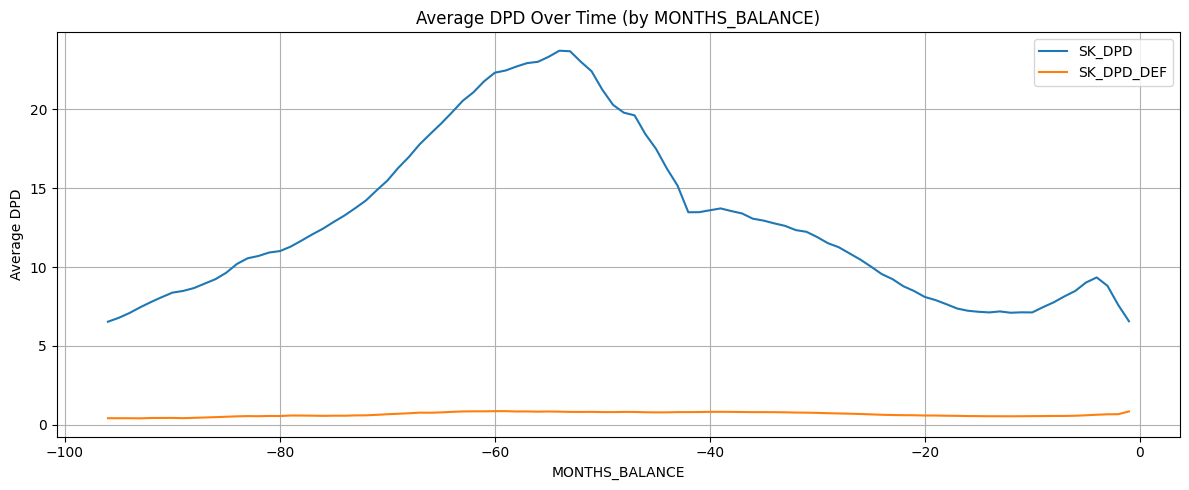

In [76]:
# Load data
df_pos = pd.read_csv(os.path.join(data_dir,'POS_CASH_balance.csv'))

# Basic info
print("Shape of the data:", df_pos.shape)
print("\nColumn names:", df_pos.columns.tolist())
print("\nData types:\n", df_pos.dtypes)

# Missing values
missing = df_pos.isnull().mean().sort_values(ascending=False) * 100
print("\nMissing values (%):\n", missing[missing > 0])

# Unique values
print("\nUnique values per column:\n", df_pos.nunique())

# Distribution of contract status
print("\nContract Status Counts:\n", df_pos['NAME_CONTRACT_STATUS'].value_counts())

# DPD (Days Past Due) Summary
print("\nDPD Summary:\n", df_pos[['SK_DPD', 'SK_DPD_DEF']].describe())

# Plot: Contract Status Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df_pos, x='NAME_CONTRACT_STATUS', order=df_pos['NAME_CONTRACT_STATUS'].value_counts().index)
plt.title('Contract Status Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot: Distribution of Installments Left
plt.figure(figsize=(8, 4))
sns.histplot(df_pos['CNT_INSTALMENT_FUTURE'].dropna(), bins=50, kde=True)
plt.title('Distribution of Remaining Installments')
plt.xlabel('CNT_INSTALMENT_FUTURE')
plt.tight_layout()
plt.show()

# Plot: Average DPD over Months
avg_dpd = df_pos.groupby('MONTHS_BALANCE')[['SK_DPD', 'SK_DPD_DEF']].mean()
avg_dpd.plot(title='Average DPD Over Time (by MONTHS_BALANCE)', figsize=(12, 5))
plt.xlabel('MONTHS_BALANCE')
plt.ylabel('Average DPD')
plt.grid(True)
plt.tight_layout()
plt.show()

### Feature Engineering: Aggregating `POS_CASH_balance` per customer

| Feature name                  | Description                                                                             |
| ----------------------------- | --------------------------------------------------------------------------------------- |
| `NUM_POS_LOANS`               | Number of unique POS loans (`SK_ID_PREV` count) per customer                            |
| `TOTAL_CNT_INSTALMENT`        | Total planned installments summed across all POS loans                                  |
| `TOTAL_CNT_INSTALMENT_FUTURE` | Total remaining installments summed across all POS loans                                |
| `MIN_MONTHS_BALANCE_POS`      | Earliest month of POS balance data available for the customer (i.e., length of history) |


In [81]:
# Aggregate POS_CASH_balance per customer
pos_cash_agg = df_pos.groupby('SK_ID_CURR').agg({
    'SK_ID_PREV': 'nunique',                    # Number of POS loans
    'CNT_INSTALMENT': 'sum',                    # Total planned installments
    'CNT_INSTALMENT_FUTURE': 'sum',             # Remaining installments
    'MONTHS_BALANCE': 'min'                     # Longest history (oldest loan in months)
}).rename(columns={
    'SK_ID_PREV': 'NUM_POS_LOANS',
    'CNT_INSTALMENT': 'TOTAL_CNT_INSTALMENT',
    'CNT_INSTALMENT_FUTURE': 'TOTAL_CNT_INSTALMENT_FUTURE',
    'MONTHS_BALANCE': 'MIN_MONTHS_BALANCE_POS'
}).reset_index()

### Feature Engineering: Aggregating `installments_payments`, `credit_card_balance` per customer

| Feature name           | Description                                                     |
| ---------------------- | --------------------------------------------------------------- |
| `TOTAL_AMT_PAYMENT`    | Total actual payments made across all previous credits          |
| `TOTAL_AMT_INSTALMENT` | Total scheduled installments summed across all previous credits |
| `NUM_INSTALLMENTS`     | Number of unique installment loans (`SK_ID_PREV`) per customer  |


| Feature name       | Description                                                    |
| ------------------ | -------------------------------------------------------------- |
| `TOTAL_CC_PAYMENT` | Total credit card payments made by customer                    |
| `MEAN_CC_BALANCE`  | Average credit card balance                                    |
| `NUM_CREDIT_CARDS` | Number of unique credit cards used (`SK_ID_PREV`) per customer |



In [82]:
# Aggregate installments_payments per customer
instalments_agg = installments_payments.groupby('SK_ID_CURR').agg({
    'AMT_PAYMENT': 'sum',
    'AMT_INSTALMENT': 'sum',
    'SK_ID_PREV': 'nunique'
}).rename(columns={
    'AMT_PAYMENT': 'TOTAL_AMT_PAYMENT',
    'AMT_INSTALMENT': 'TOTAL_AMT_INSTALMENT',
    'SK_ID_PREV': 'NUM_INSTALLMENTS'
}).reset_index()

# Aggregate credit_card_balance per customer
cc_agg = credit_card_balance.groupby('SK_ID_CURR').agg({
    'AMT_PAYMENT_CURRENT': 'sum',
    'AMT_BALANCE': 'mean',
    'SK_ID_PREV': 'nunique'
}).rename(columns={
    'AMT_PAYMENT_CURRENT': 'TOTAL_CC_PAYMENT',
    'AMT_BALANCE': 'MEAN_CC_BALANCE',
    'SK_ID_PREV': 'NUM_CREDIT_CARDS'
}).reset_index()

# Merge on SK_ID_CURR
df_customer_features = pd.merge(instalments_agg, cc_agg, on='SK_ID_CURR', how='outer')

# Fill missing values if any (e.g., some customers have no credit card)
df_customer_features.fillna(0, inplace=True)

print(df_customer_features.head())

   SK_ID_CURR  TOTAL_AMT_PAYMENT  TOTAL_AMT_INSTALMENT  NUM_INSTALLMENTS  \
0      100001          41195.925             41195.925               2.0   
1      100002         219625.695            219625.695               1.0   
2      100003        1618864.650           1618864.650               3.0   
3      100004          21288.465             21288.465               1.0   
4      100005          56161.845             56161.845               1.0   

   TOTAL_CC_PAYMENT  MEAN_CC_BALANCE  NUM_CREDIT_CARDS  
0               0.0              0.0               0.0  
1               0.0              0.0               0.0  
2               0.0              0.0               0.0  
3               0.0              0.0               0.0  
4               0.0              0.0               0.0  


### Feature Engineering: Final Merging and Ratios

| Feature name                      | Description                                                 |
| --------------------------------- | ----------------------------------------------------------- |
| `POS_PAYMENT_RATIO`               | Total installment payments / total POS installments planned |
| `CC_TO_INSTALLMENT_PAYMENT_RATIO` | Total credit card payments / total installment payments     |



In [83]:
# Merge all three dataframes on SK_ID_CURR
df_customer_features = pd.merge(instalments_agg, cc_agg, on='SK_ID_CURR', how='outer')
df_customer_features = pd.merge(df_customer_features, pos_cash_agg, on='SK_ID_CURR', how='outer')

# Fill missing values (some customers might have no POS or CC history)
df_customer_features.fillna(0, inplace=True)

print(df_customer_features.head())

df_customer_features['POS_PAYMENT_RATIO'] = df_customer_features['TOTAL_AMT_PAYMENT'] / (df_customer_features['TOTAL_CNT_INSTALMENT'] + 1)
df_customer_features['CC_TO_INSTALLMENT_PAYMENT_RATIO'] = df_customer_features['TOTAL_CC_PAYMENT'] / (df_customer_features['TOTAL_AMT_PAYMENT'] + 1)

   SK_ID_CURR  TOTAL_AMT_PAYMENT  TOTAL_AMT_INSTALMENT  NUM_INSTALLMENTS  \
0      100001          41195.925             41195.925               2.0   
1      100002         219625.695            219625.695               1.0   
2      100003        1618864.650           1618864.650               3.0   
3      100004          21288.465             21288.465               1.0   
4      100005          56161.845             56161.845               1.0   

   TOTAL_CC_PAYMENT  MEAN_CC_BALANCE  NUM_CREDIT_CARDS  NUM_POS_LOANS  \
0               0.0              0.0               0.0            2.0   
1               0.0              0.0               0.0            1.0   
2               0.0              0.0               0.0            3.0   
3               0.0              0.0               0.0            1.0   
4               0.0              0.0               0.0            1.0   

   TOTAL_CNT_INSTALMENT  TOTAL_CNT_INSTALMENT_FUTURE  MIN_MONTHS_BALANCE_POS  
0                  36.0  

### Feature Engineering: Customer-Level Aggregations

In [84]:
# Aggregate POS_CASH_balance per customer
pos_cash_agg = df_pos.groupby('SK_ID_CURR').agg({
    'SK_ID_PREV': 'nunique',  # Number of POS loans
    'CNT_INSTALMENT': 'sum',  # Total planned installments
    'CNT_INSTALMENT_FUTURE': 'sum',  # Remaining installments
    'MONTHS_BALANCE': 'min'  # Longest history (earliest month)
}).rename(columns={
    'SK_ID_PREV': 'NUM_POS_LOANS',
    'CNT_INSTALMENT': 'TOTAL_CNT_INSTALMENT',
    'CNT_INSTALMENT_FUTURE': 'TOTAL_CNT_INSTALMENT_FUTURE',
    'MONTHS_BALANCE': 'MIN_MONTHS_BALANCE_POS'
}).reset_index()

# Aggregate installments_payments per customer
instalments_agg = installments_payments.groupby('SK_ID_CURR').agg({
    'AMT_PAYMENT': 'sum',
    'AMT_INSTALMENT': 'sum',
    'SK_ID_PREV': 'nunique'
}).rename(columns={
    'AMT_PAYMENT': 'TOTAL_AMT_PAYMENT',
    'AMT_INSTALMENT': 'TOTAL_AMT_INSTALMENT',
    'SK_ID_PREV': 'NUM_INSTALLMENTS'
}).reset_index()

# Aggregate credit_card_balance per customer
cc_agg = credit_card_balance.groupby('SK_ID_CURR').agg({
    'AMT_PAYMENT_CURRENT': 'sum',
    'AMT_BALANCE': 'mean',
    'SK_ID_PREV': 'nunique'
}).rename(columns={
    'AMT_PAYMENT_CURRENT': 'TOTAL_CC_PAYMENT',
    'AMT_BALANCE': 'MEAN_CC_BALANCE',
    'SK_ID_PREV': 'NUM_CREDIT_CARDS'
}).reset_index()

# Merge all three dataframes on SK_ID_CURR
df_customer_features = pd.merge(instalments_agg, cc_agg, on='SK_ID_CURR', how='outer')
df_customer_features = pd.merge(df_customer_features, pos_cash_agg, on='SK_ID_CURR', how='outer')

# Fill missing values
df_customer_features.fillna(0, inplace=True)

# 6Create ratios
df_customer_features['POS_PAYMENT_RATIO'] = df_customer_features['TOTAL_AMT_PAYMENT'] / (df_customer_features['TOTAL_CNT_INSTALMENT'] + 1)
df_customer_features['CC_TO_INSTALLMENT_PAYMENT_RATIO'] = df_customer_features['TOTAL_CC_PAYMENT'] / (df_customer_features['TOTAL_AMT_PAYMENT'] + 1)

# Display result
df_customer_features.head()

SK_ID_CURR  TOTAL_AMT_PAYMENT  TOTAL_AMT_INSTALMENT  NUM_INSTALLMENTS  \
0      100001          41195.925             41195.925               2.0   
1      100002         219625.695            219625.695               1.0   
2      100003        1618864.650           1618864.650               3.0   
3      100004          21288.465             21288.465               1.0   
4      100005          56161.845             56161.845               1.0   

   TOTAL_CC_PAYMENT  MEAN_CC_BALANCE  NUM_CREDIT_CARDS  NUM_POS_LOANS  \
0               0.0              0.0               0.0            2.0   
1               0.0              0.0               0.0            1.0   
2               0.0              0.0               0.0            3.0   
3               0.0              0.0               0.0            1.0   
4               0.0              0.0               0.0            1.0   

   TOTAL_CNT_INSTALMENT  TOTAL_CNT_INSTALMENT_FUTURE  MIN_MONTHS_BALANCE_POS  \
0                  36.0                         13.0                   -96.0   
1                 456.0                        285.0                   -19.0   
2                 283.0                        162.0                   -77.0   
3                  15.0                          9.0                   -27.0   
4                 117.0                         72.0                   -25.0   

   POS_PAYMENT_RATIO  CC_TO_INSTALLMENT_PAYMENT_RATIO  
0        1113.403378                              0.0  
1         480.581389                              0.0  
2        5700.227641                              0.0  
3        1330.529063                              0.0  
4         475.947839                              0.0

### EDA for `df_customer_features`


Missing values (%):
 Series([], dtype: float64)


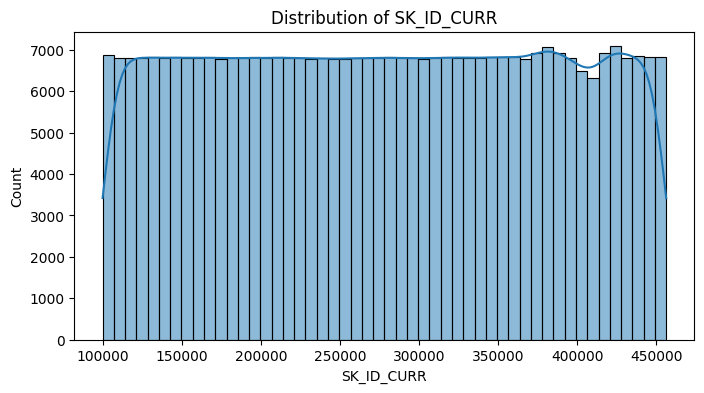

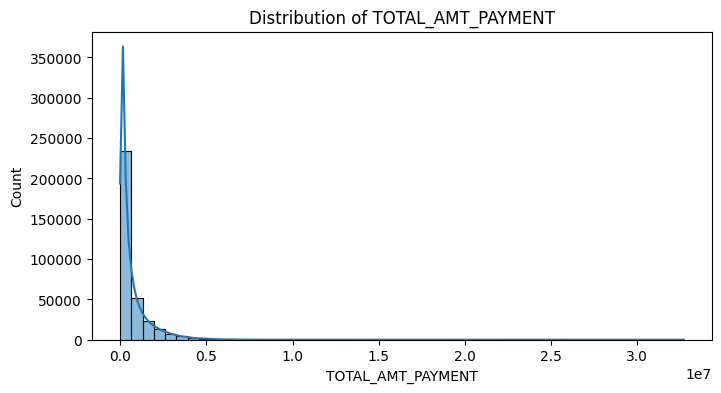

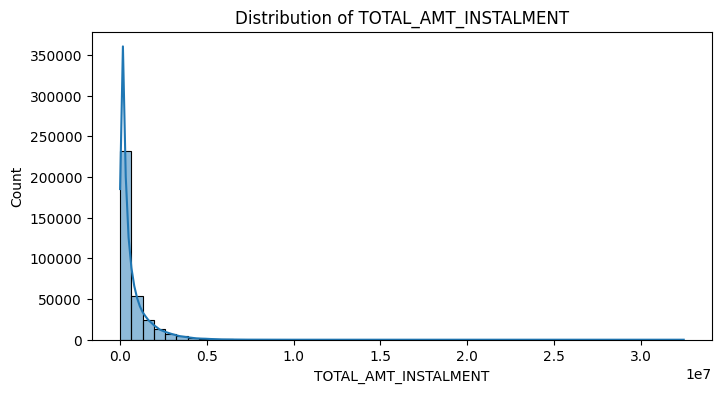

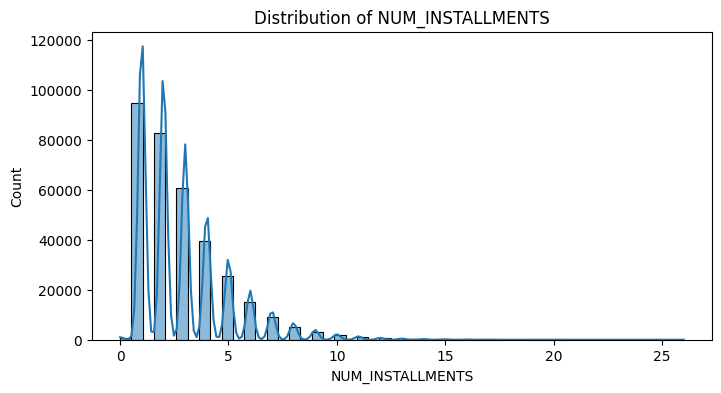

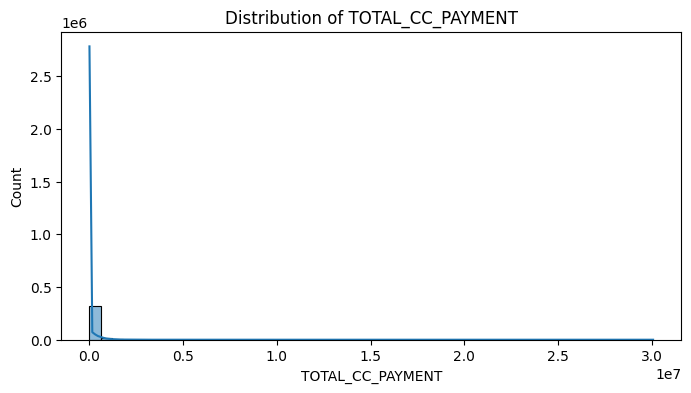

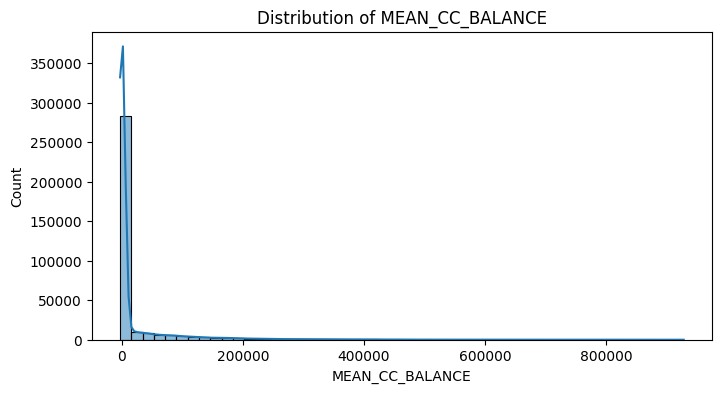

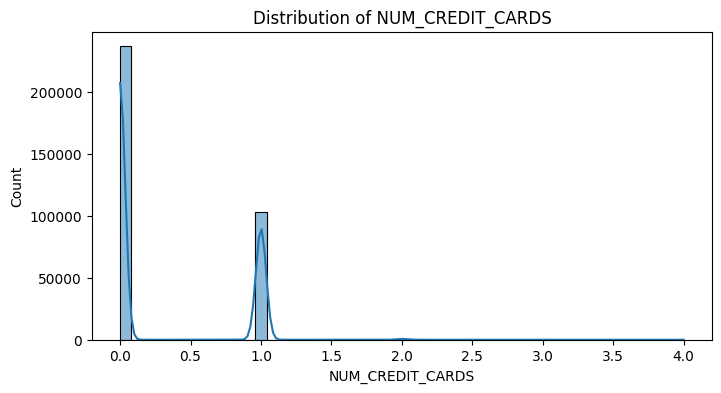

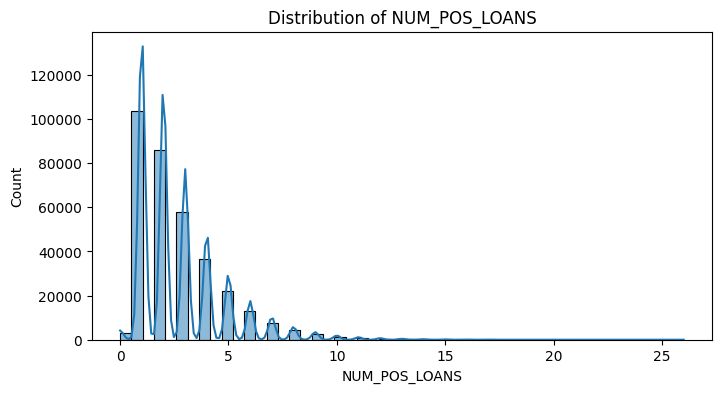

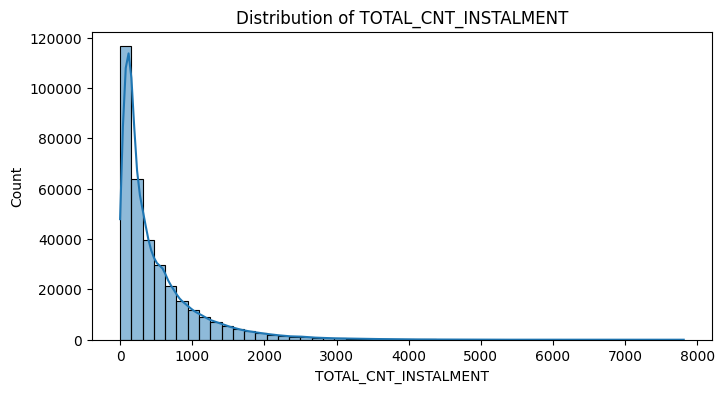

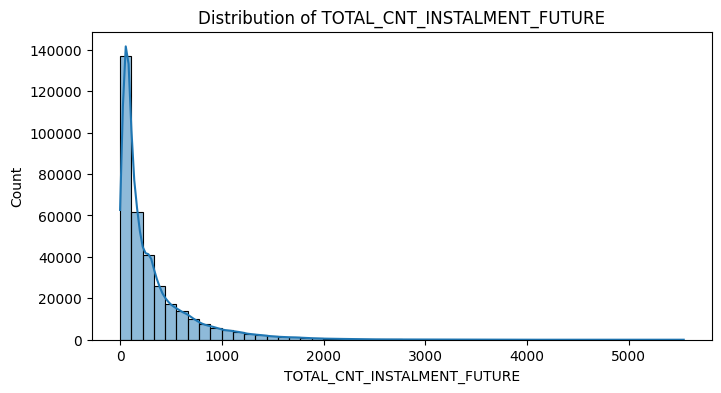

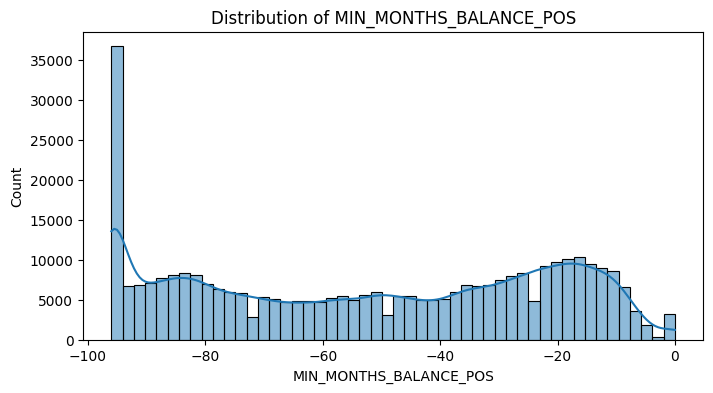

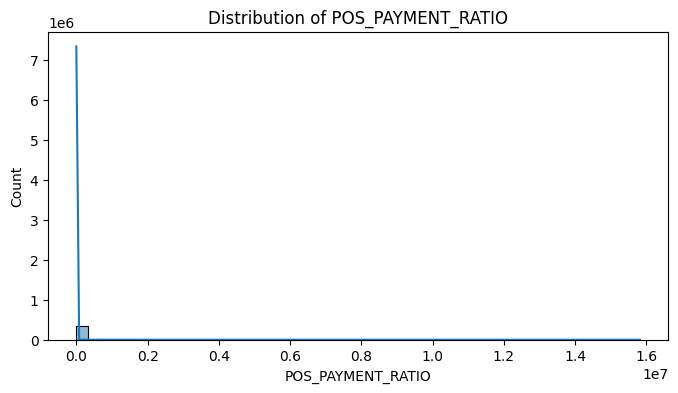

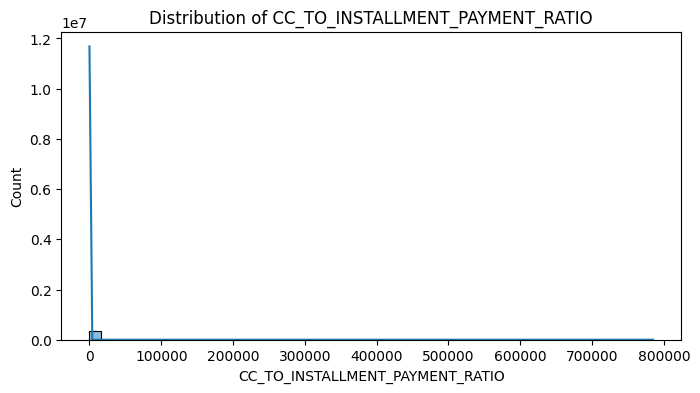

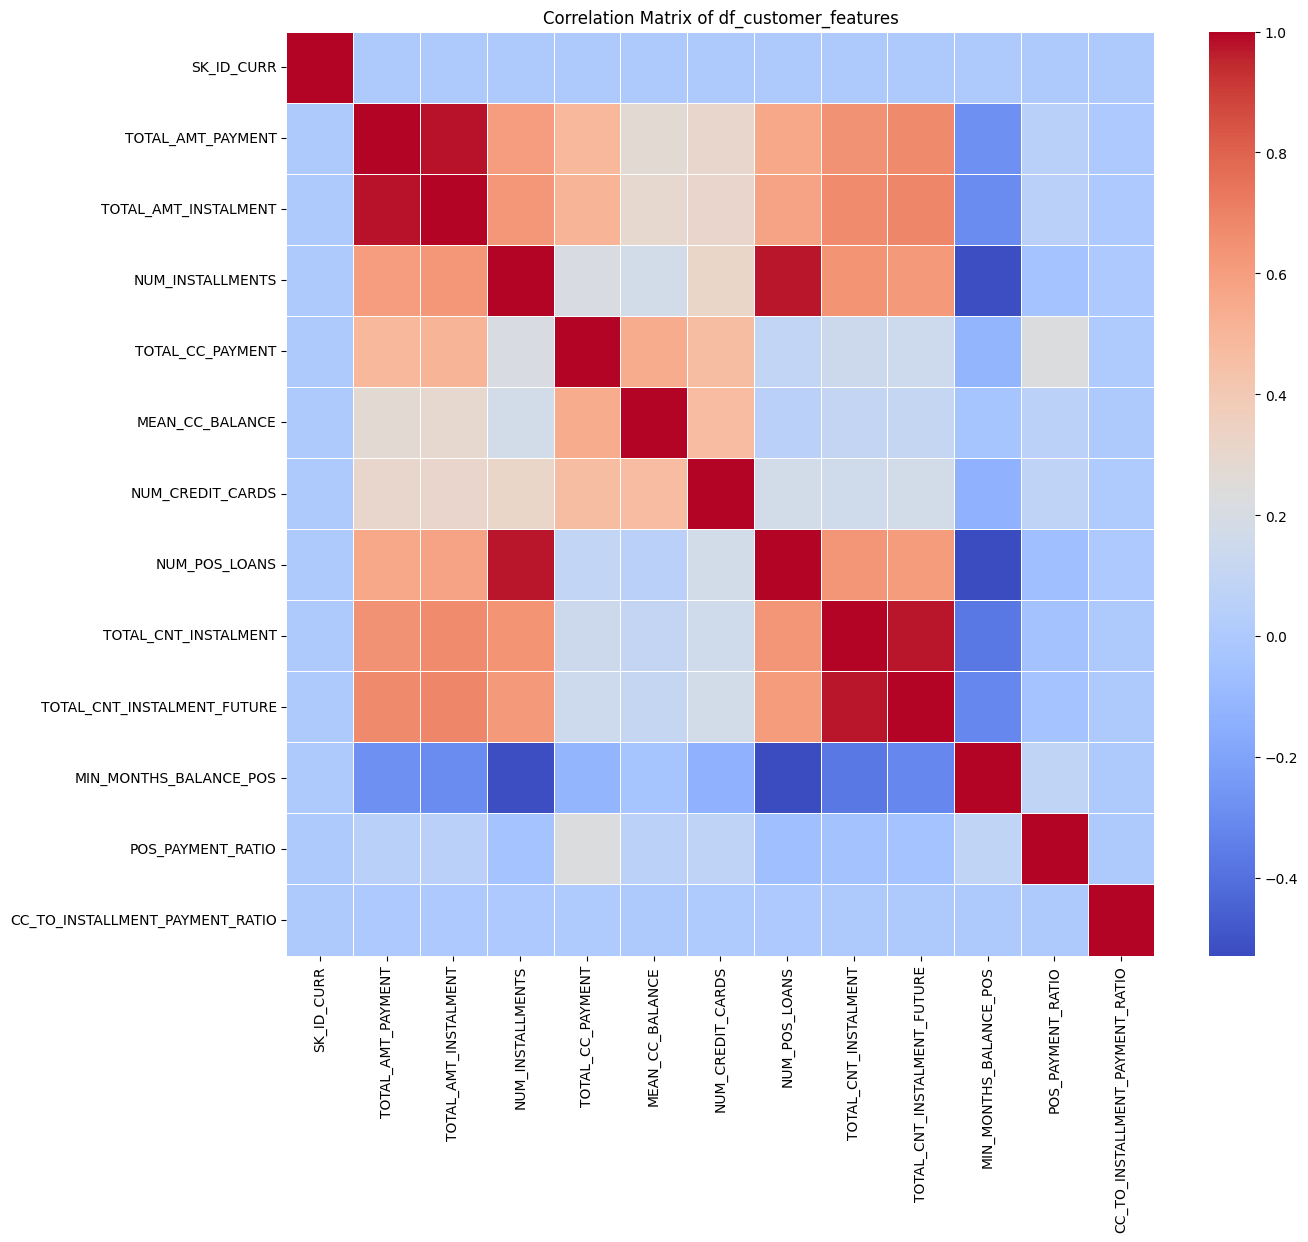

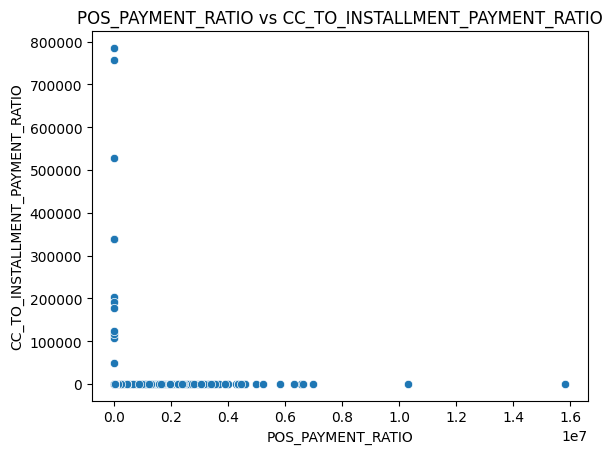

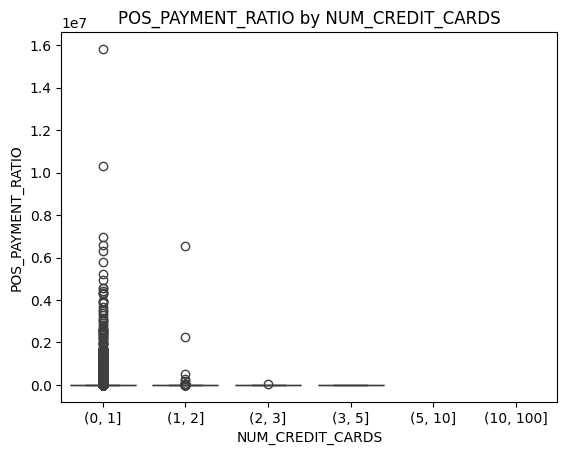

In [90]:
# Missing values (%)
missing = df_customer_features.isnull().mean().sort_values(ascending=False) * 100
print("\nMissing values (%):\n", missing[missing > 0])

# Summary statistics
df_customer_features.describe().T

# Histograms for all numeric columns
numeric_cols = df_customer_features.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df_customer_features[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation matrix
corr = df_customer_features[numeric_cols].corr()

plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of df_customer_features')
plt.show()


# POS_PAYMENT_RATIO vs CC_TO_INSTALLMENT_PAYMENT_RATIO
sns.scatterplot(
    x='POS_PAYMENT_RATIO',
    y='CC_TO_INSTALLMENT_PAYMENT_RATIO',
    data=df_customer_features
)
plt.title('POS_PAYMENT_RATIO vs CC_TO_INSTALLMENT_PAYMENT_RATIO')
plt.show()

# NUM_CREDIT_CARDS vs POS_PAYMENT_RATIO
sns.boxplot(
    x=pd.cut(df_customer_features['NUM_CREDIT_CARDS'], bins=[0,1,2,3,5,10,100]),
    y='POS_PAYMENT_RATIO',
    data=df_customer_features
)
plt.title('POS_PAYMENT_RATIO by NUM_CREDIT_CARDS')
plt.show()

In [86]:
# Save dataframe
df_customer_features.to_csv(os.path.join(data_dir, 'df_customer_features.csv'), index=False)

In [91]:
# Collect all DataFrames in globals
df_objects = {name: obj for name, obj in globals().items() if isinstance(obj, pd.DataFrame)}

# Print memory usage for each DataFrame
for name, df in df_objects.items():
    mem_mb = df.memory_usage(deep=True).sum() / (1024 ** 2)
    print(f'{name}: {mem_mb:.2f} MB')

_: 0.00 MB
__: 0.00 MB
___: 0.02 MB
df_col_desc: 0.08 MB
_8: 0.08 MB
_9: 0.00 MB
_10: 0.00 MB
_12: 0.00 MB
_13: 0.00 MB
_15: 0.00 MB
_16: 0.00 MB
_18: 0.00 MB
_19: 0.00 MB
_21: 0.00 MB
_22: 0.00 MB
_24: 0.01 MB
_25: 0.00 MB
_27: 0.02 MB
_28: 0.01 MB
_30: 0.02 MB
_31: 0.01 MB
_38: 0.00 MB
_42: 0.00 MB
bureau_months_active: 17.72 MB
status_counts: 66.01 MB
bureau_status_ratio: 82.14 MB
_44: 0.00 MB
_47: 0.00 MB
active_loans: 5767.79 MB
_60: 0.02 MB
installments_payments: 830.41 MB
credit_card_balance: 875.69 MB
df_pos: 1137.25 MB
avg_dpd: 0.00 MB
df: 0.00 MB
pos_cash_agg: 12.87 MB
instalments_agg: 10.36 MB
cc_agg: 3.16 MB
df_customer_features: 33.76 MB
_84: 0.00 MB
_89: 0.00 MB
corr: 0.00 MB


In [92]:
# Memory cleanup
del bureau_months_active
del bureau_status_ratio
del status_counts
del active_amt_past_loans
del active_loans
del installments_payments
del credit_card_balance
del df_pos
del pos_cash_agg, instalments_agg, cc_agg